### Import Packages

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import warnings
warnings.filterwarnings('ignore')

### Import Data and Prepare Data

Import all data sources and join to a single table.

In [2]:
# join all additional fields
df = pd.read_csv('load_per_country.csv', parse_dates=['DateTime'], index_col = ['DateTime'])
gdp = pd.read_csv('gdp_per_country.csv', parse_dates=['DateTime'], index_col = ['DateTime'])
pop = pd.read_csv('population_per_country.csv', parse_dates=['DateTime'], index_col = ['DateTime'])
tmp =  pd.read_csv('tmp_per_country.csv', parse_dates=['DateTime'], index_col = ['DateTime'])

joined = df.join(gdp, on='DateTime', how='left', lsuffix = '', rsuffix = '_GDP', sort=False)
joined = joined.join(pop, on='DateTime', how='left', lsuffix = '', rsuffix = '_POP', sort=False)
joined = joined.join(tmp, on='DateTime', how='left', lsuffix = '', rsuffix = '_TMP', sort=False)
joined = joined.replace(',','', regex=True)
joined_interpolate = joined.interpolate(method='ffill') # or method='index' works too

#### Interpolate

In [3]:
country_list = []


for col in joined_interpolate.columns:
    if col.endswith("GDP"):
        joined_interpolate[col] = joined_interpolate[col].astype(float)    
    if col != 'Date' and col != 'Time' and not col.endswith('_TMP') and not col.endswith('_POP') and not col.endswith('_GDP'):
        country_list.append(col)
        

#### Prepare Country Datasets

In [4]:
country_datasets = []

for country in country_list:
    try:
        country_dataset = joined_interpolate[[country, country + '_GDP', country+ '_POP', country+'_TMP']]
        country_datasets.append([country, country_dataset])
    except:
        pass

### Define functions

In [5]:
def fit_svr(svr, ds, x_train, y_train, name):
    
    svr = svr.fit(x_train, y_train)
    
    y_train_predict = svr.predict(ds.iloc[:, 1:].values)
    
    print("MSE:", mean_squared_error(ds[name].values, y_train_predict))

    '''
    plt.plot( y_train, lw=2, color="blue", label="y train")
    plt.plot( y_train_predict, lw=2, color="red", label="y predict")
    plt.legend()
    plt.title("Preliminary SVM Results")
    plt.xlabel("Index")
    plt.rcParams["figure.figsize"] = (20,10)
    plt.show()
    '''


### Iterate through each country and get results

                   AT     AT_GDP        AT_POP  AT_TMP
DateTime                                              
2006-01-31  5601173.0  250192.32  6.164295e+09 -3943.2
2006-02-28  5021266.0  225980.16  5.567750e+09 -2217.6
2006-03-31  5311050.0  250192.32  6.164295e+09     0.0
2006-04-30  4451786.0  242121.60  5.965447e+09  5112.0
2006-05-31  4460559.0  250192.32  6.164295e+09  8035.2
...               ...        ...           ...     ...
2015-08-31  5427943.0  284185.68  6.456923e+09   223.2
2015-09-30  5500054.0  275018.40  6.248635e+09   216.0
2015-10-31  5882710.0  284185.68  6.456923e+09   223.2
2015-11-30  5995439.0  275018.40  6.248635e+09   216.0
2015-12-31  6221860.0  284185.68  6.456923e+09   223.2

[120 rows x 4 columns]


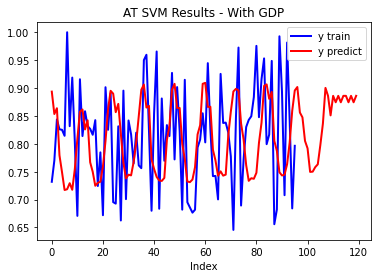

MSE with GDP: 0.004349173739393363


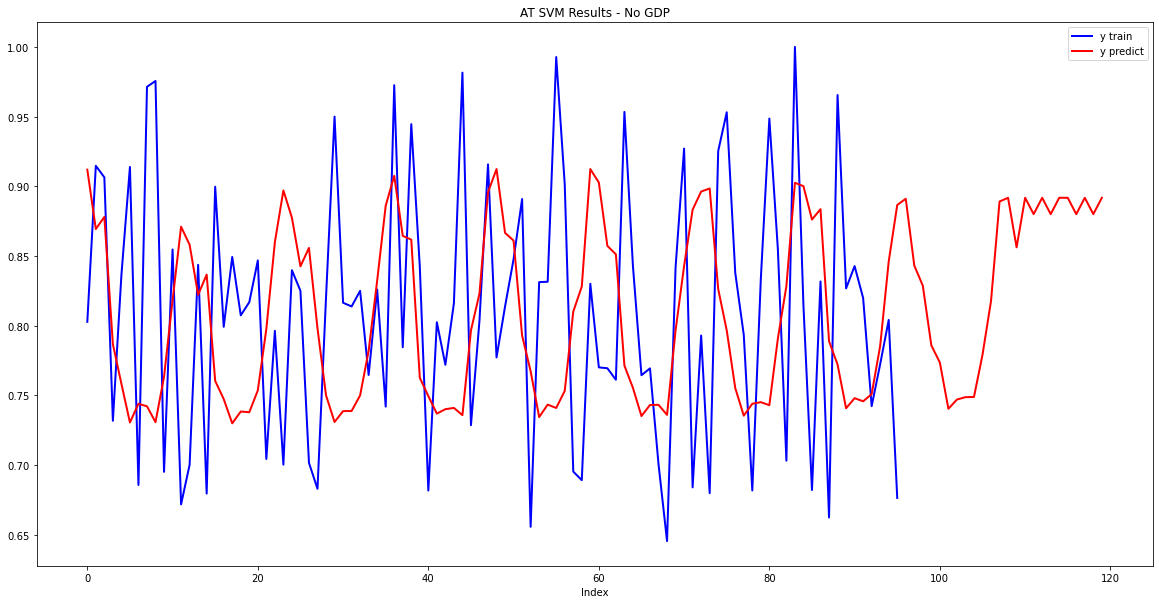

MSE without GDP: 0.004769945633096491


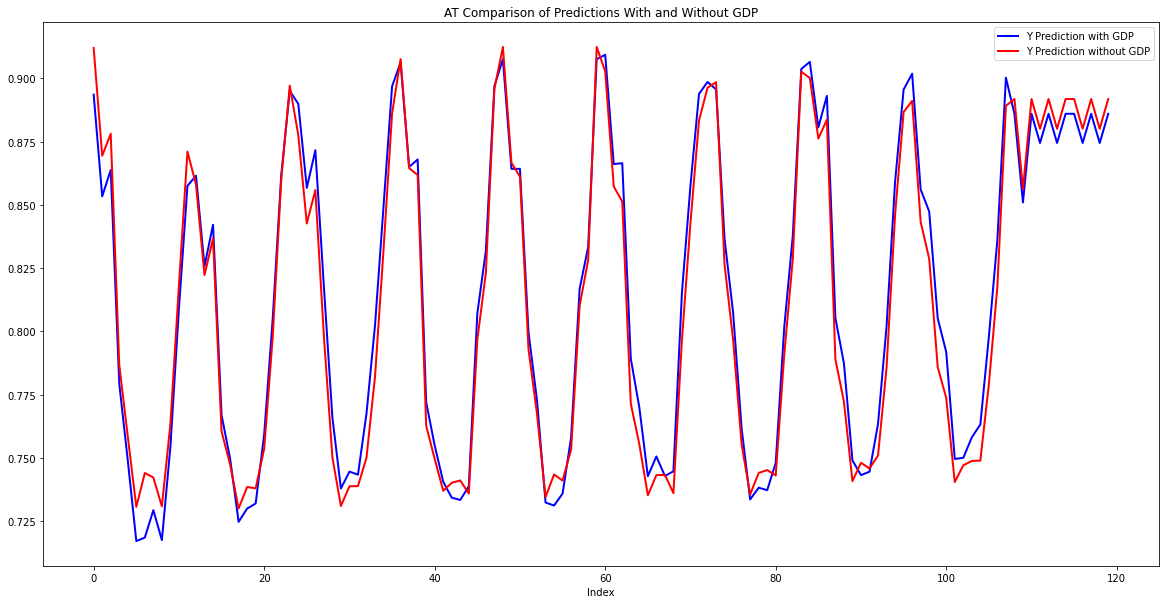

                   BA    BA_GDP        BA_POP   BA_TMP
DateTime                                              
2006-01-31  1129817.0   9567.84  2.801475e+09  -1041.6
2006-02-28   973430.0   8641.92  2.530365e+09    336.0
2006-03-31  1022542.0   9567.84  2.801475e+09   3050.4
2006-04-30   888461.0   9259.20  2.711105e+09   7920.0
2006-05-31   874512.0   9567.84  2.801475e+09  10936.8
...               ...       ...           ...      ...
2015-08-31   991148.0  12060.24  2.551445e+09   2529.6
2015-09-30   951453.0  11671.20  2.469140e+09   2448.0
2015-10-31  1028559.0  12060.24  2.551445e+09   2529.6
2015-11-30  1066585.0  11671.20  2.469140e+09   2448.0
2015-12-31  1196438.0  12060.24  2.551445e+09   2529.6

[120 rows x 4 columns]


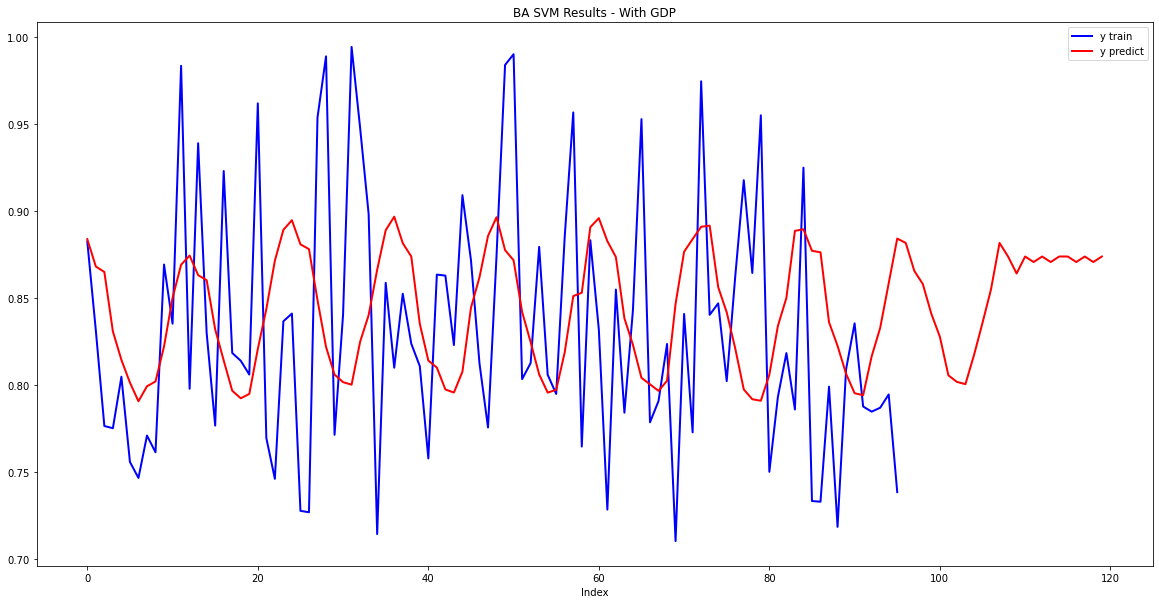

MSE with GDP: 0.0029098838543171247


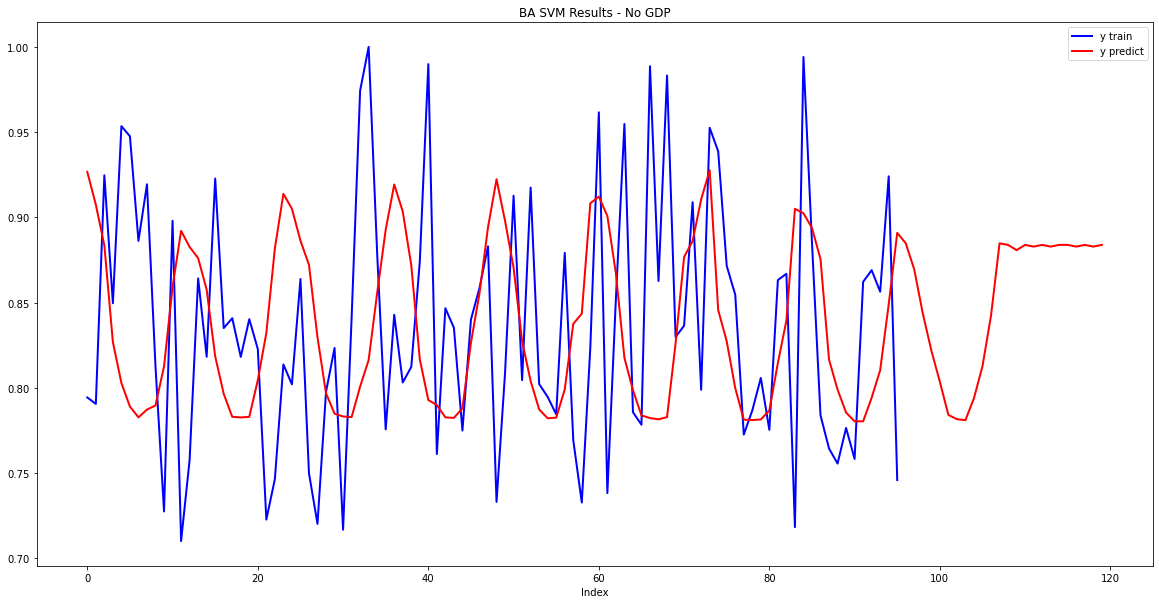

MSE without GDP: 0.002471577055193317


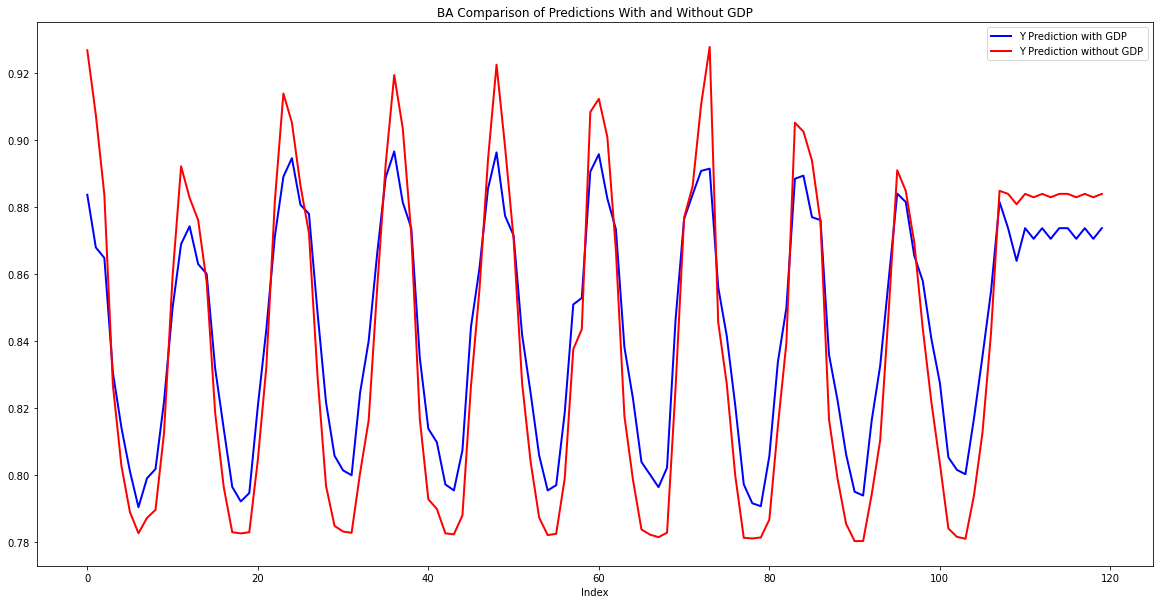

                   BE     BE_GDP        BE_POP   BE_TMP
DateTime                                               
2006-01-31  8498426.0  303745.44  7.900889e+09    818.4
2006-02-28  7768333.0  274350.72  7.136287e+09   1344.0
2006-03-31  8270355.0  303745.44  7.900889e+09   2976.0
2006-04-30  7289620.0  293947.20  7.646022e+09   6408.0
2006-05-31  7233548.0  303745.44  7.900889e+09  10416.0
...               ...        ...           ...      ...
2015-08-31  6642246.0  343980.96  8.398227e+09   3422.4
2015-09-30  6758831.0  332884.80  8.127317e+09   3312.0
2015-10-31  7254754.0  343980.96  8.398227e+09   3422.4
2015-11-30  7209106.0  332884.80  8.127317e+09   3312.0
2015-12-31  7390022.0  343980.96  8.398227e+09   3422.4

[120 rows x 4 columns]


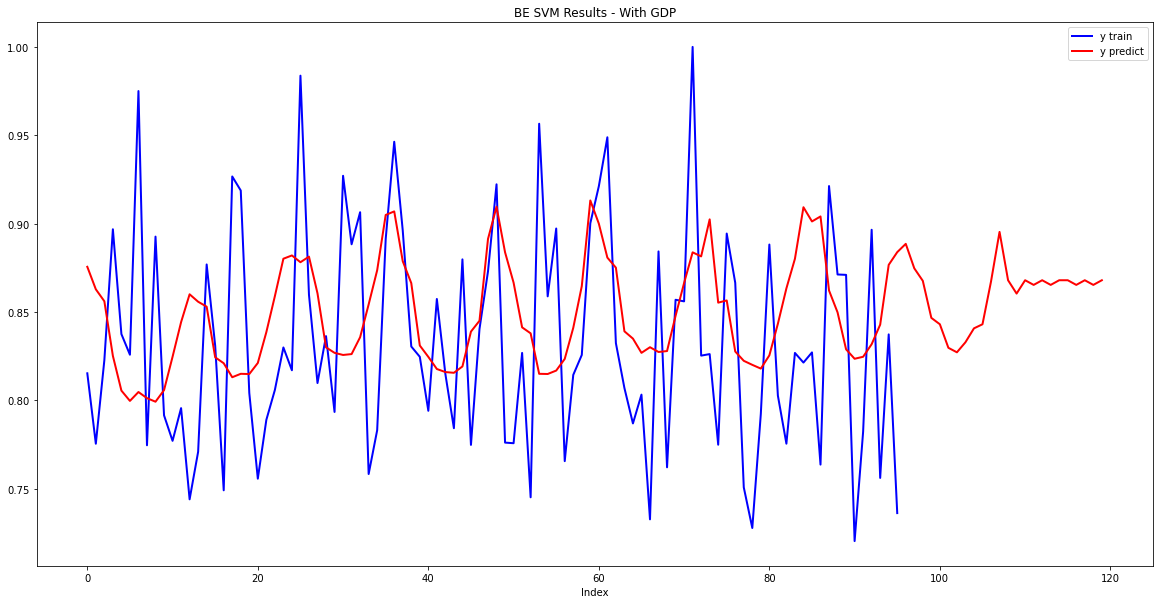

MSE with GDP: 0.002810734799949738


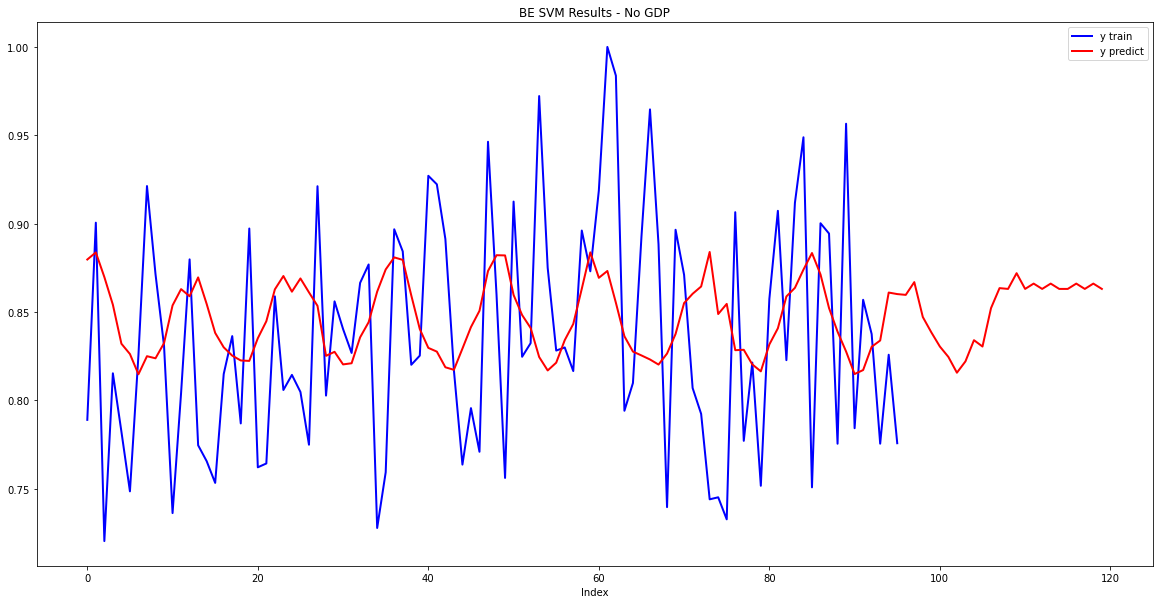

MSE without GDP: 0.0028681388529249842


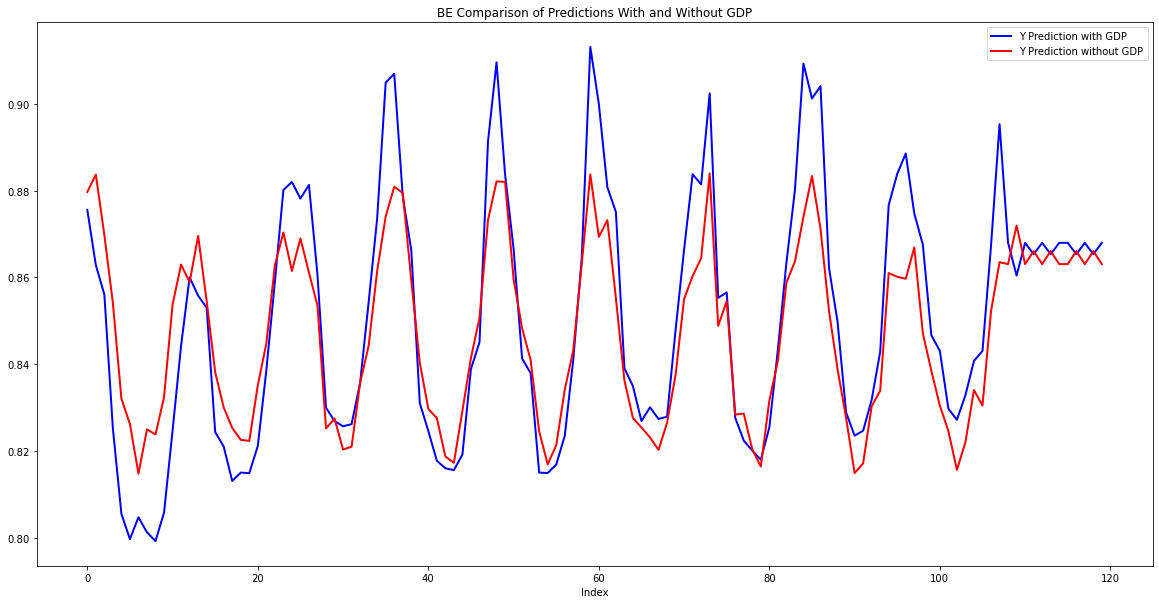

                   BG    BG_GDP        BG_POP   BG_TMP
DateTime                                              
2006-01-31  3997955.0  25578.72  5.677473e+09  -1339.2
2006-02-28  3531121.0  23103.36  5.128040e+09    268.8
2006-03-31  3450411.0  25578.72  5.677473e+09   3943.2
2006-04-30  2735336.0  24753.60  5.494329e+09   7992.0
2006-05-31  2685323.0  25578.72  5.677473e+09  11680.8
...               ...       ...           ...      ...
2015-08-31  2935844.0  37683.60  5.356607e+09   2232.0
2015-09-30  2782377.0  36468.00  5.183814e+09   2160.0
2015-10-31  3077823.0  37683.60  5.356607e+09   2232.0
2015-11-30  3163392.0  36468.00  5.183814e+09   2160.0
2015-12-31  3640437.0  37683.60  5.356607e+09   2232.0

[120 rows x 4 columns]


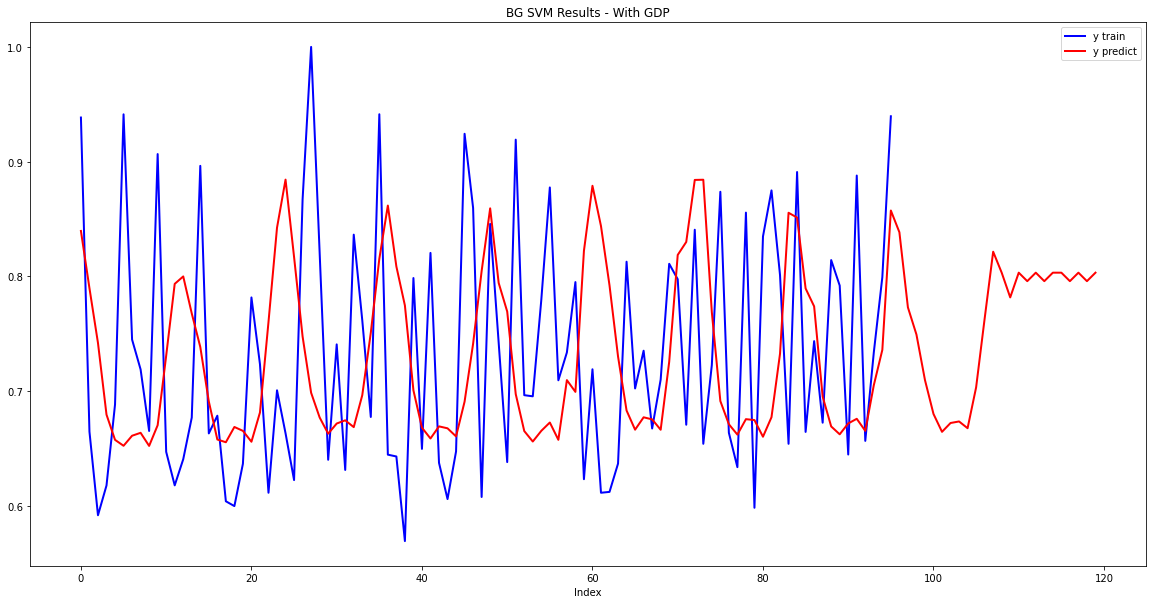

MSE with GDP: 0.0026734162324283483


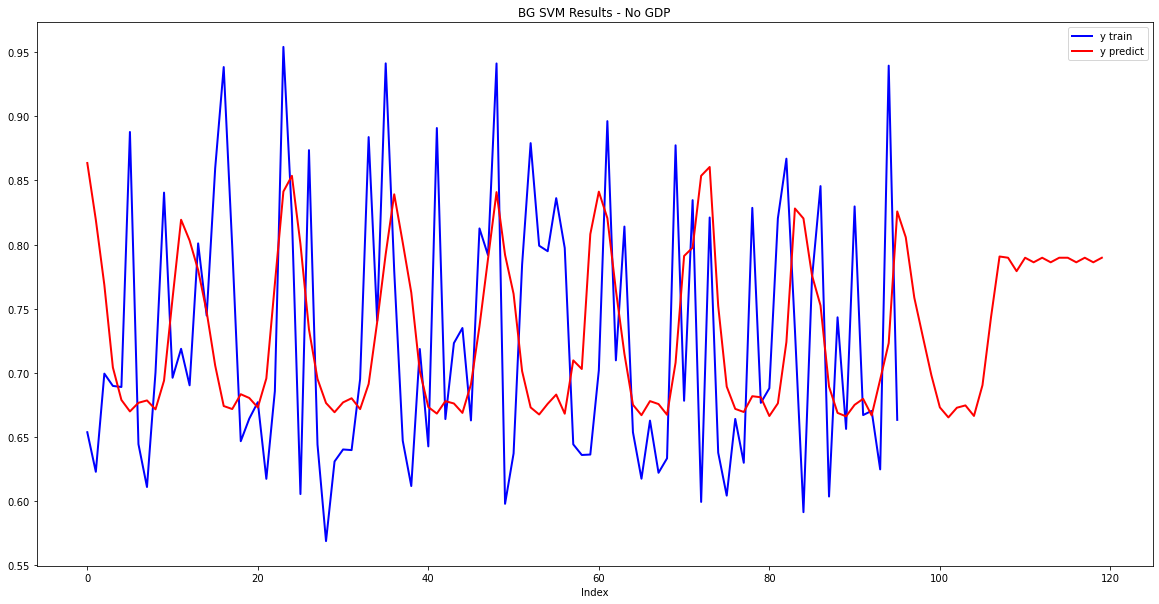

MSE without GDP: 0.0031415728067075922


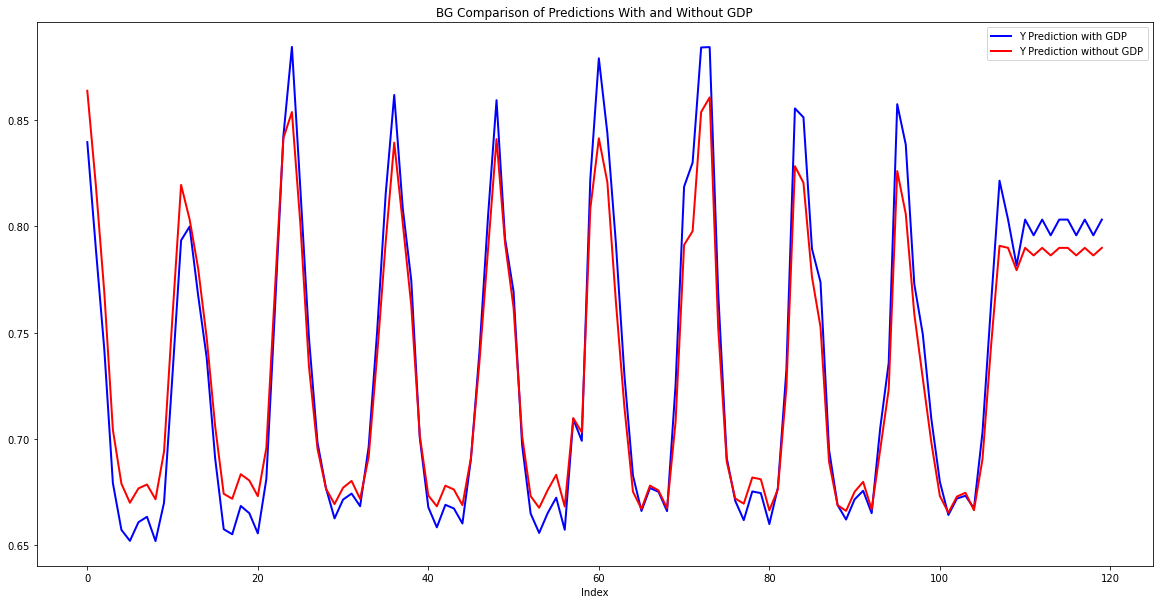

                   CH     CH_GDP        CH_POP  CH_TMP
DateTime                                              
2006-01-31  3223127.0  330179.76  5.548721e+09 -2604.0
2006-02-28  4654843.0  298226.88  5.011748e+09 -1680.0
2006-03-31  4696287.0  330179.76  5.548721e+09   223.2
2006-04-30  3588510.0  319528.80  5.369730e+09  3888.0
2006-05-31  3391331.0  330179.76  5.548721e+09  7216.8
...               ...        ...           ...     ...
2015-08-31  4769035.0  522399.60  6.172801e+09   446.4
2015-09-30  4850512.0  505548.00  5.973678e+09   432.0
2015-10-31  5201083.0  522399.60  6.172801e+09   446.4
2015-11-30  5370440.0  505548.00  5.973678e+09   432.0
2015-12-31  5483560.0  522399.60  6.172801e+09   446.4

[120 rows x 4 columns]


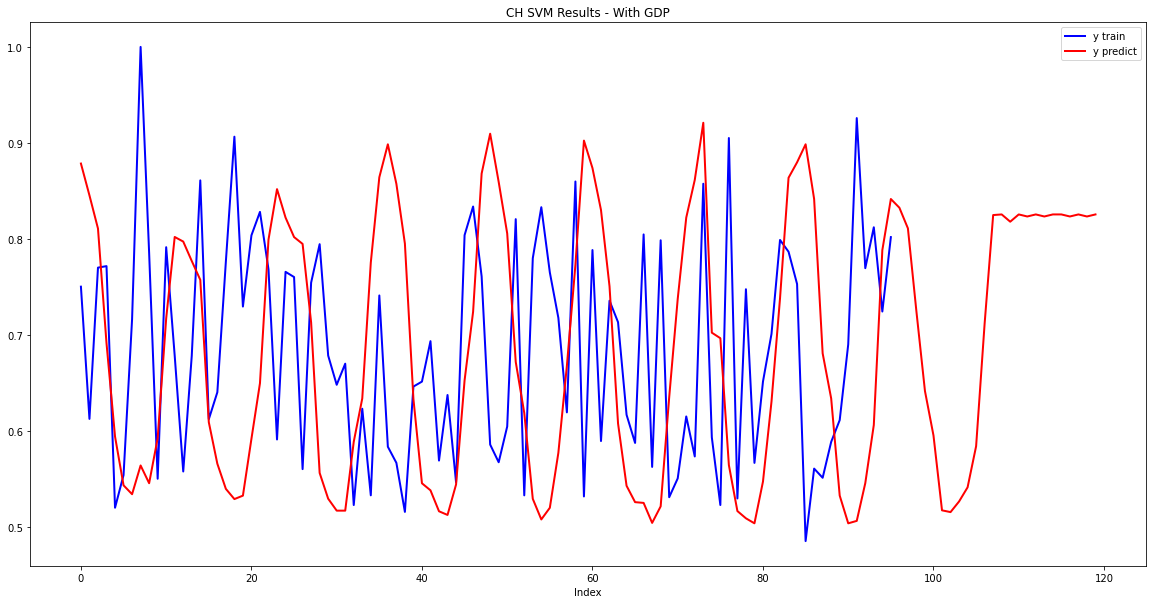

MSE with GDP: 0.004359877706877209


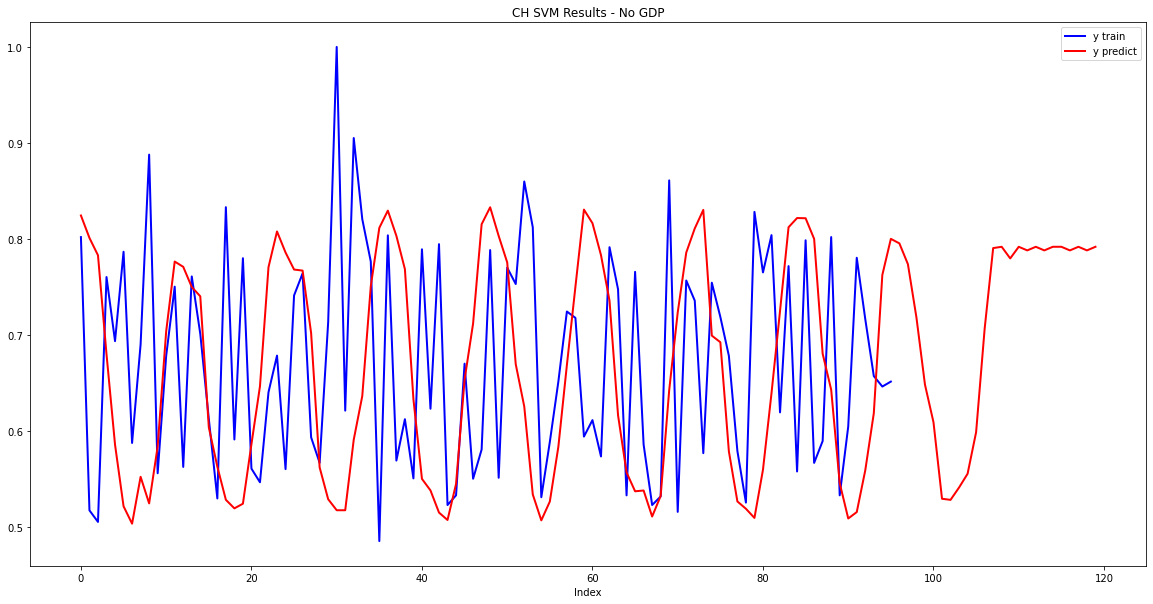

MSE without GDP: 0.0032755109644405614


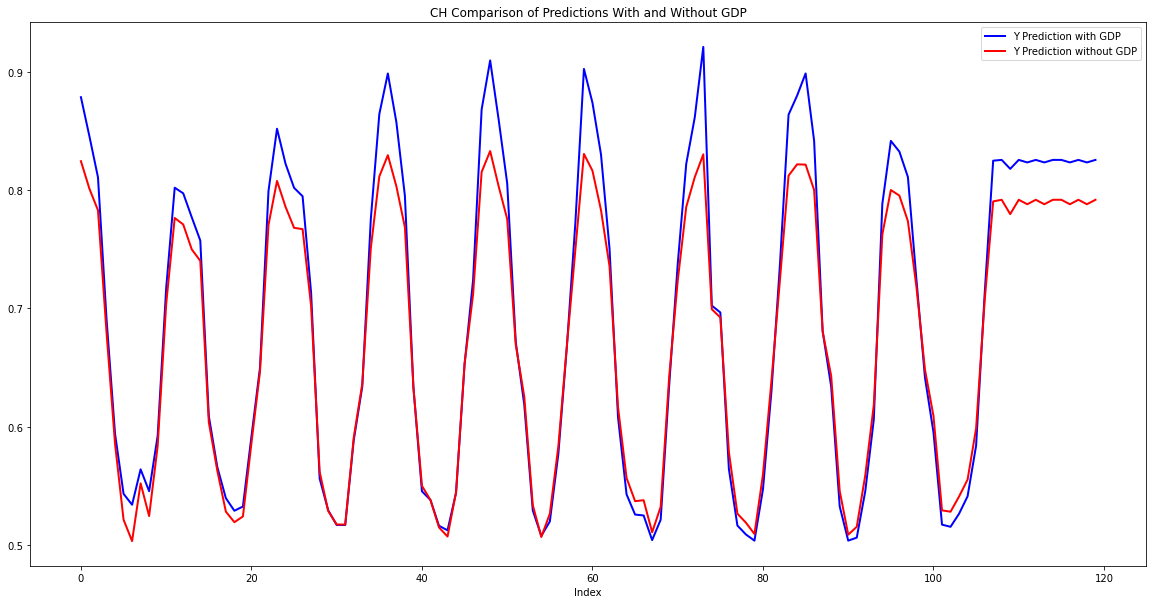

                  CY    CY_GDP       CY_POP   CY_TMP
DateTime                                            
2010-01-31    1152.0  19143.12  827783328.0   8853.6
2010-02-28    1089.0  17290.56  747675264.0   8467.2
2010-03-31    1014.0  19143.12  827783328.0  11829.6
2010-04-30     943.0  18525.60  801080640.0  12240.0
2010-05-31     984.0  19143.12  827783328.0  15921.6
...              ...       ...          ...      ...
2015-08-31  495807.0  14760.96  863772840.0  10713.6
2015-09-30  441644.0  14284.80  835909200.0  10368.0
2015-10-31  351597.0  14760.96  863772840.0  10713.6
2015-11-30  298387.0  14284.80  835909200.0  10368.0
2015-12-31  355947.0  14760.96  863772840.0  10713.6

[72 rows x 4 columns]


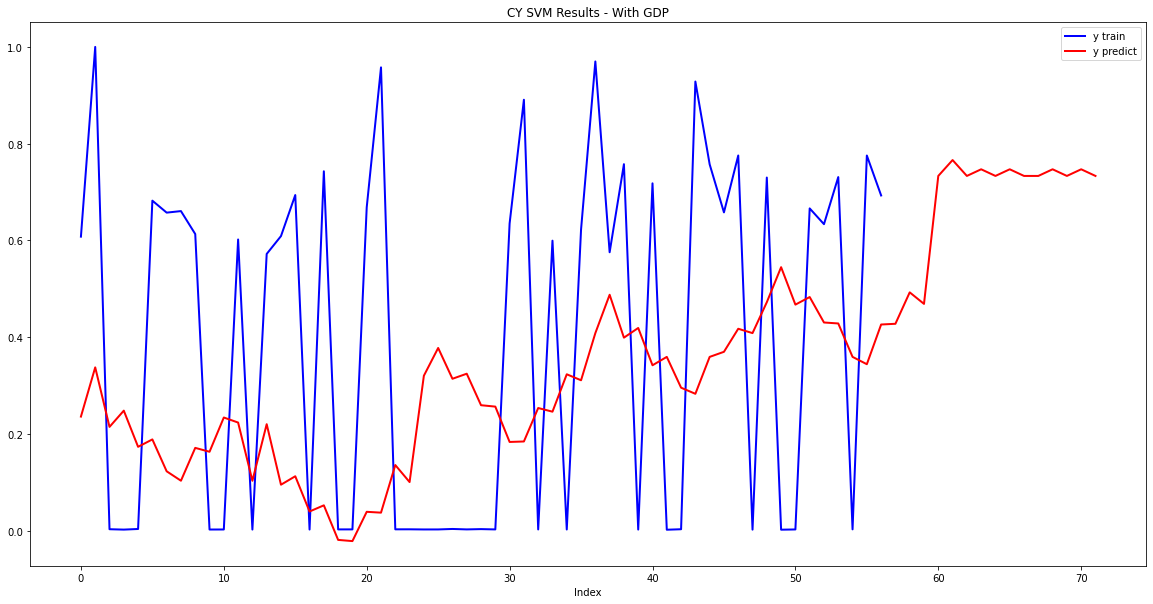

MSE with GDP: 0.06564874500233658


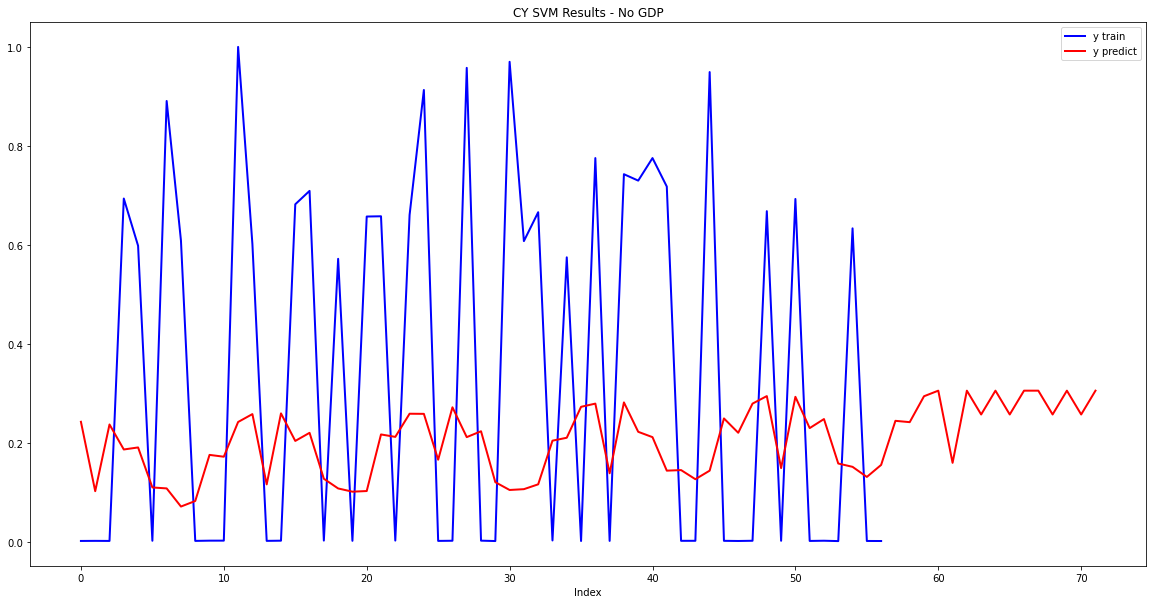

MSE without GDP: 0.14804564680915078


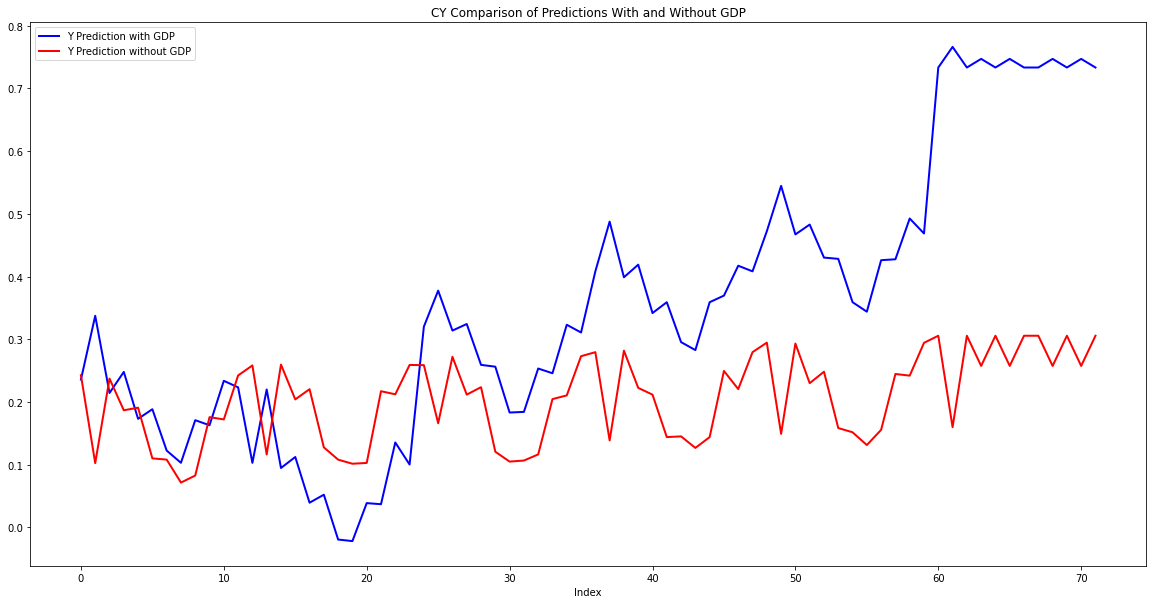

                   CZ     CZ_GDP        CZ_POP  CZ_TMP
DateTime                                              
2006-01-31  6579484.0  116257.44  7.640136e+09 -4464.0
2006-02-28  5811233.0  105006.72  6.900768e+09 -1881.6
2006-03-31  6103975.0  116257.44  7.640136e+09   223.2
2006-04-30  5031739.0  112507.20  7.393680e+09  6192.0
2006-05-31  4812307.0  116257.44  7.640136e+09  9448.8
...               ...        ...           ...     ...
2015-08-31  4814275.0  139894.32  7.887439e+09   967.2
2015-09-30  4847943.0  135381.60  7.633006e+09   936.0
2015-10-31  5484989.0  139894.32  7.887439e+09   967.2
2015-11-30  5547431.0  135381.60  7.633006e+09   936.0
2015-12-31  5552555.0  139894.32  7.887439e+09   967.2

[120 rows x 4 columns]


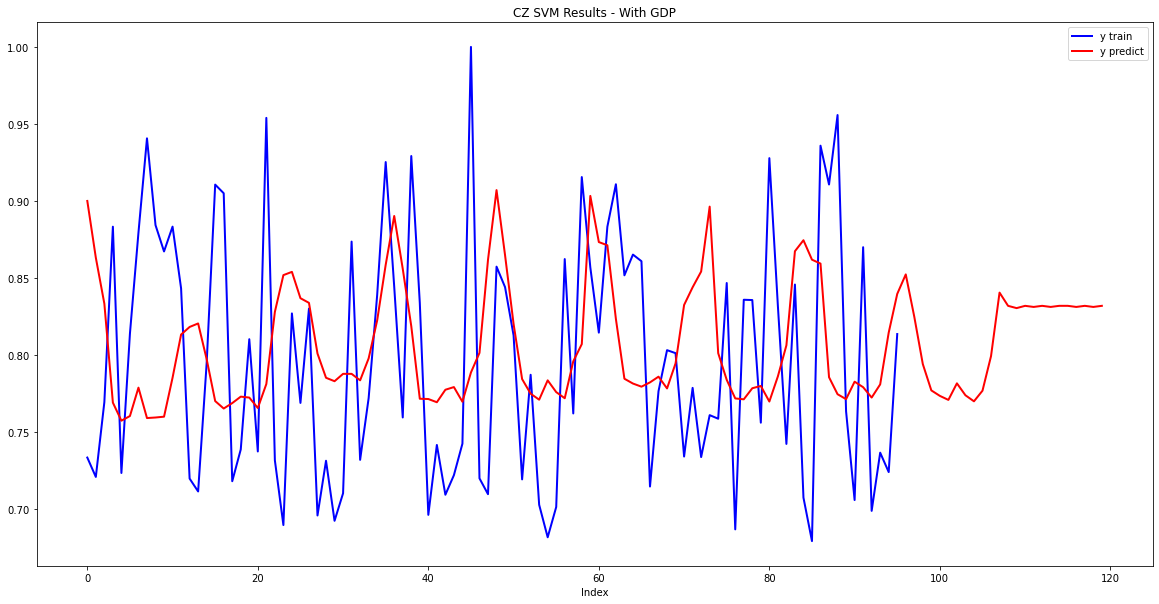

MSE with GDP: 0.0028977200128499016


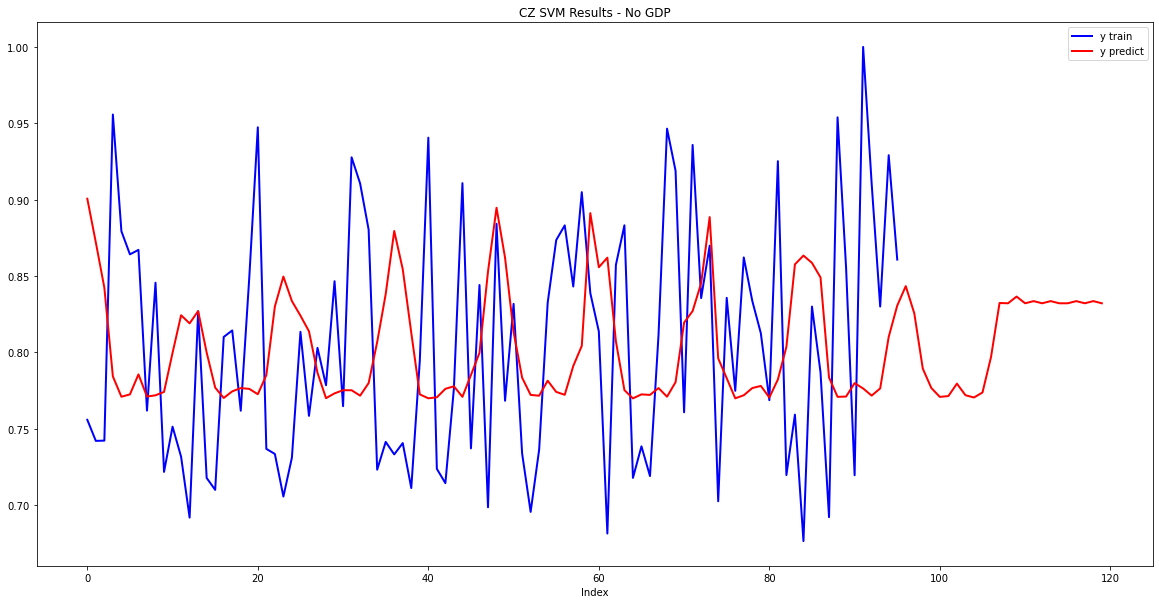

MSE without GDP: 0.003087492048184453


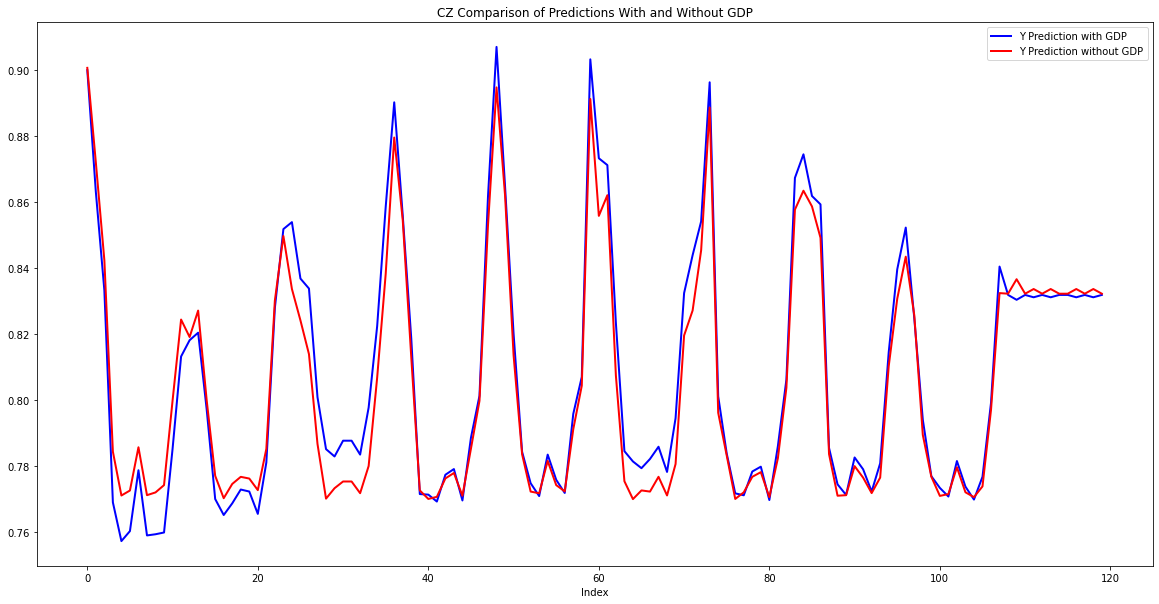

                    DE      DE_GDP        DE_POP  DE_TMP
DateTime                                                
2006-01-31  45293713.0  2228056.80  6.061534e+10 -1711.2
2006-02-28  41081584.0  2012438.40  5.474934e+10  -134.4
2006-03-31  43979421.0  2228056.80  6.061534e+10  1339.2
2006-04-30  38270682.0  2156184.00  5.866000e+10  6048.0
2006-05-31  38844858.0  2228056.80  6.061534e+10  9895.2
...                ...         ...           ...     ...
2015-08-31  40056404.0  2498046.96  6.084983e+10  1934.4
2015-09-30  40912241.0  2417464.80  5.888694e+10  1872.0
2015-10-31  43260367.0  2498046.96  6.084983e+10  1934.4
2015-11-30  43571707.0  2417464.80  5.888694e+10  1872.0
2015-12-31  42651206.0  2498046.96  6.084983e+10  1934.4

[120 rows x 4 columns]


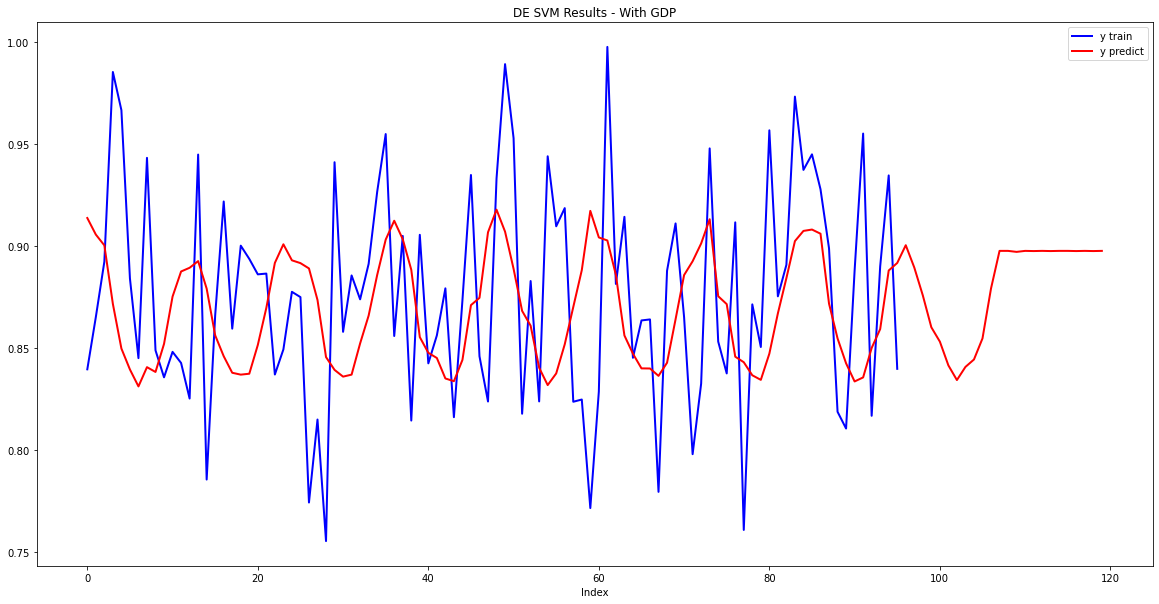

MSE with GDP: 0.0018557933839970055


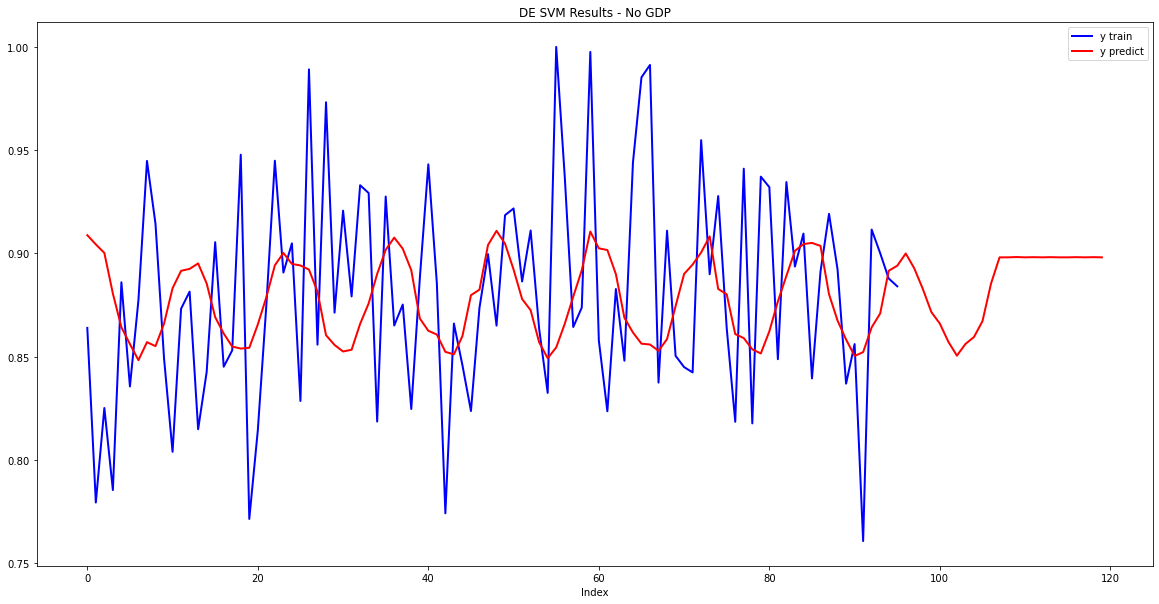

MSE without GDP: 0.001956304152475531


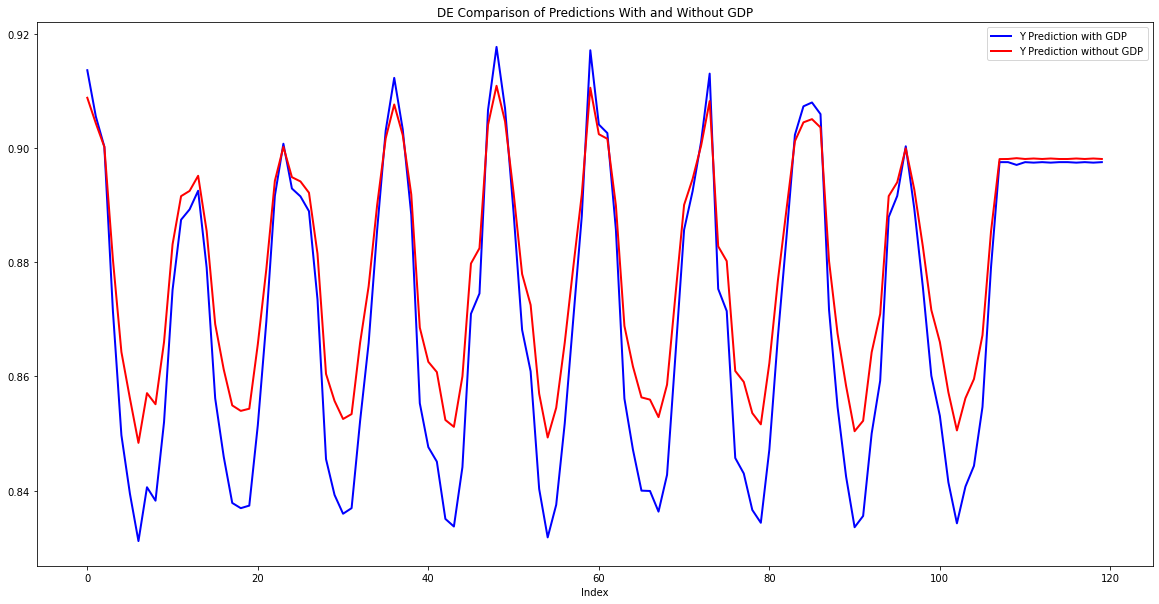

                   DK     DK_GDP        DK_POP  DK_TMP
DateTime                                              
2010-01-31  3488880.0  239568.00  4.132804e+09 -3422.4
2010-02-28  3101852.0  216384.00  3.732855e+09 -1948.8
2010-03-31  3189948.0  239568.00  4.132804e+09  1711.2
2010-04-30  2714704.0  231840.00  3.999488e+09  5328.0
2010-05-31  2732817.0  239568.00  4.132804e+09  7440.0
...               ...        ...           ...     ...
2015-08-31  2650780.8  225186.48  4.232389e+09  2678.4
2015-09-30  2656978.2  217922.40  4.095860e+09  2592.0
2015-10-31  2887474.6  225186.48  4.232389e+09  2678.4
2015-11-30  2952435.2  217922.40  4.095860e+09  2592.0
2015-12-31  3101893.3  225186.48  4.232389e+09  2678.4

[72 rows x 4 columns]


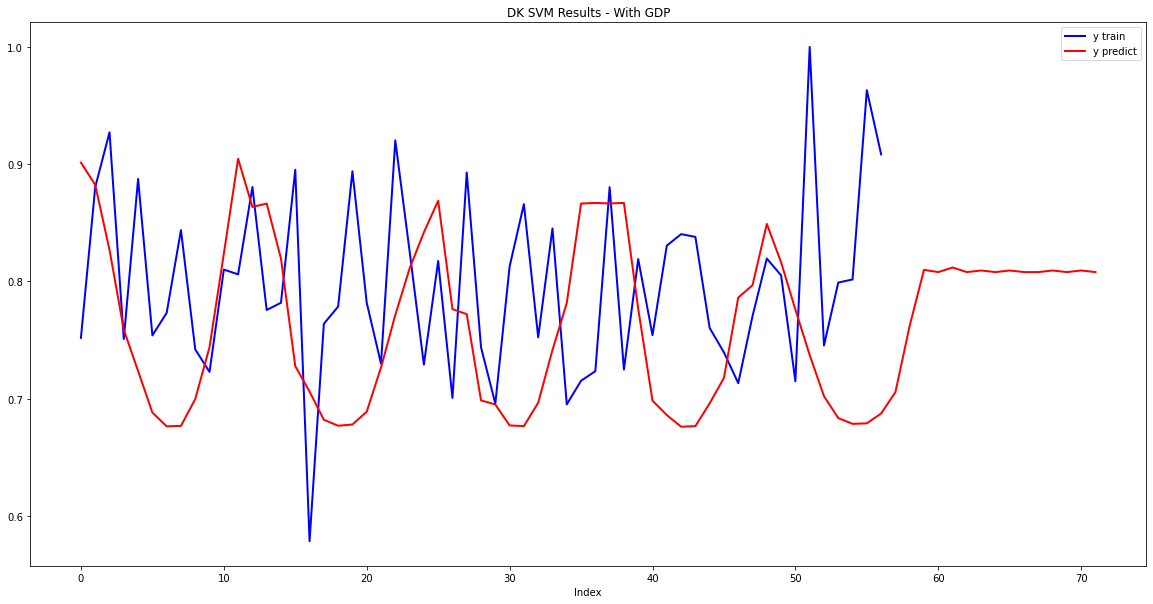

MSE with GDP: 0.004211136200748499


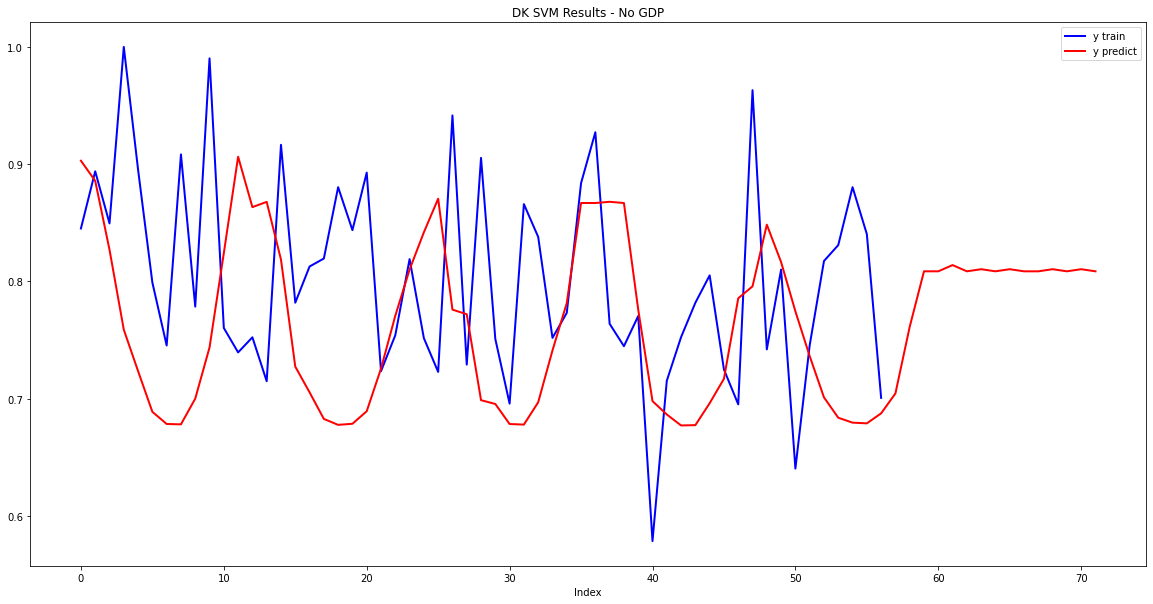

MSE without GDP: 0.004213708089385206


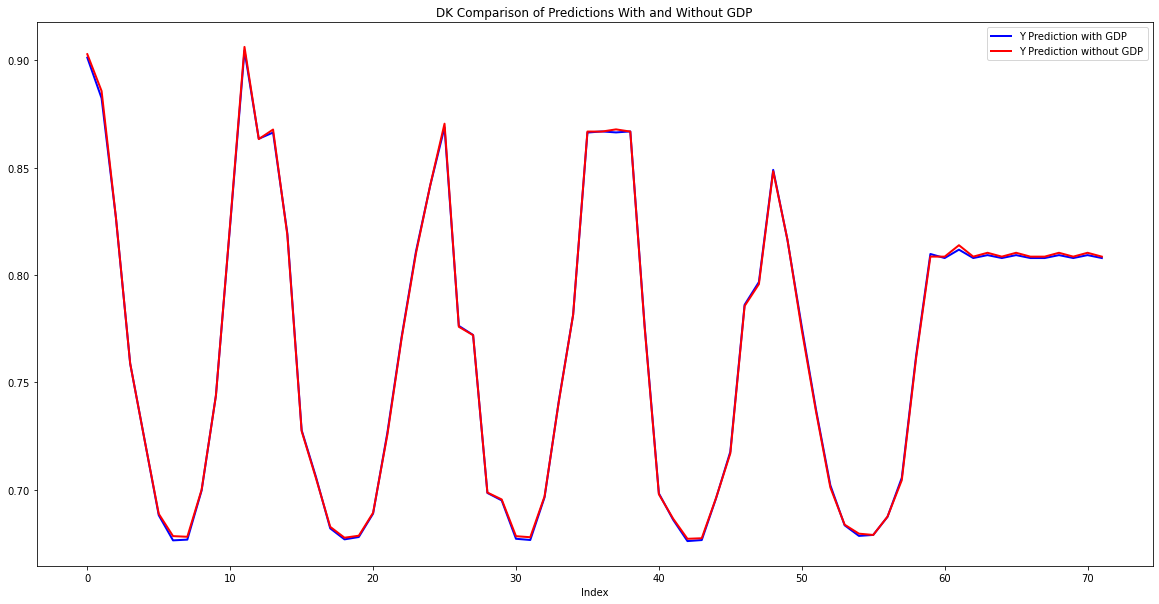

                  EE    EE_GDP       EE_POP  EE_TMP
DateTime                                           
2010-01-31  911177.0    937.44  991083144.0 -8630.4
2010-02-28  781775.0    846.72  895171872.0 -5174.4
2010-03-31  767709.0    937.44  991083144.0 -1339.2
2010-04-30  645522.0    907.20  959112720.0  3960.0
2010-05-31  588194.0    937.44  991083144.0  8704.8
...              ...       ...          ...     ...
2015-08-31  569785.0  17156.64  978601800.0  -818.4
2015-09-30  617553.0  16603.20  947034000.0  -792.0
2015-10-31  705521.0  17156.64  978601800.0  -818.4
2015-11-30  708153.0  16603.20  947034000.0  -792.0
2015-12-31  736084.0  17156.64  978601800.0  -818.4

[72 rows x 4 columns]


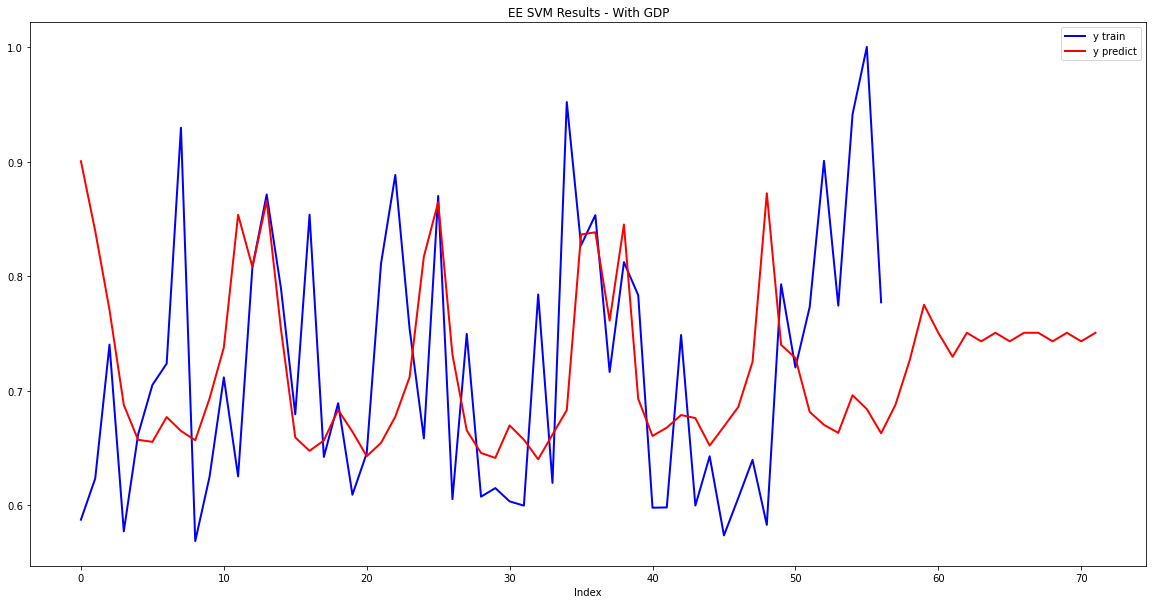

MSE with GDP: 0.004818225400838313


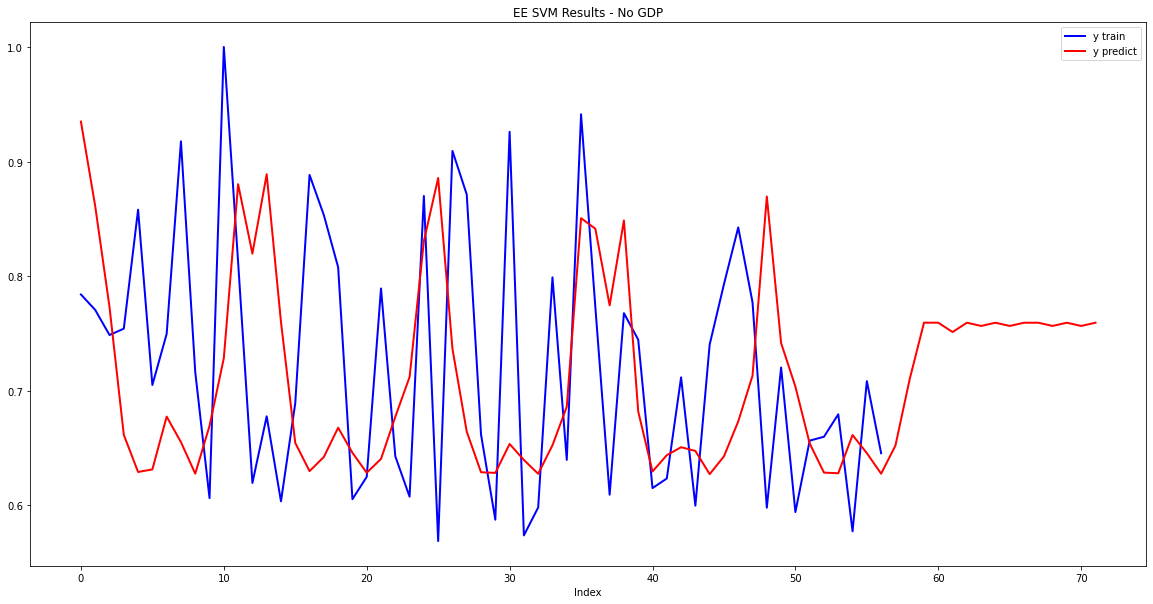

MSE without GDP: 0.004539349992588275


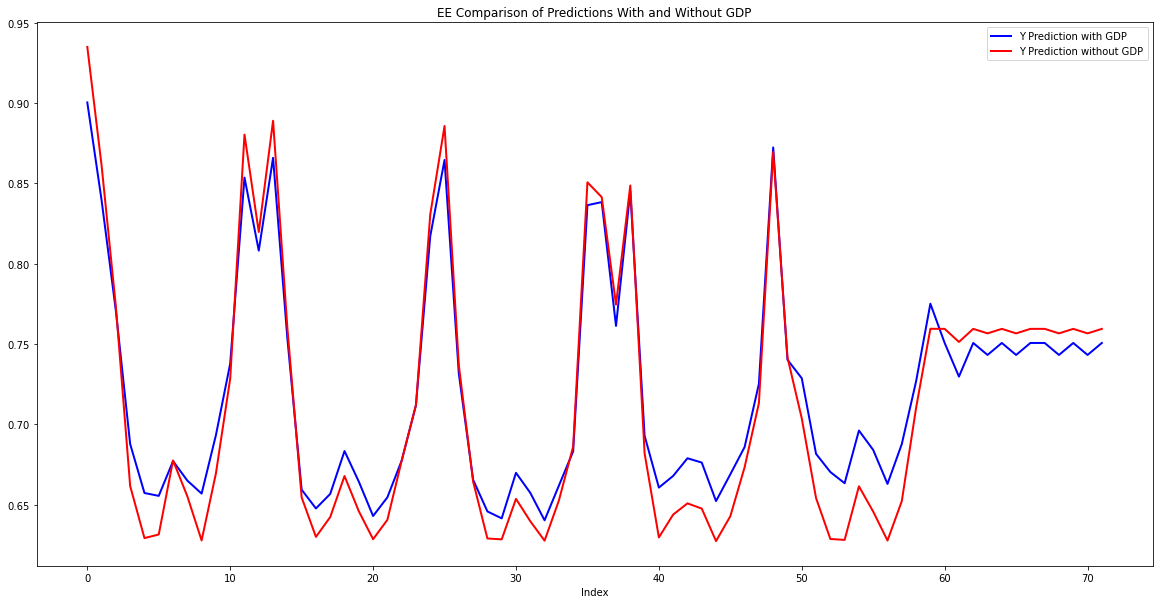

                    ES    ES_GDP        ES_POP   ES_TMP
DateTime                                               
2006-01-31  23407589.0  937737.6  3.327805e+10   4092.0
2006-02-28  21109189.0  846988.8  3.005760e+10   4166.4
2006-03-31  21805589.0  937737.6  3.327805e+10   7737.6
2006-04-30  18578636.0  907488.0  3.220457e+10   9432.0
2006-05-31  20056455.0  937737.6  3.327805e+10  12648.0
...                ...       ...           ...      ...
2015-08-31  20849043.0  889526.4  3.472391e+10   5208.0
2015-09-30  19542041.0  860832.0  3.360379e+10   5040.0
2015-10-31  19789403.0  889526.4  3.472391e+10   5208.0
2015-11-30  19939148.0  860832.0  3.360379e+10   5040.0
2015-12-31  20885505.0  889526.4  3.472391e+10   5208.0

[120 rows x 4 columns]


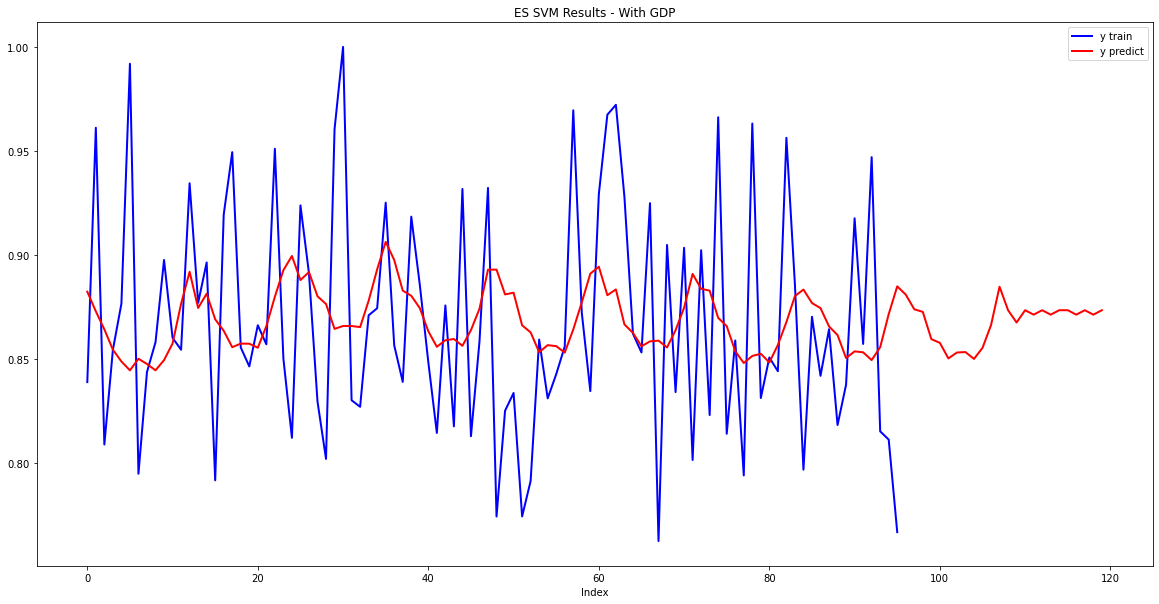

MSE with GDP: 0.0021338865948022775


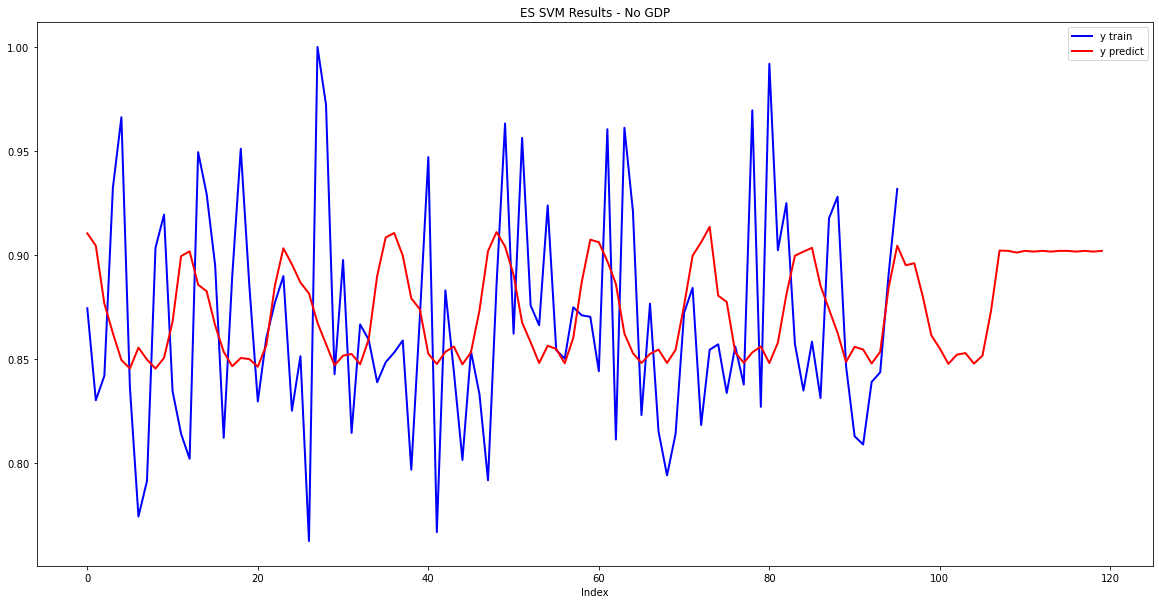

MSE without GDP: 0.0023017142623067304


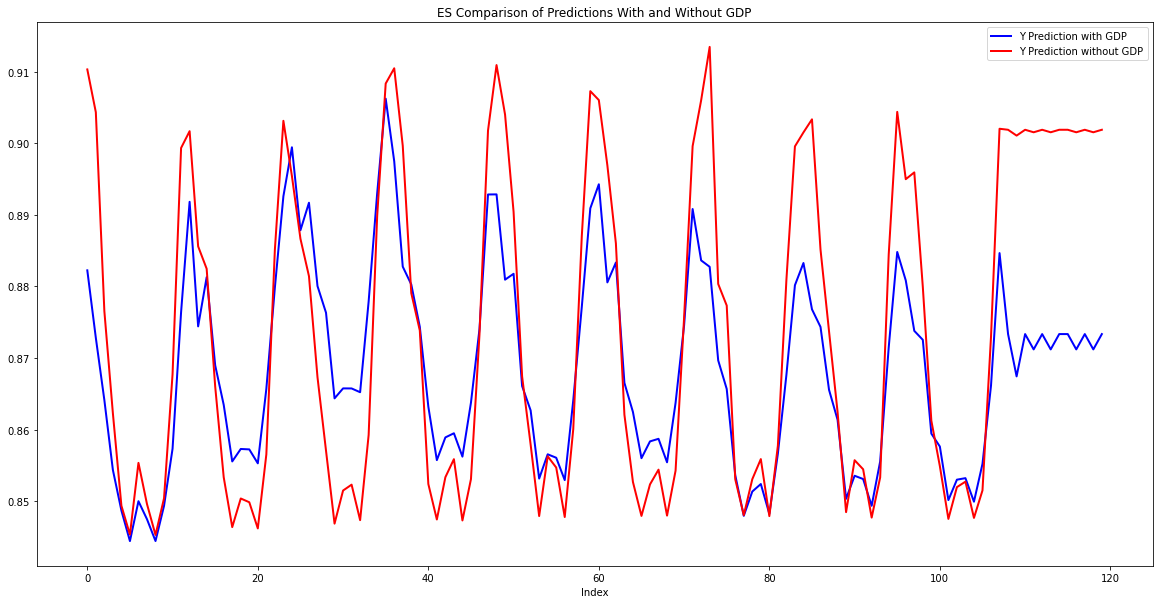

                   FI     FI_GDP        FI_POP   FI_TMP
DateTime                                               
2010-01-31  9282478.0  185568.48  3.992142e+09 -11085.6
2010-02-28  8219428.0  167610.24  3.605806e+09  -8937.6
2010-03-31  7882248.0  185568.48  3.992142e+09  -4836.0
2010-04-30  6892484.0  179582.40  3.863363e+09   1800.0
2010-05-31  6517625.0  185568.48  3.992142e+09   7365.6
...               ...        ...           ...      ...
2015-08-31  6009036.0  174490.32  4.077955e+09  -3348.0
2015-09-30  6118907.0  168861.60  3.946408e+09  -3240.0
2015-10-31  7139105.0  174490.32  4.077955e+09  -3348.0
2015-11-30  7280504.0  168861.60  3.946408e+09  -3240.0
2015-12-31  7729504.0  174490.32  4.077955e+09  -3348.0

[72 rows x 4 columns]


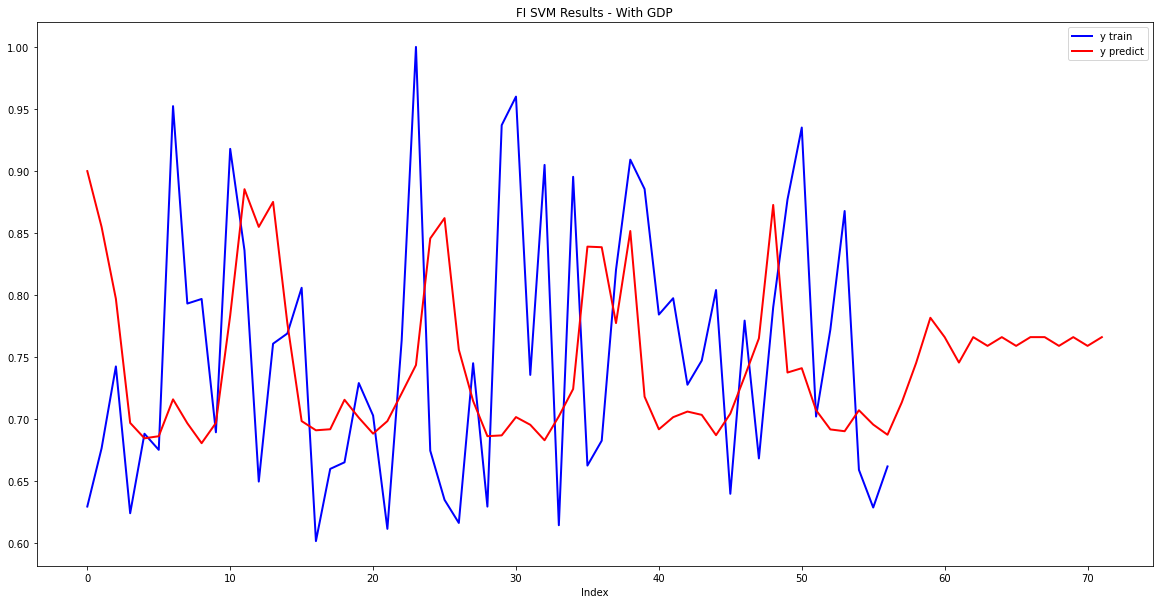

MSE with GDP: 0.0045339101638760555


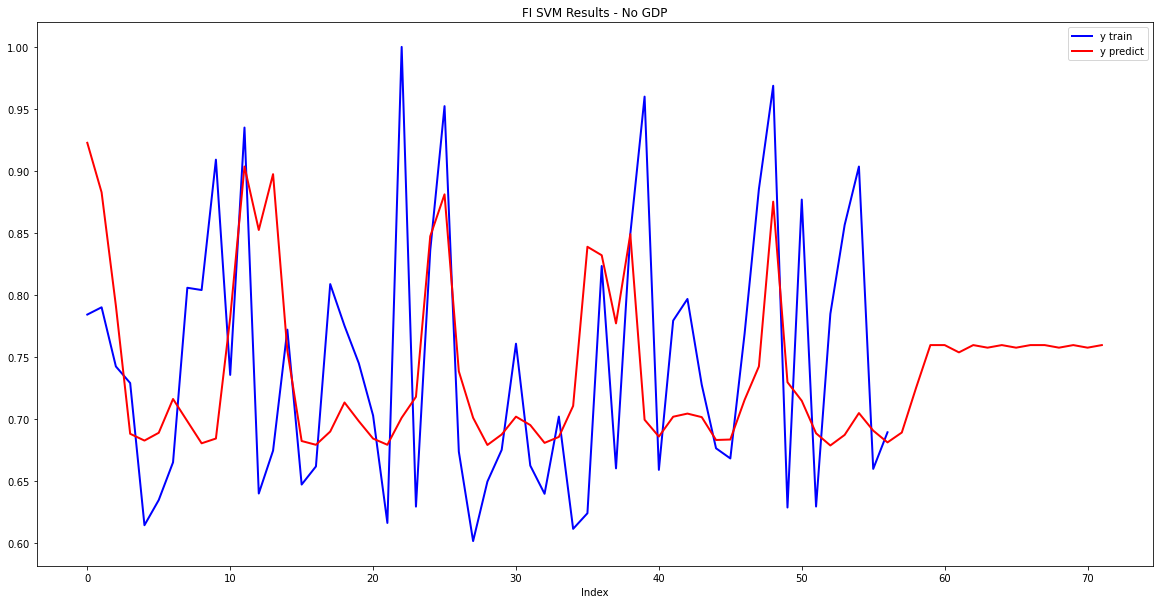

MSE without GDP: 0.0051507334987594775


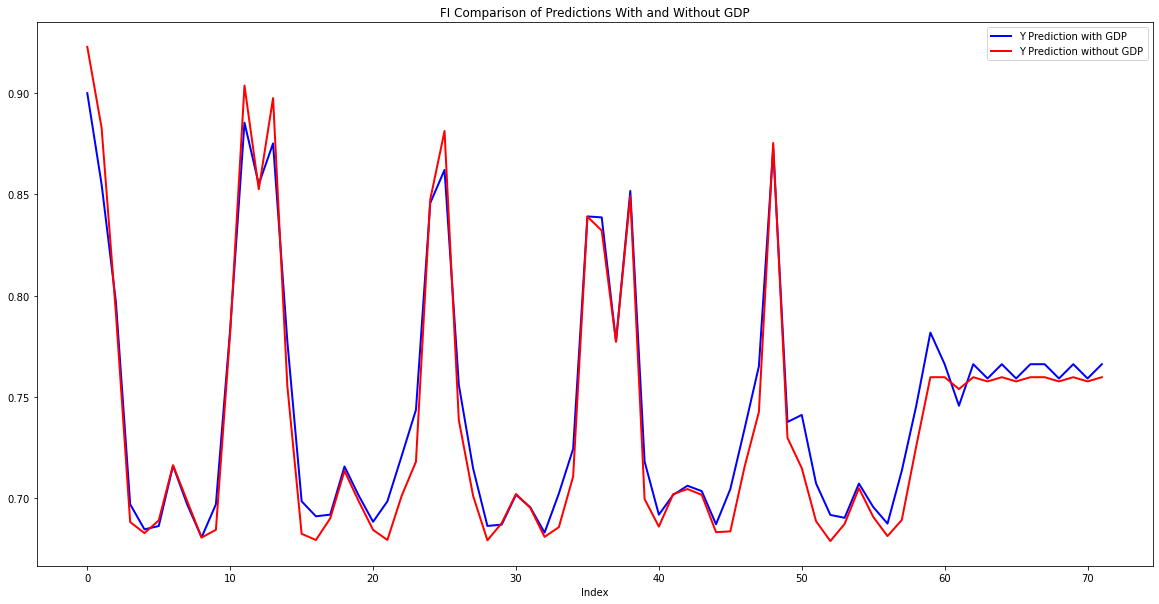

                      FR      FR_GDP        FR_POP   FR_TMP
DateTime                                                   
2006-01-31  5.224604e+07  1726481.76  4.576264e+10   2083.2
2006-02-28  4.645286e+07  1559402.88  4.133400e+10   2150.4
2006-03-31  4.657874e+07  1726481.76  4.576264e+10   4910.4
2006-04-30  3.742686e+07  1670788.80  4.428643e+10   7416.0
2006-05-31  3.466876e+07  1726481.76  4.576264e+10  10490.4
...                  ...         ...           ...      ...
2015-08-31  3.135060e+07  1814757.36  4.795318e+10   4166.4
2015-09-30  3.332470e+07  1756216.80  4.640630e+10   4032.0
2015-10-31  3.892116e+07  1814757.36  4.795318e+10   4166.4
2015-11-30  4.084386e+07  1756216.80  4.640630e+10   4032.0
2015-12-31  4.442545e+07  1814757.36  4.795318e+10   4166.4

[120 rows x 4 columns]


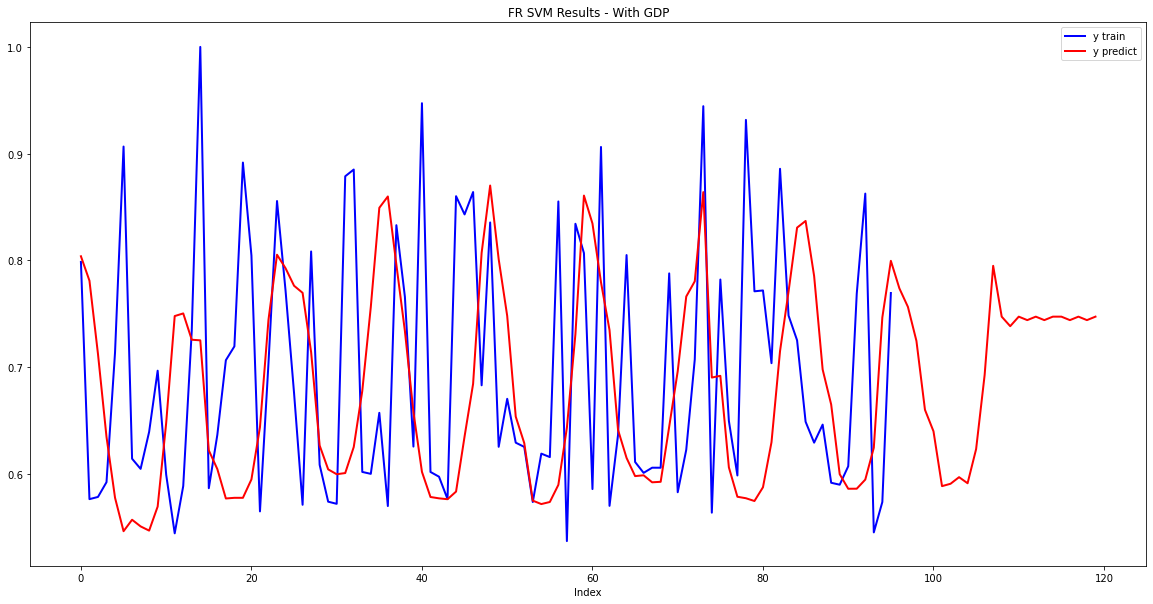

MSE with GDP: 0.0037309994347758846


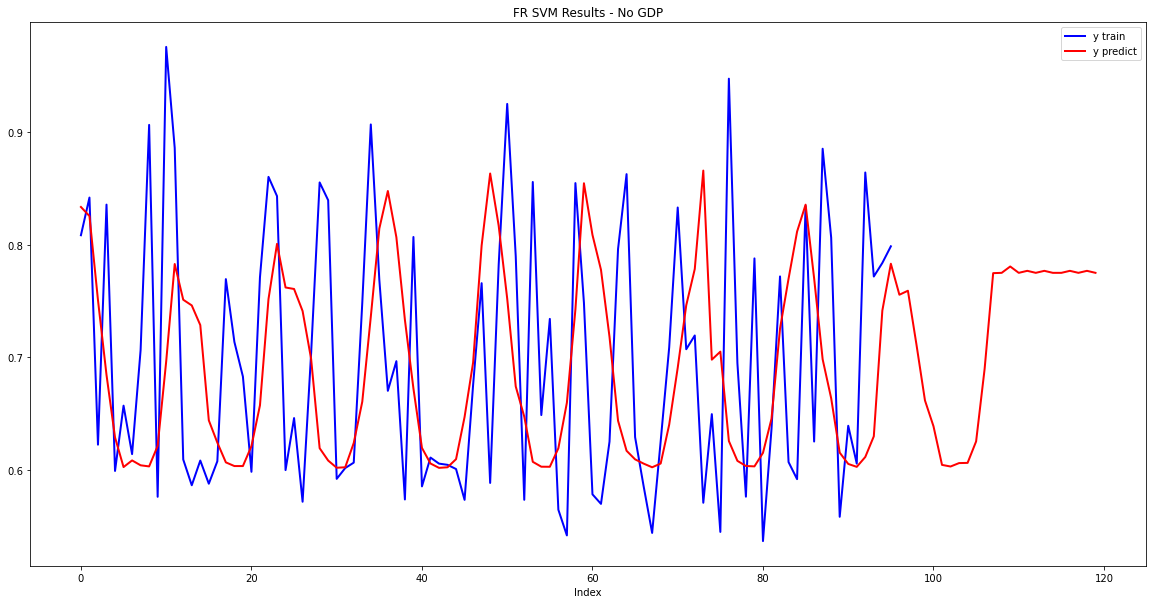

MSE without GDP: 0.004399053065883107


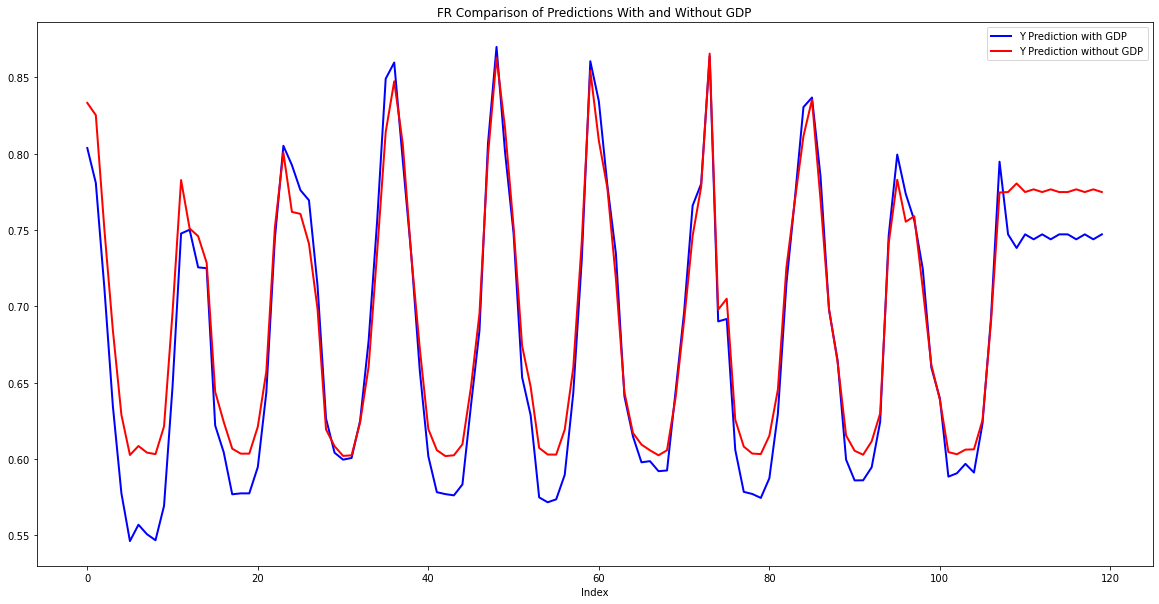

                    GB      GB_GDP        GB_POP  GB_TMP
DateTime                                                
2010-01-31   1064608.0  1846295.52  4.721410e+10  1190.4
2010-02-28  28403532.0  1667621.76  4.264499e+10  1478.4
2010-03-31  28921932.0  1846295.52  4.721410e+10  3943.2
2010-04-30  24922949.0  1786737.60  4.569106e+10  5688.0
2010-05-31  24630290.0  1846295.52  4.721410e+10  7291.2
...                ...         ...           ...     ...
2015-08-31  20942474.0  2181988.32  4.899995e+10  3496.8
2015-09-30  21589349.0  2111601.60  4.741931e+10  3384.0
2015-10-31  24153386.0  2181988.32  4.899995e+10  3496.8
2015-11-30  24628841.0  2111601.60  4.741931e+10  3384.0
2015-12-31  24664800.0  2181988.32  4.899995e+10  3496.8

[72 rows x 4 columns]


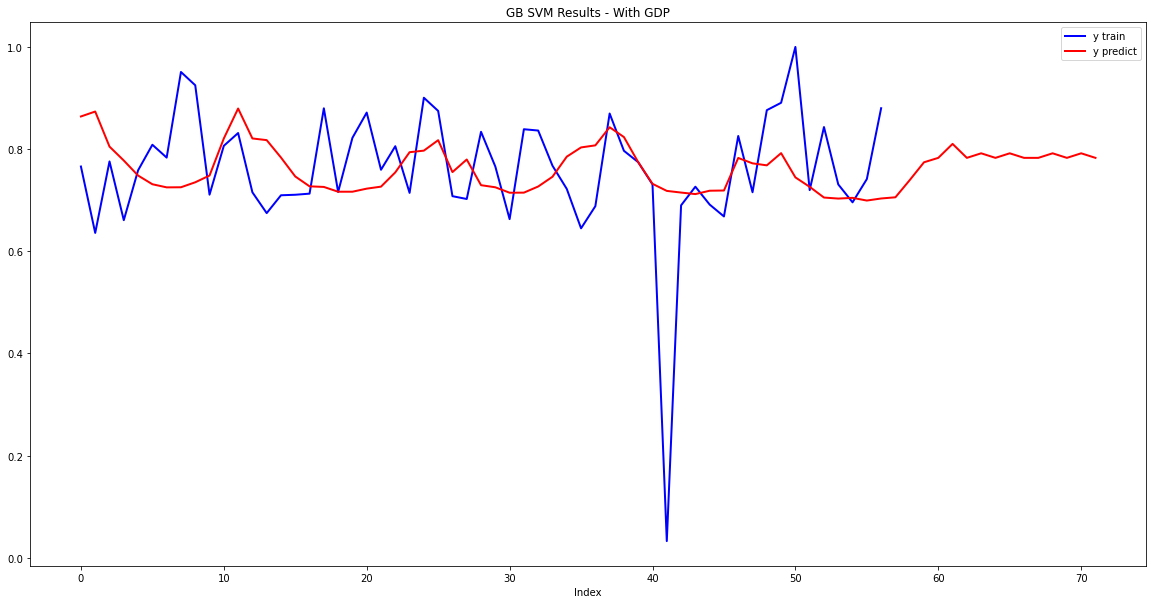

MSE with GDP: 0.01349250921658895


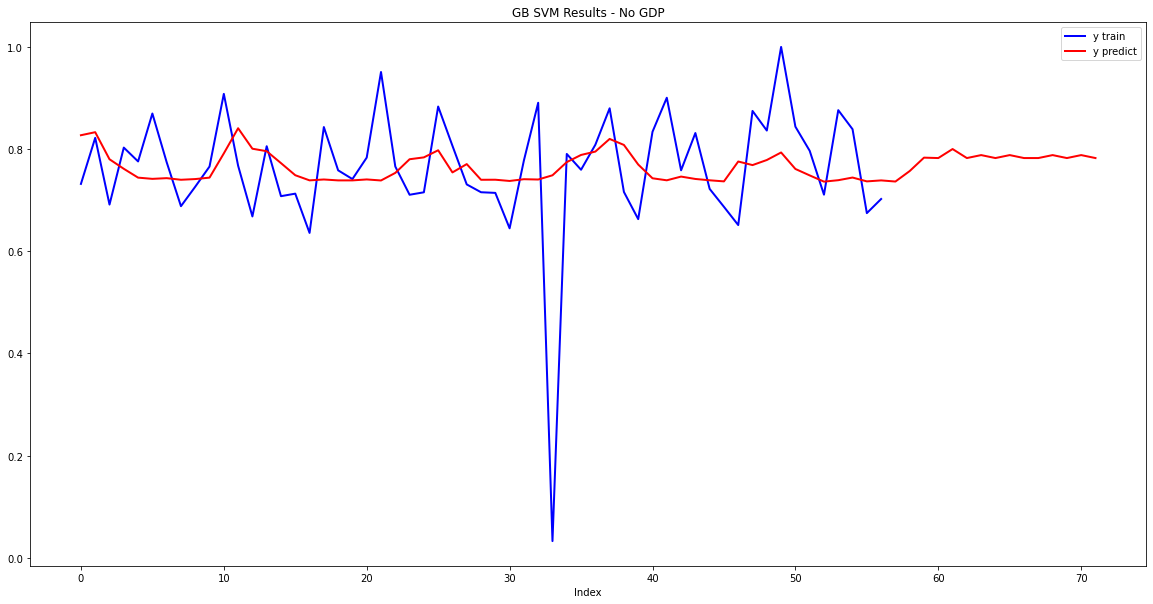

MSE without GDP: 0.013567113656349243


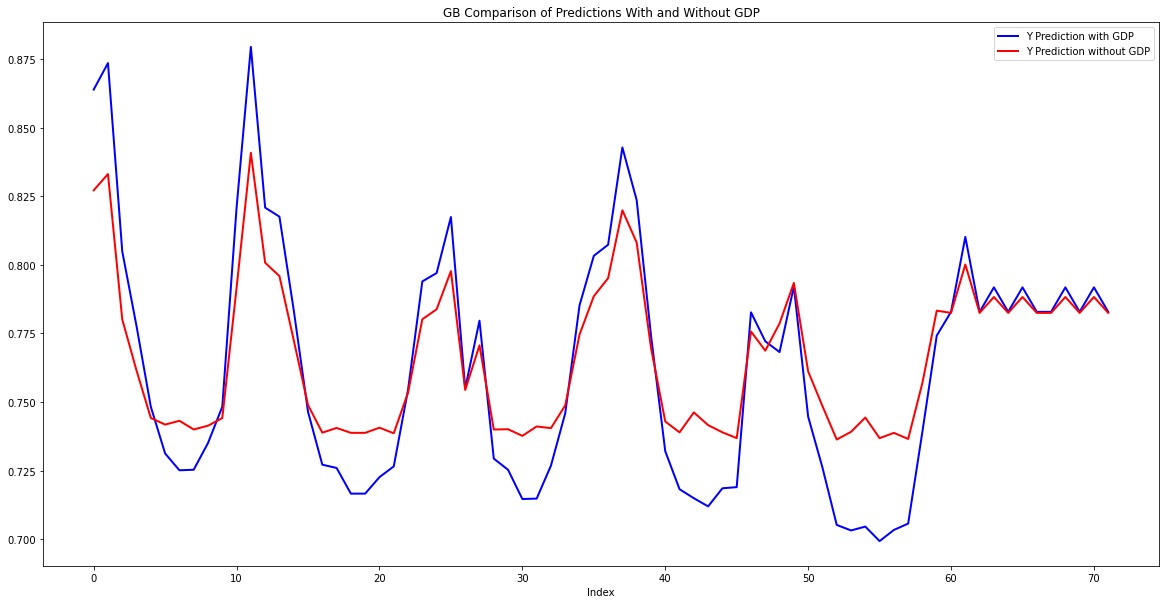

                   GR    GR_GDP        GR_POP   GR_TMP
DateTime                                              
2006-01-31  4809788.0  203521.2  8.321810e+09   3794.4
2006-02-28  4250402.0  183825.6  7.516473e+09   4972.8
2006-03-31  4327906.0  203521.2  8.321810e+09   7588.8
2006-04-30  3787528.0  196956.0  8.053364e+09  10440.0
2006-05-31  4239620.0  203521.2  8.321810e+09  13838.4
...               ...       ...           ...      ...
2015-08-31  4714480.0  145377.6  7.930854e+09   7216.8
2015-09-30  4083838.0  140688.0  7.675020e+09   6984.0
2015-10-31  3812829.0  145377.6  7.930854e+09   7216.8
2015-11-30  3876516.0  140688.0  7.675020e+09   6984.0
2015-12-31  4595777.0  145377.6  7.930854e+09   7216.8

[120 rows x 4 columns]


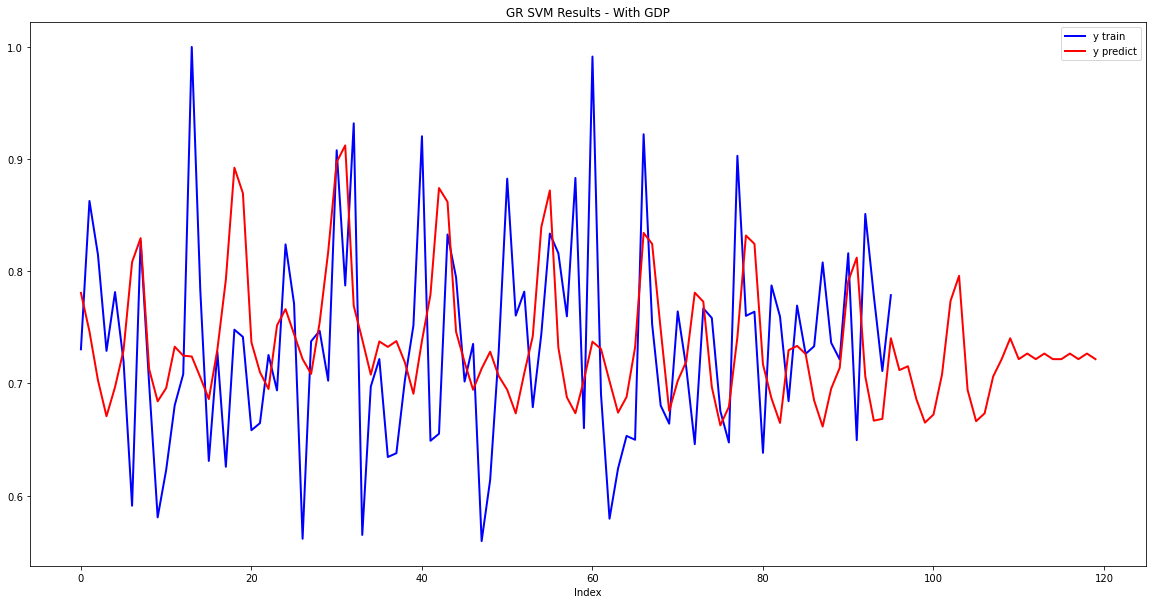

MSE with GDP: 0.0027070617310159953


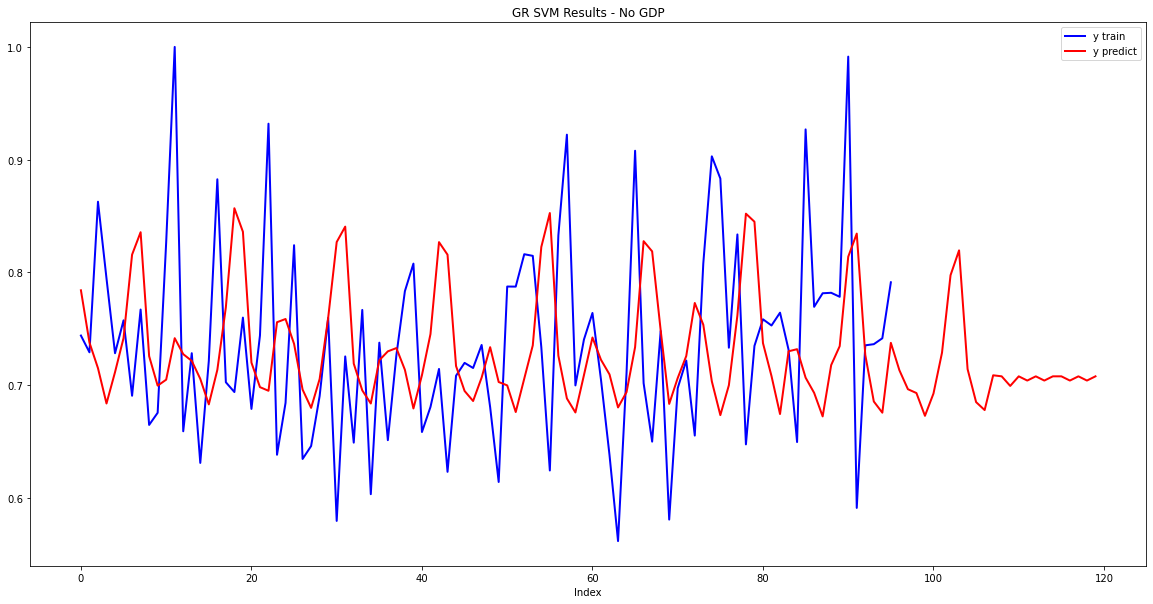

MSE without GDP: 0.003636203440882994


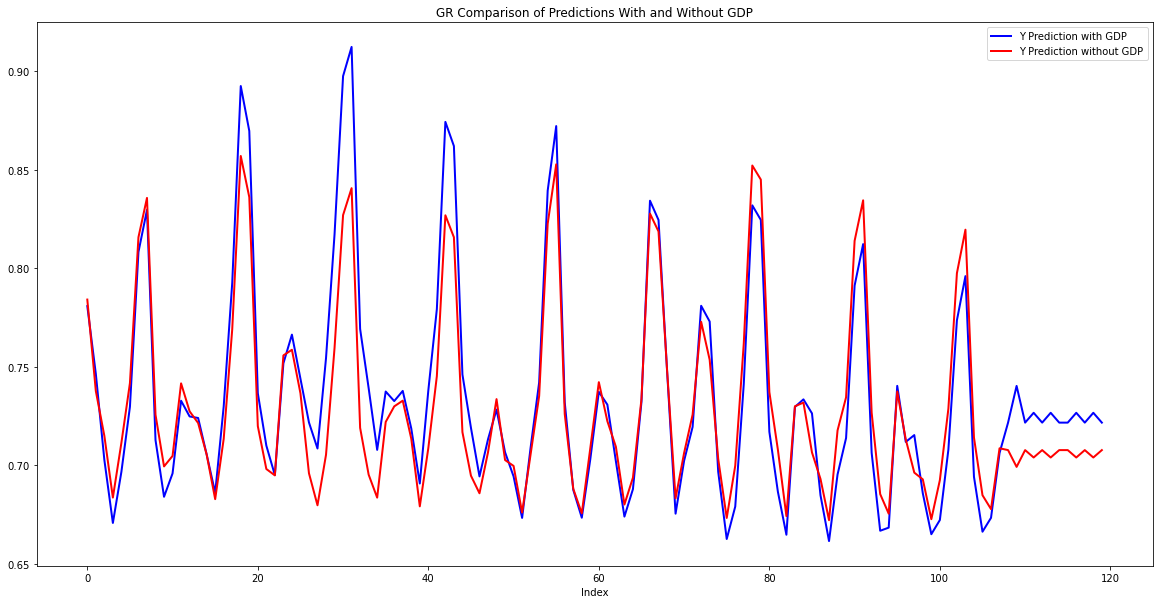

                   HR    HR_GDP        HR_POP   HR_TMP
DateTime                                              
2006-01-31  1675106.0  37512.48  3.251858e+09     74.4
2006-02-28  1478859.0  33882.24  2.937162e+09   1545.6
2006-03-31  1568986.0  37512.48  3.251858e+09   3943.2
2006-04-30  1283078.0  36302.40  3.146959e+09   8424.0
2006-05-31  1260577.0  37512.48  3.251858e+09  11383.2
...               ...       ...           ...      ...
2015-08-31  1513943.0  36850.32  3.149258e+09   3422.4
2015-09-30  1354602.0  35661.60  3.047669e+09   3312.0
2015-10-31  1359098.0  36850.32  3.149258e+09   3422.4
2015-11-30  1391200.0  35661.60  3.047669e+09   3312.0
2015-12-31  1538690.0  36850.32  3.149258e+09   3422.4

[120 rows x 4 columns]


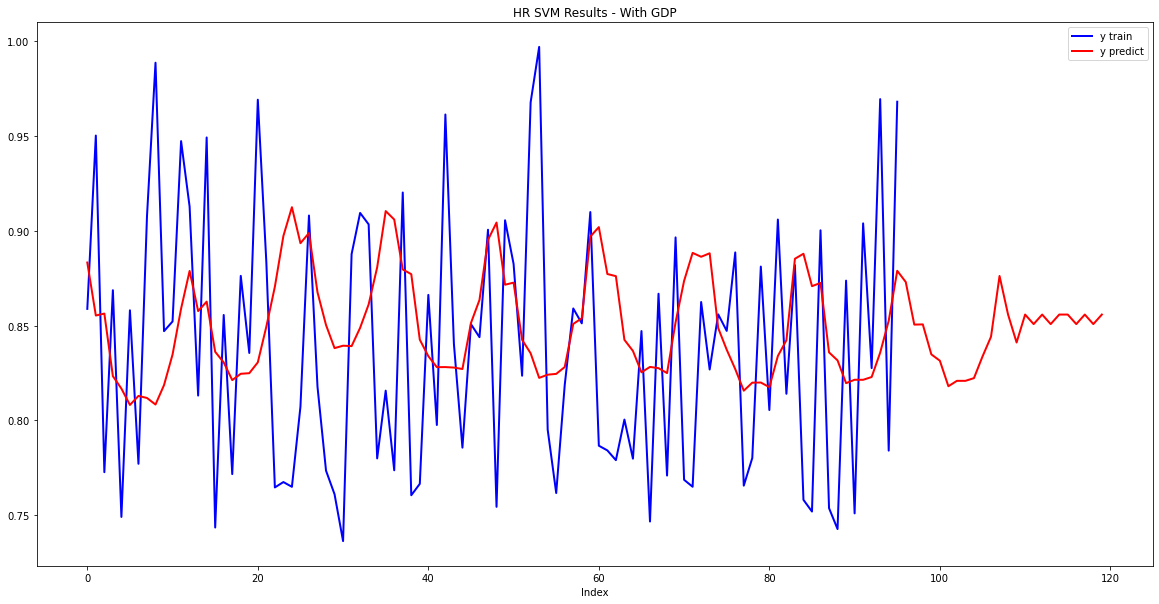

MSE with GDP: 0.0028325937647342577


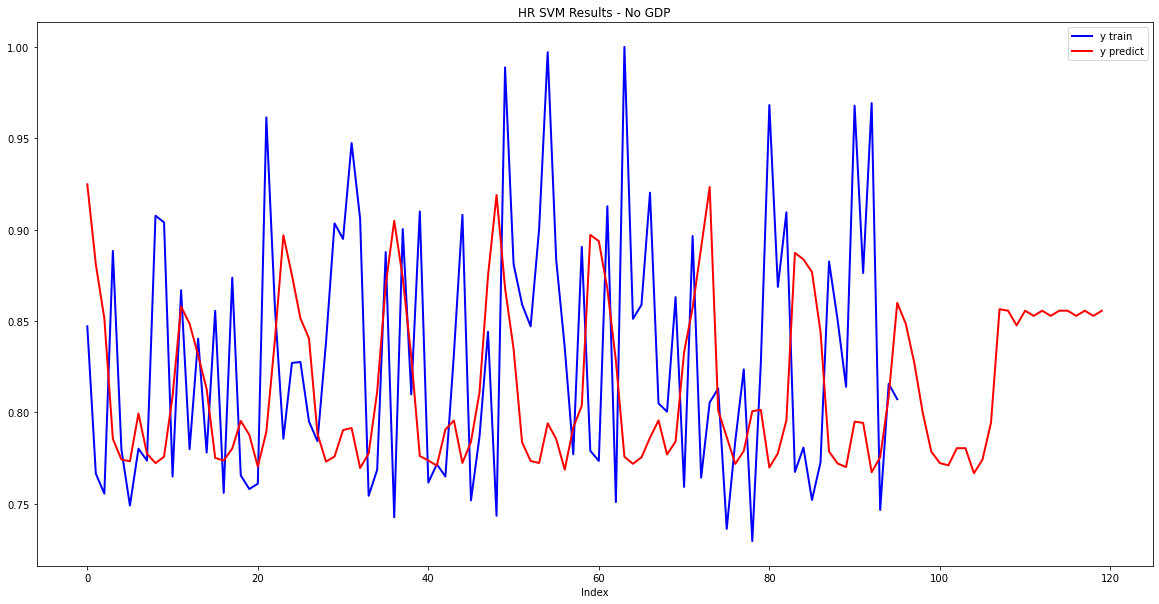

MSE without GDP: 0.002223497450004147


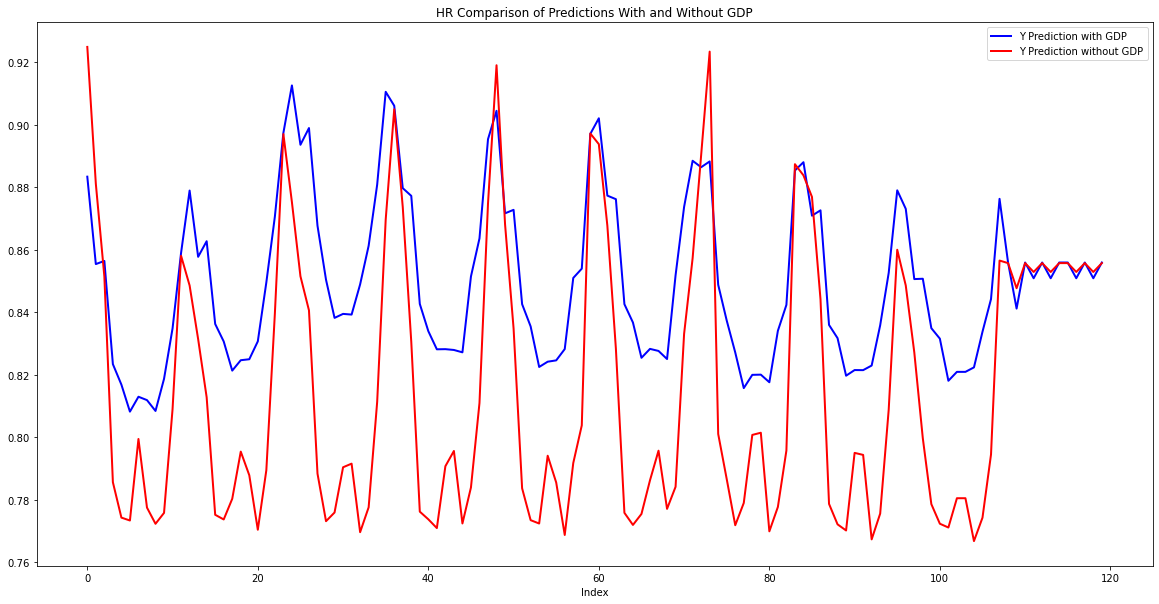

                   HU    HU_GDP        HU_POP   HU_TMP
DateTime                                              
2006-01-31  3915924.0  85991.52  7.481406e+09  -2752.8
2006-02-28  3523752.0  77669.76  6.757399e+09   -672.0
2006-03-31  3761194.0  85991.52  7.481406e+09   2827.2
2006-04-30  3317057.0  83217.60  7.240070e+09   8784.0
2006-05-31  3419501.0  85991.52  7.481406e+09  11308.8
...               ...       ...           ...      ...
2015-08-31  3340221.0  93052.08  7.274775e+09   1934.4
2015-09-30  3312040.0  90050.40  7.040105e+09   1872.0
2015-10-31  3503324.0  93052.08  7.274775e+09   1934.4
2015-11-30  3490175.0  90050.40  7.040105e+09   1872.0
2015-12-31  3491462.0  93052.08  7.274775e+09   1934.4

[120 rows x 4 columns]


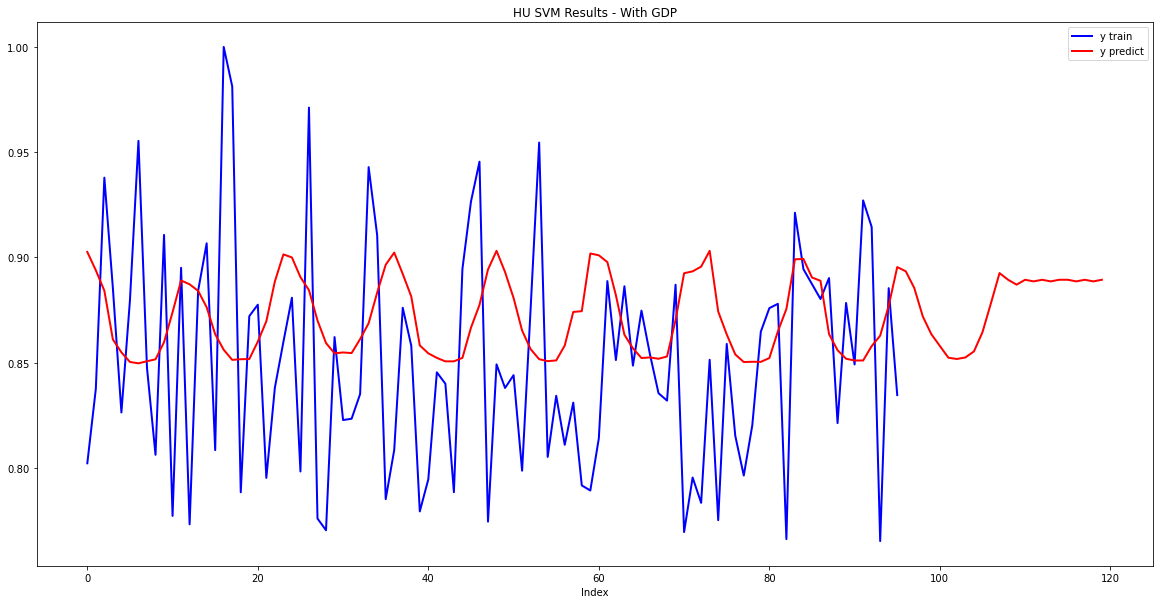

MSE with GDP: 0.002774871055214434


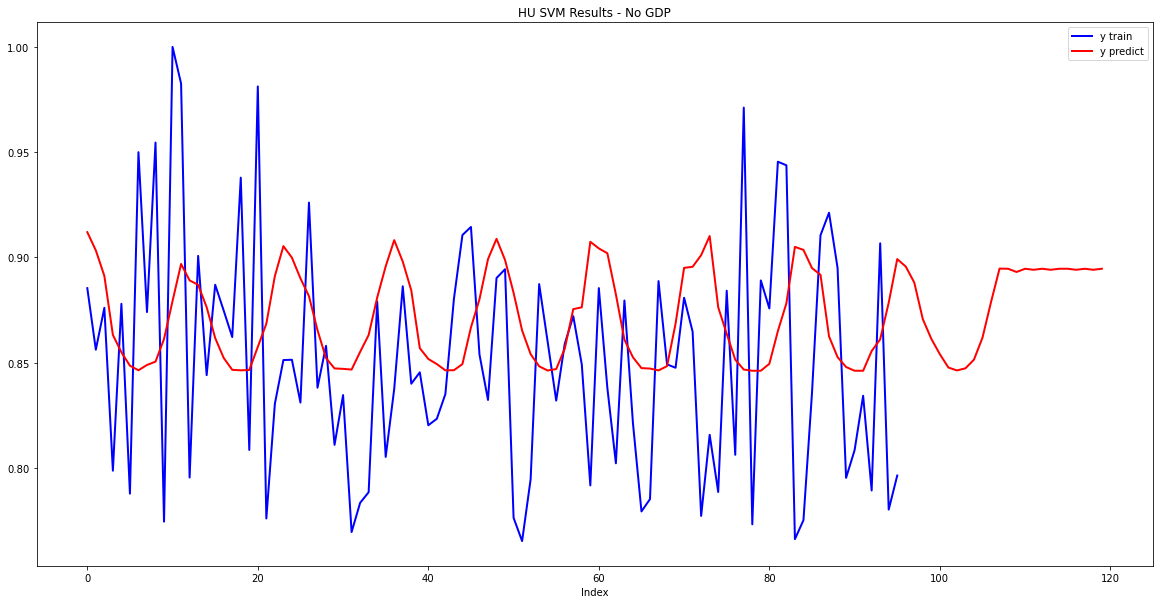

MSE without GDP: 0.002787324453090891


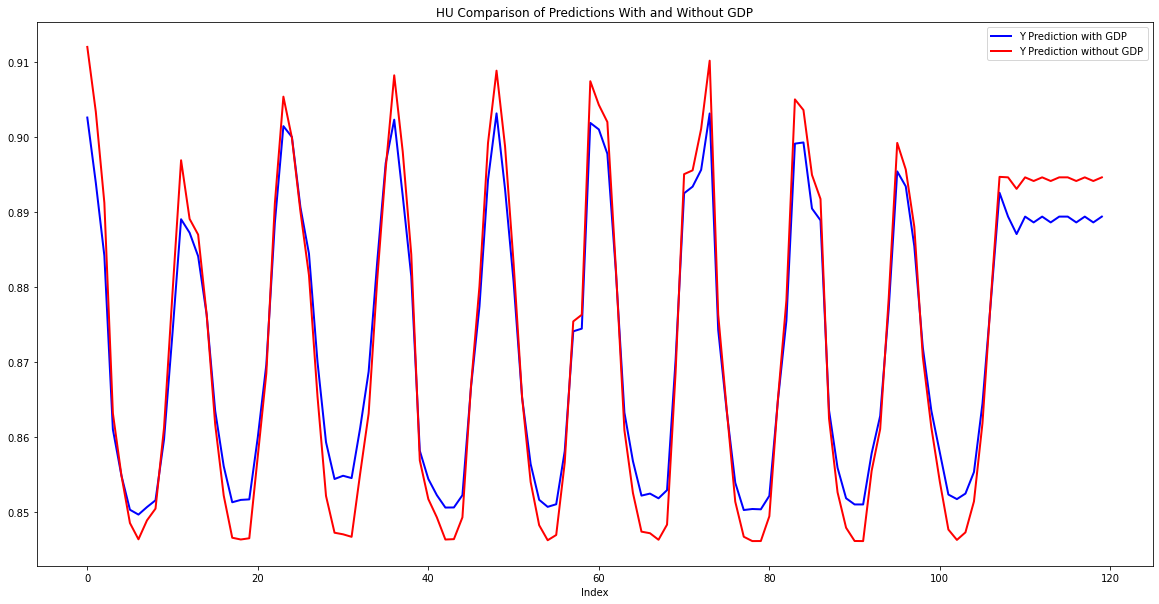

                   IE     IE_GDP        IE_POP  IE_TMP
DateTime                                              
2008-01-31  2614197.0  205299.36  3.285409e+09  4687.2
2008-02-29  2435776.0  192054.24  3.073447e+09  4315.2
2008-03-31  2483236.0  205299.36  3.285409e+09  4612.8
2008-04-30  2327579.0  198676.80  3.179428e+09  5688.0
2008-05-31  2191705.0  205299.36  3.285409e+09  9225.6
...               ...        ...           ...     ...
2015-08-31  2060460.0  216980.16  3.461404e+09  4836.0
2015-09-30  2084834.0  209980.80  3.349746e+09  4680.0
2015-10-31  2237820.0  216980.16  3.461404e+09  4836.0
2015-11-30  2317848.0  209980.80  3.349746e+09  4680.0
2015-12-31  2403009.0  216980.16  3.461404e+09  4836.0

[96 rows x 4 columns]


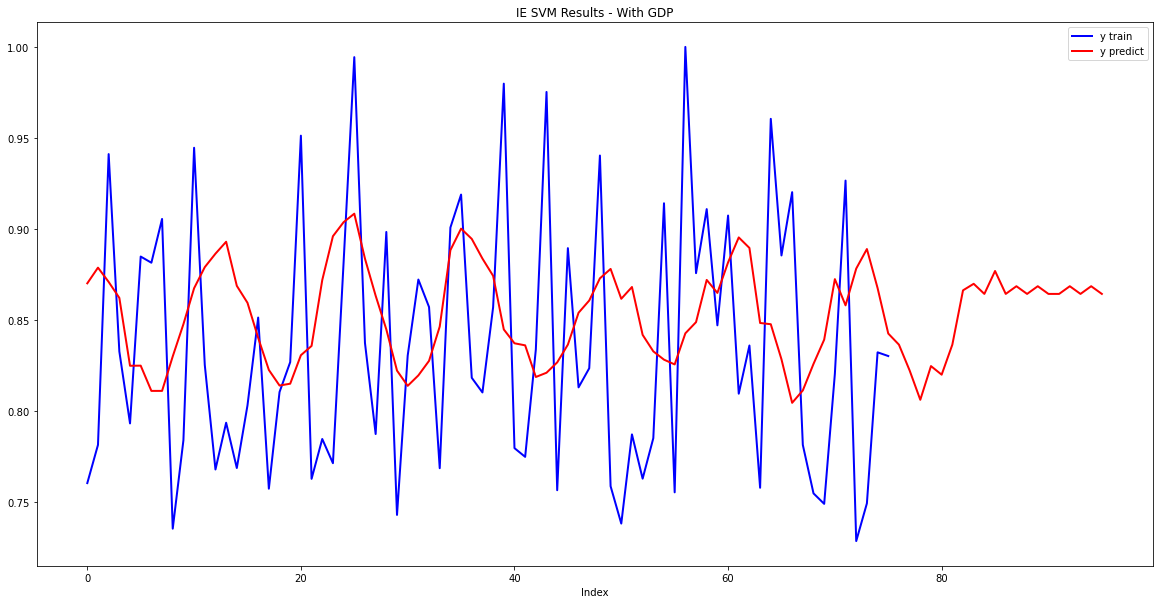

MSE with GDP: 0.0032057162411814667


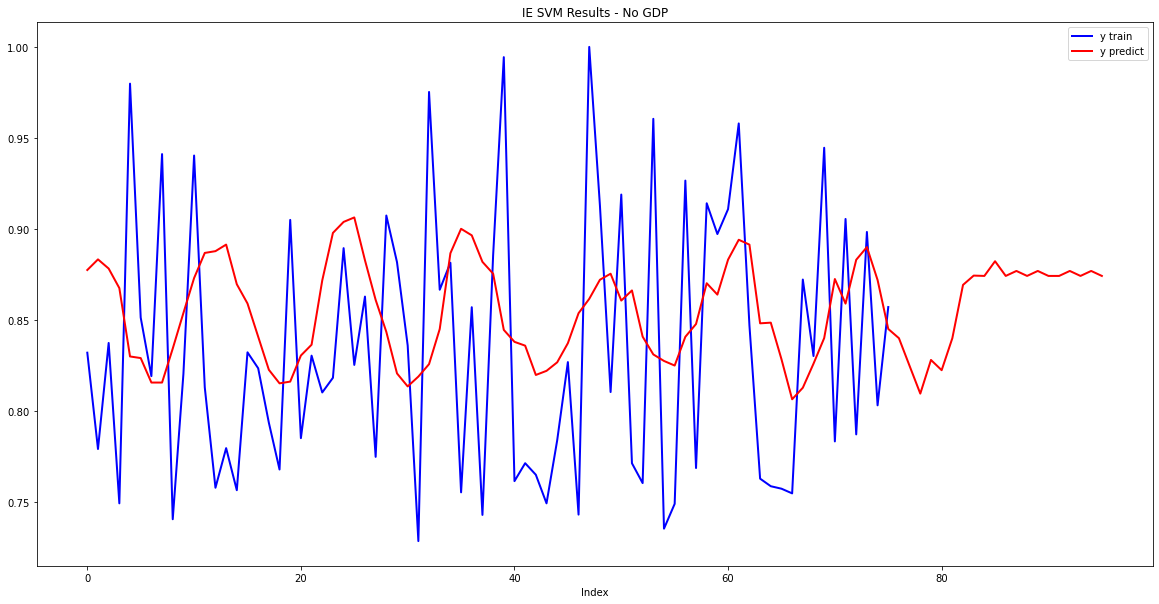

MSE without GDP: 0.0031954573078014684


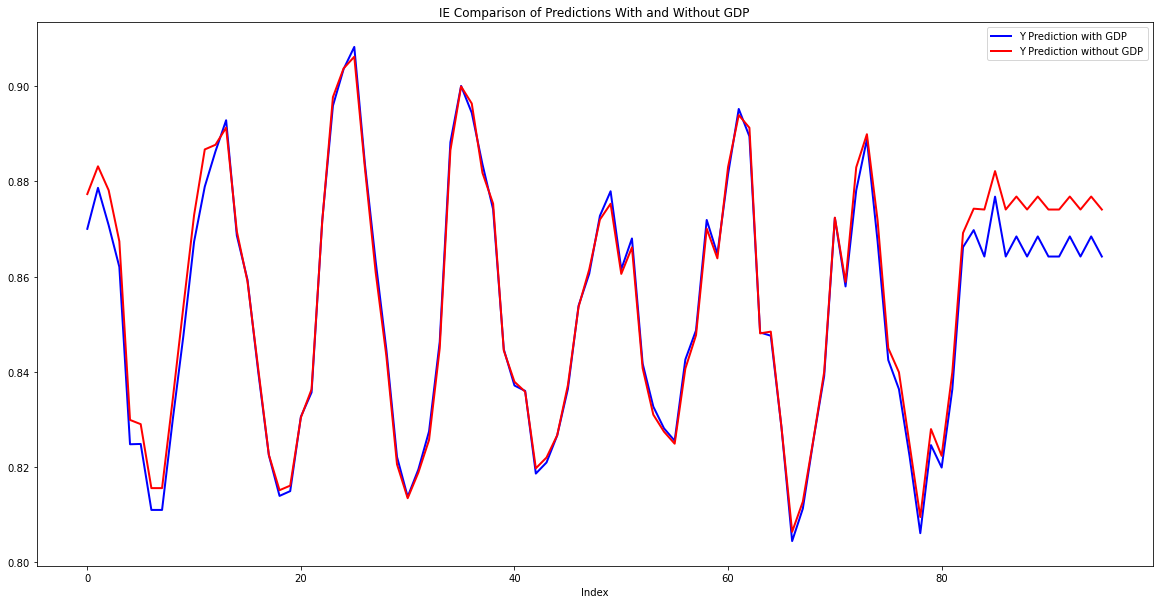

                   IS    IS_GDP       IS_POP  IS_TMP
DateTime                                            
2008-01-31    39341.0  13444.08  231276864.0 -1785.6
2008-02-29        0.0  12576.72  216355776.0 -1252.8
2008-03-31        0.0  13444.08  231276864.0 -1636.8
2008-04-30        0.0  13010.40  223816320.0   288.0
2008-05-31        0.0  13444.08  231276864.0  4092.0
...               ...       ...          ...     ...
2015-08-31  1472057.0  13034.88  245700792.0 -1860.0
2015-09-30  1450665.0  12614.40  237774960.0 -1800.0
2015-10-31  1533615.0  13034.88  245700792.0 -1860.0
2015-11-30  1536337.0  12614.40  237774960.0 -1800.0
2015-12-31  1582217.0  13034.88  245700792.0 -1860.0

[96 rows x 4 columns]


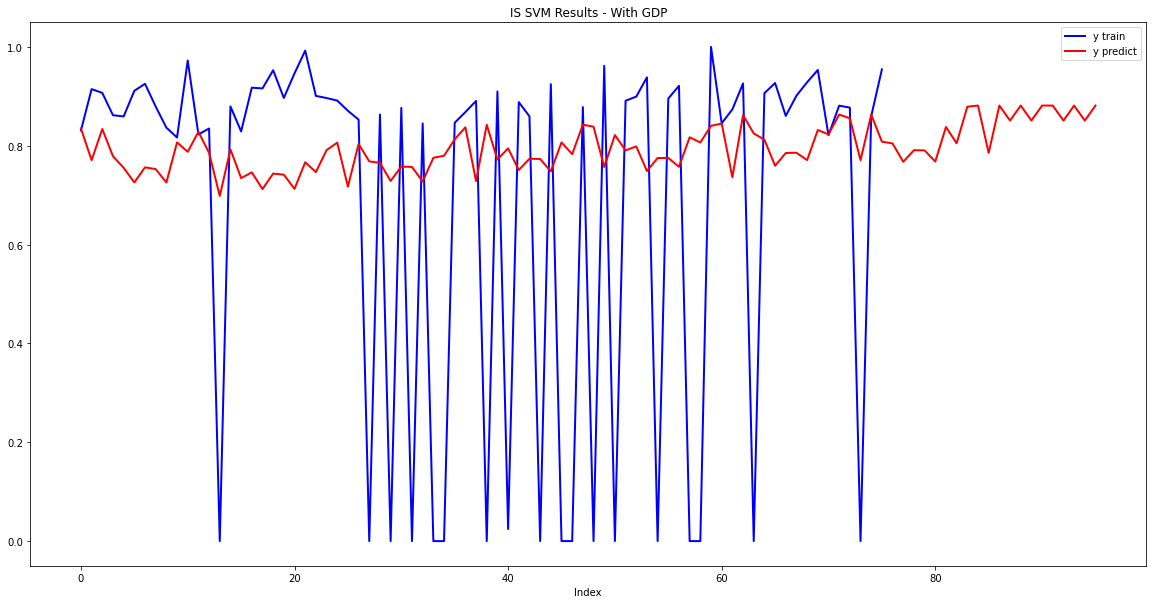

MSE with GDP: 0.15174373464983415


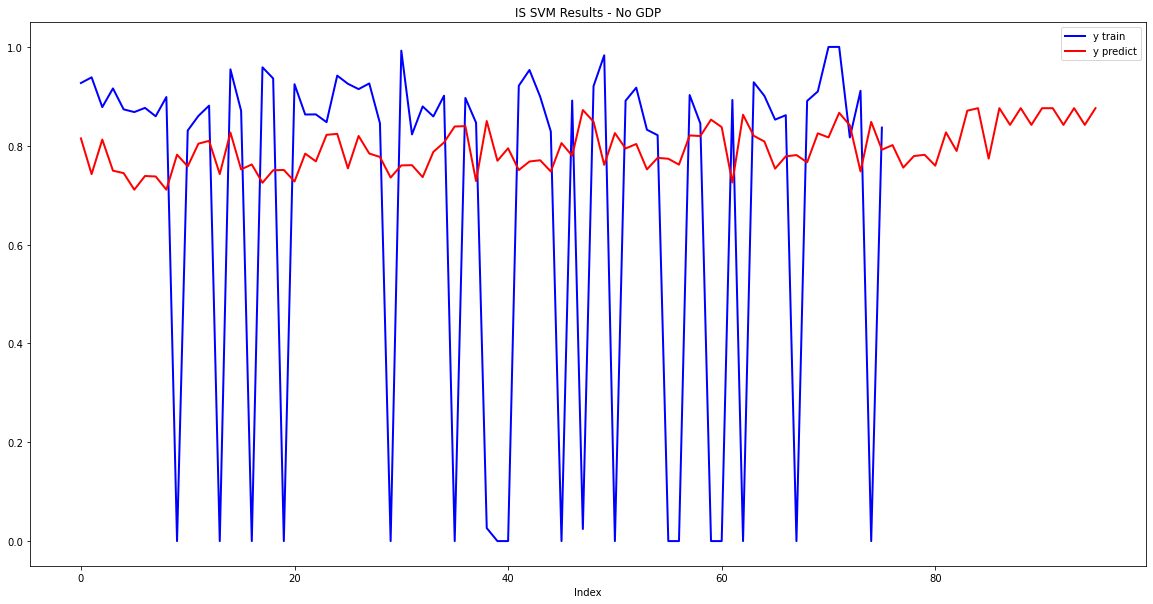

MSE without GDP: 0.1517755910355123


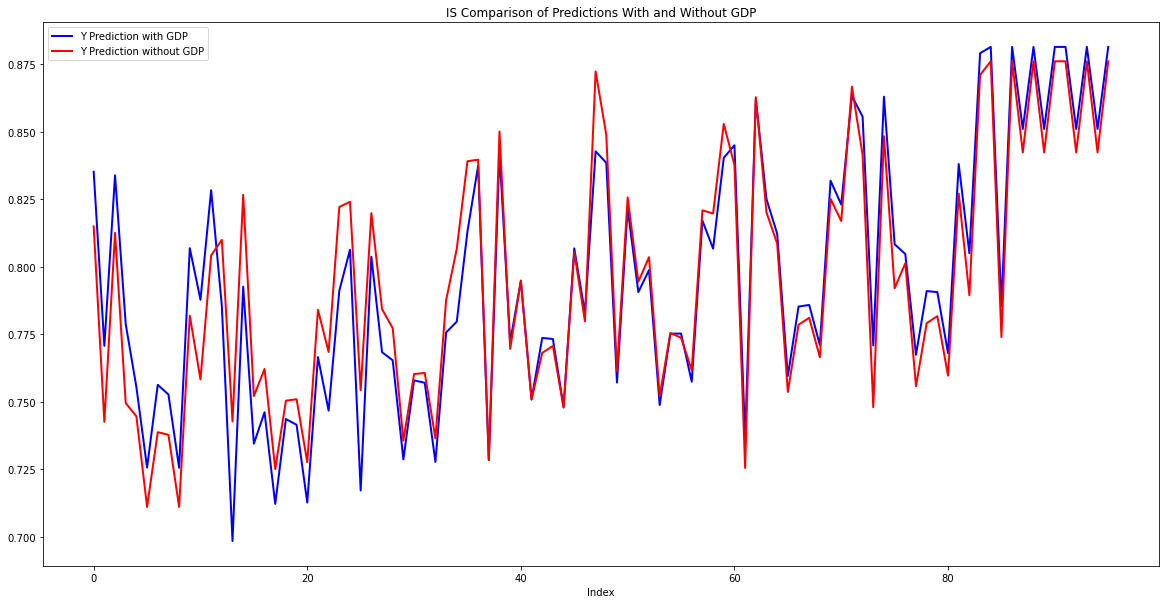

                    IT      IT_GDP        IT_POP   IT_TMP
DateTime                                                 
2006-01-31  29310114.0  1450465.20  4.355571e+10   3571.2
2006-02-28  27119973.0  1310097.60  3.934064e+10   4166.4
2006-03-31  29220298.0  1450465.20  4.355571e+10   6175.2
2006-04-30  25237613.0  1403676.00  4.215069e+10   9000.0
2006-05-31  27199287.0  1450465.20  4.355571e+10  12499.2
...                ...         ...           ...      ...
2015-08-31  25131388.0  1366460.16  4.507040e+10   6175.2
2015-09-30  26476029.0  1322380.80  4.361652e+10   5976.0
2015-10-31  25888985.0  1366460.16  4.507040e+10   6175.2
2015-11-30  25665571.0  1322380.80  4.361652e+10   5976.0
2015-12-31  25817988.0  1366460.16  4.507040e+10   6175.2

[120 rows x 4 columns]


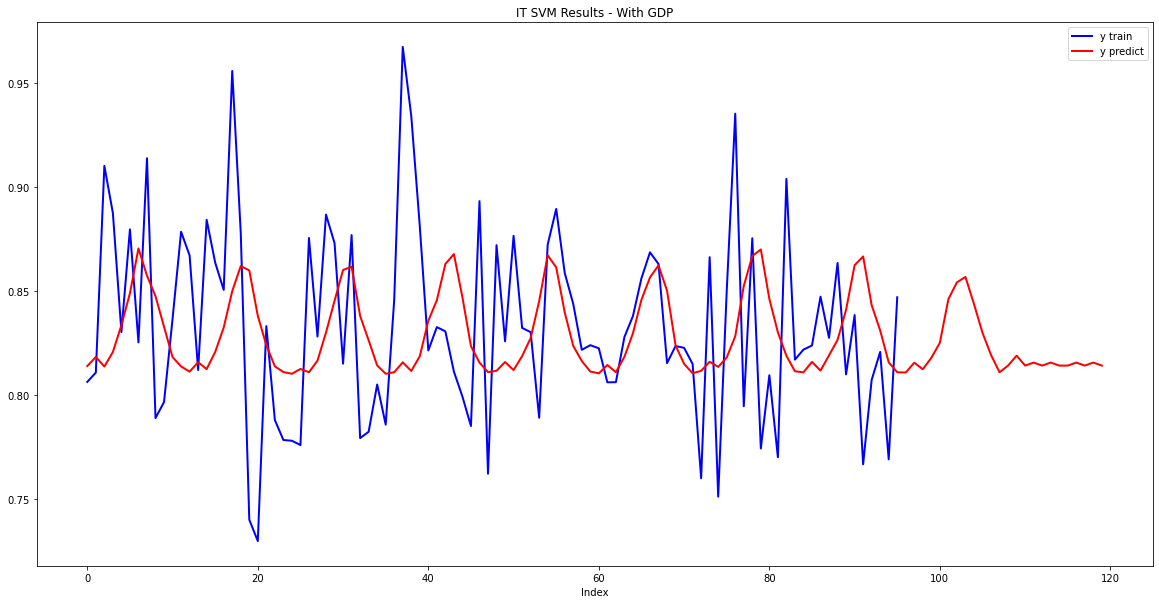

MSE with GDP: 0.002772180325113463


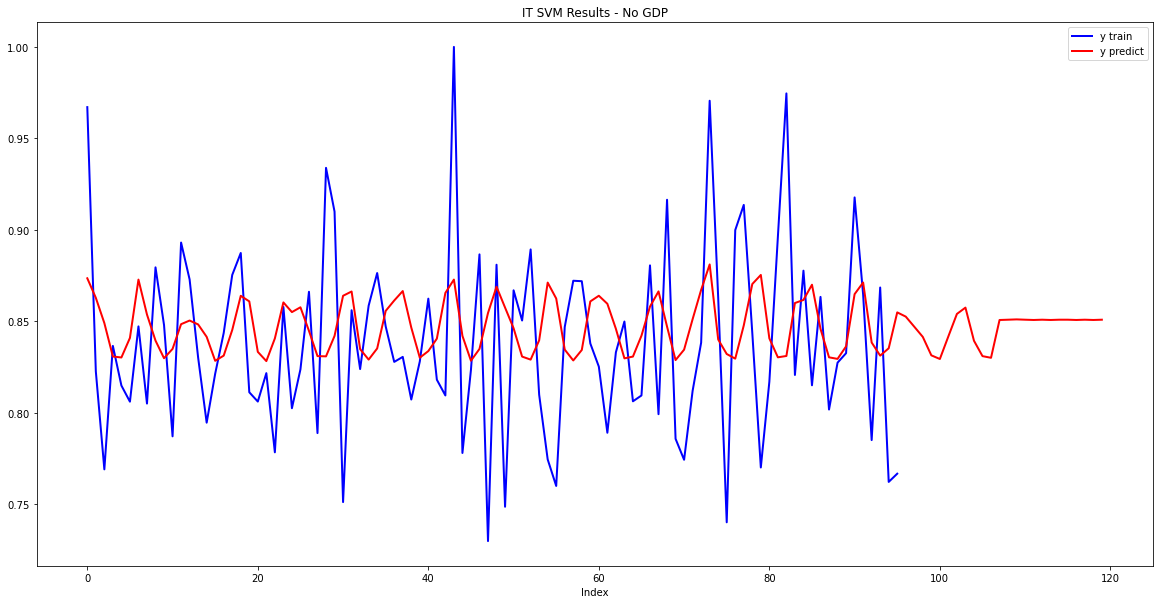

MSE without GDP: 0.0024803879988211245


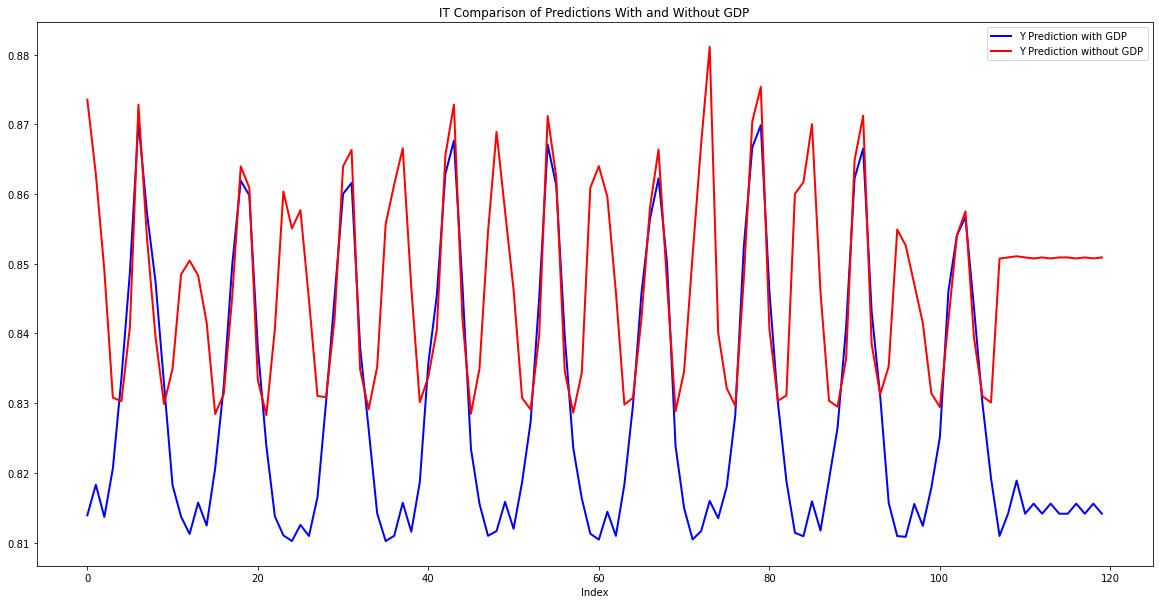

                  LT    LT_GDP        LT_POP  LT_TMP
DateTime                                            
2010-01-31  945422.0   8005.44  2.324119e+09 -7886.4
2010-02-28  797736.0   7230.72  2.099204e+09 -3225.6
2010-03-31  797478.0   8005.44  2.324119e+09   148.8
2010-04-30  731186.0   7747.20  2.249148e+09  5184.0
2010-05-31  740582.0   8005.44  2.324119e+09  9820.8
...              ...       ...           ...     ...
2015-08-31  863006.0  30831.36  2.181319e+09  -892.8
2015-09-30  866479.0  29836.80  2.110954e+09  -864.0
2015-10-31  954761.0  30831.36  2.181319e+09  -892.8
2015-11-30  958554.0  29836.80  2.110954e+09  -864.0
2015-12-31  995600.0  30831.36  2.181319e+09  -892.8

[72 rows x 4 columns]


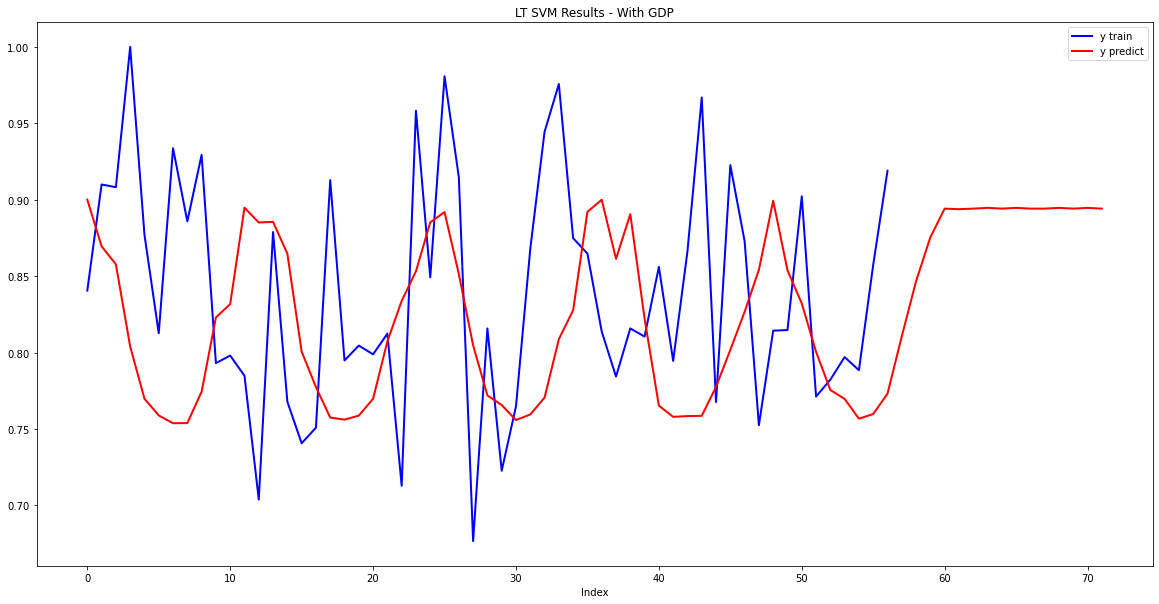

MSE with GDP: 0.0025924258023070873


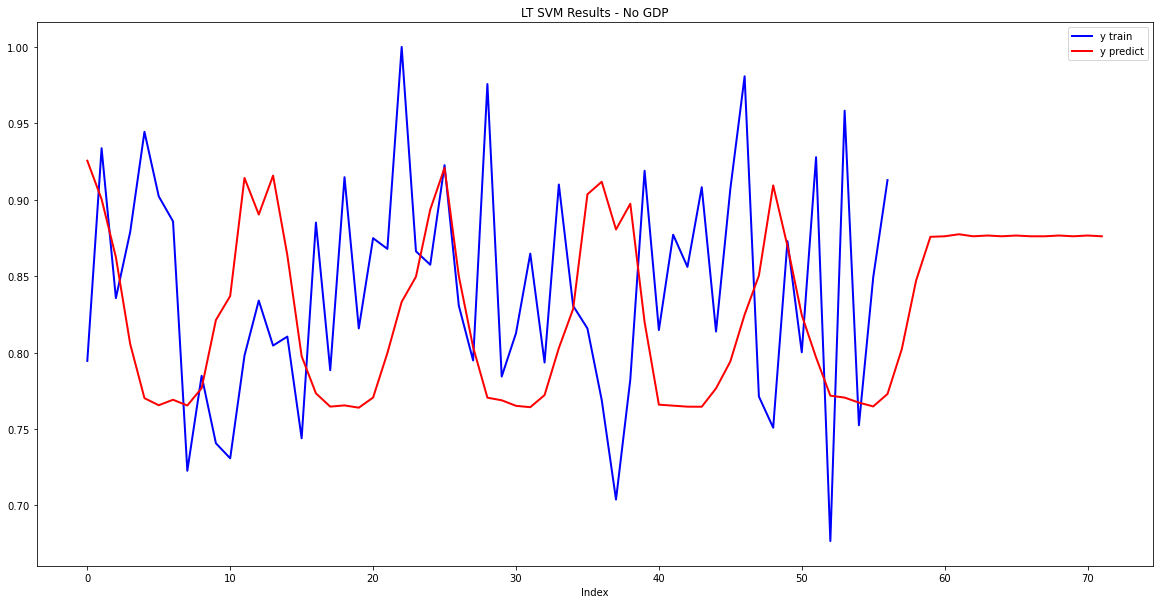

MSE without GDP: 0.0026008530682401607


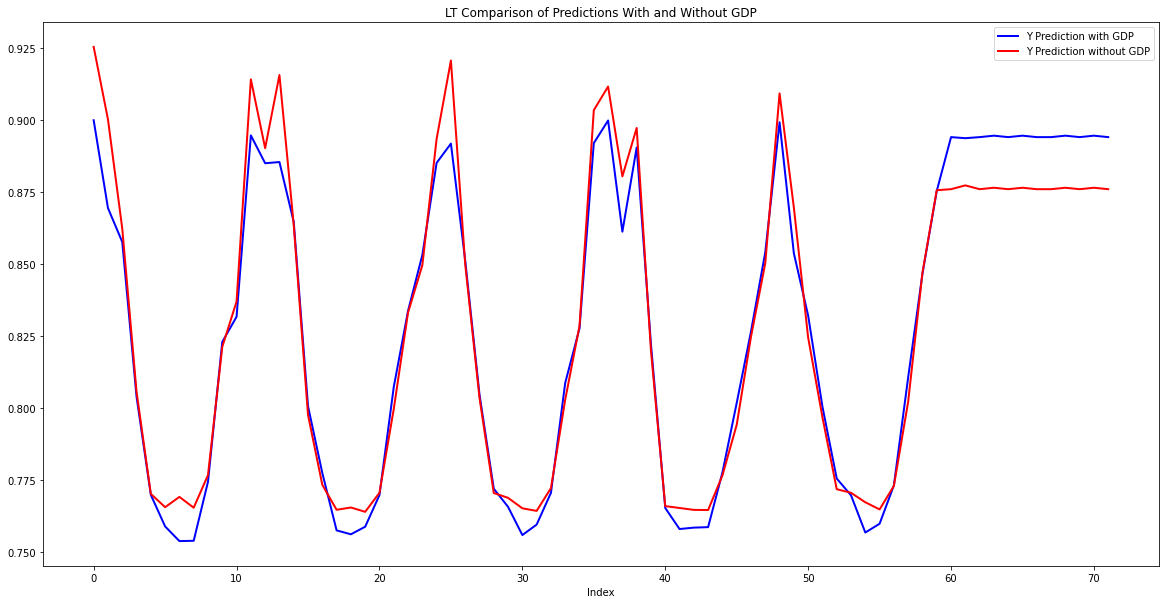

                  LU    LU_GDP       LU_POP   LU_TMP
DateTime                                            
2006-01-31  607120.0  31582.80  346413840.0   -446.4
2006-02-28  534067.0  28526.40  312889920.0    604.8
2006-03-31  605757.0  31582.80  346413840.0   2380.8
2006-04-30  546522.0  30564.00  335239200.0   6408.0
2006-05-31  551829.0  31582.80  346413840.0  10192.8
...              ...       ...          ...      ...
2015-08-31  467149.0  42980.88  421655304.0   2232.0
2015-09-30  523337.0  41594.40  408053520.0   2160.0
2015-10-31  546963.0  42980.88  421655304.0   2232.0
2015-11-30  543026.0  41594.40  408053520.0   2160.0
2015-12-31  512378.0  42980.88  421655304.0   2232.0

[120 rows x 4 columns]


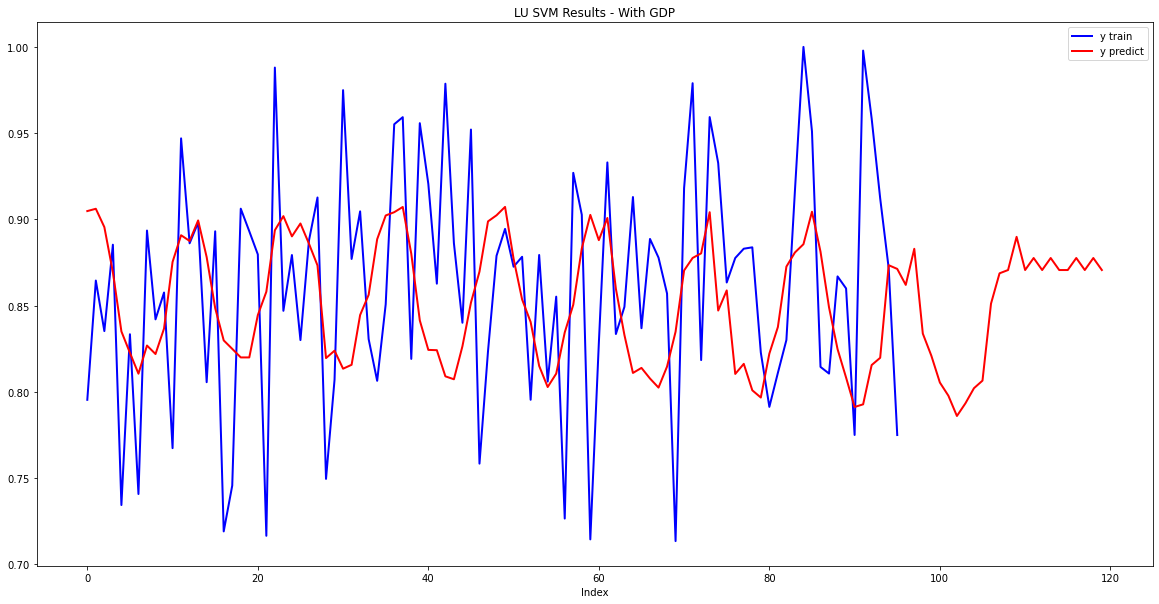

MSE with GDP: 0.003991882211261177


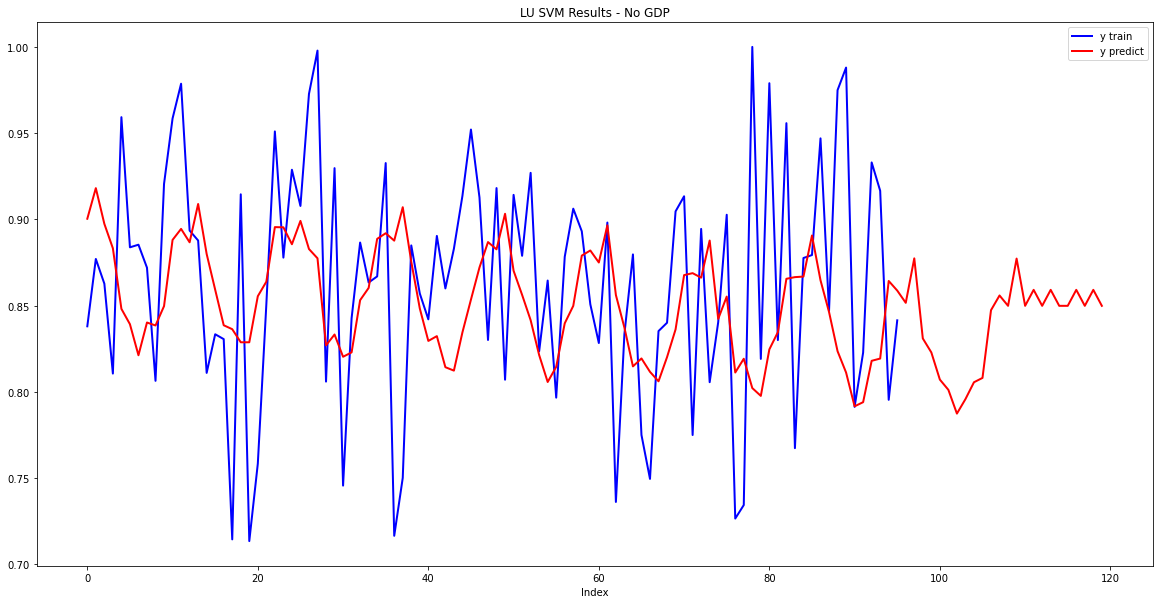

MSE without GDP: 0.003790463222724464


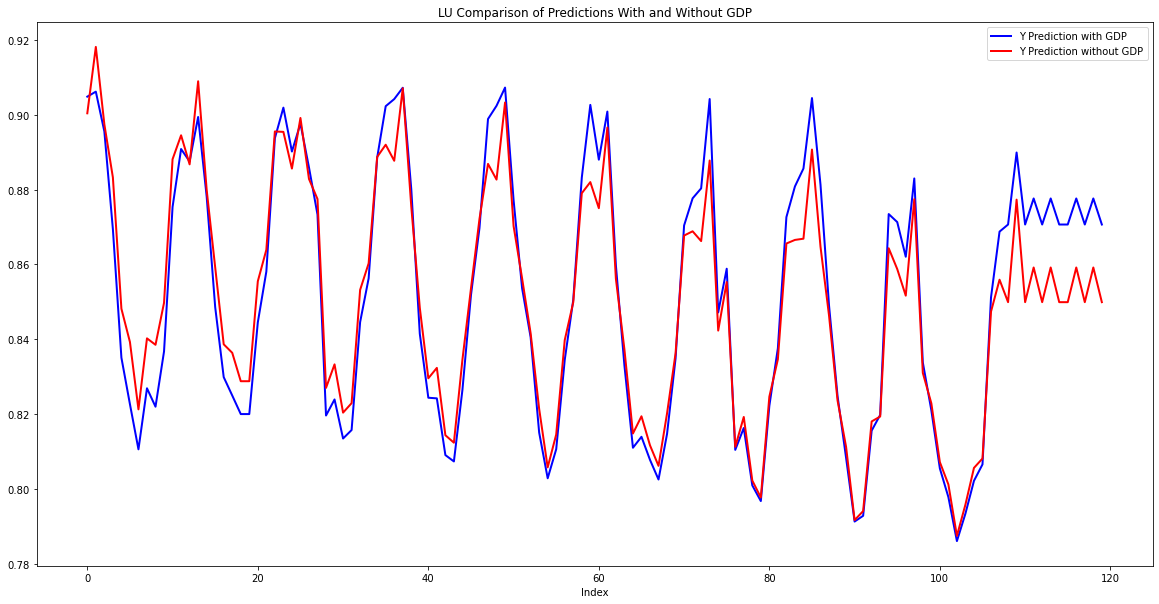

                  LV    LV_GDP        LV_POP  LV_TMP
DateTime                                            
2010-01-31  734236.0  25273.68  1.576433e+09 -8184.0
2010-02-28  627123.0  22827.84  1.423875e+09 -4166.4
2010-03-31  637104.0  25273.68  1.576433e+09  -520.8
2010-04-30  544633.0  24458.40  1.525580e+09  4608.0
2010-05-31  512640.0  25273.68  1.576433e+09  9225.6
...              ...       ...           ...     ...
2015-08-31  554946.0  20274.00  1.486269e+09  -967.2
2015-09-30  551759.0  19620.00  1.438325e+09  -936.0
2015-10-31  612750.0  20274.00  1.486269e+09  -967.2
2015-11-30  614464.0  19620.00  1.438325e+09  -936.0
2015-12-31  645035.0  20274.00  1.486269e+09  -967.2

[72 rows x 4 columns]


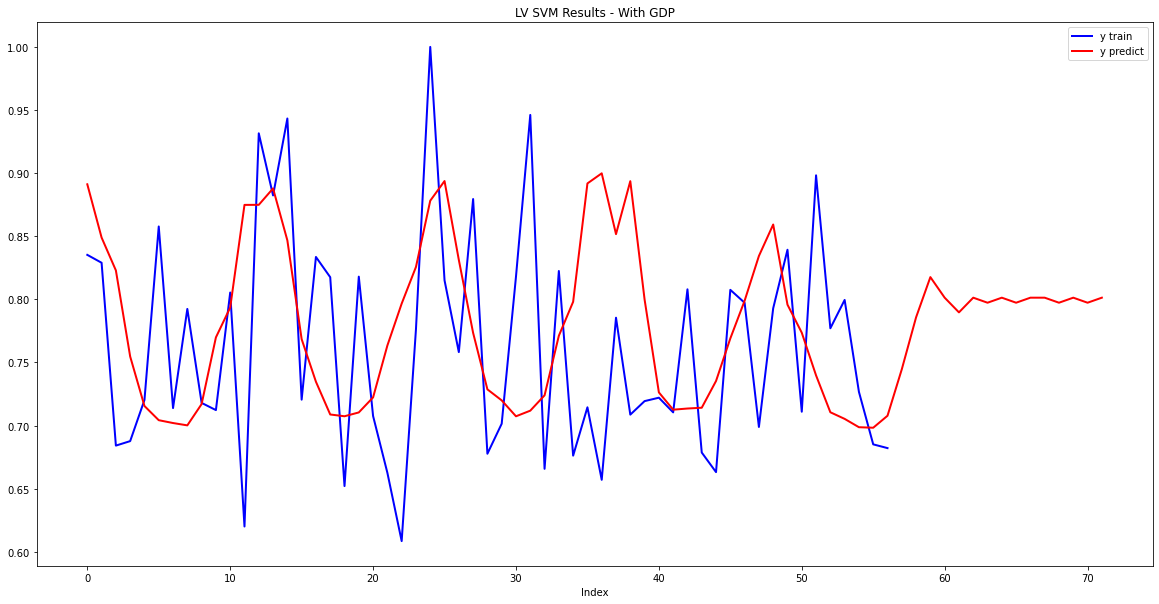

MSE with GDP: 0.002361466013981051


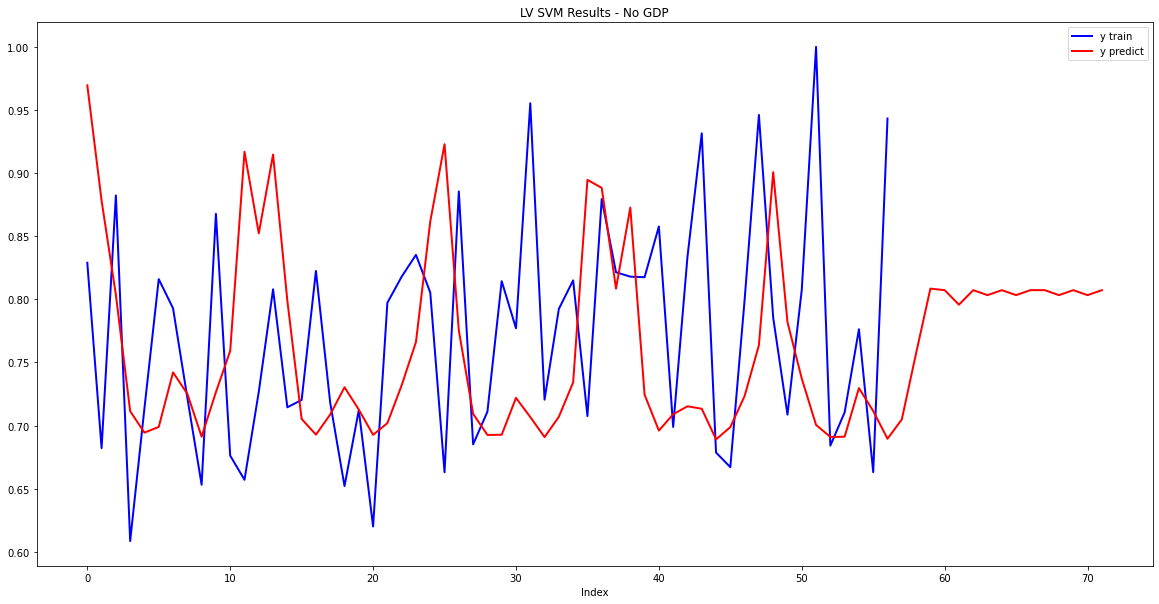

MSE without GDP: 0.003205911746832447


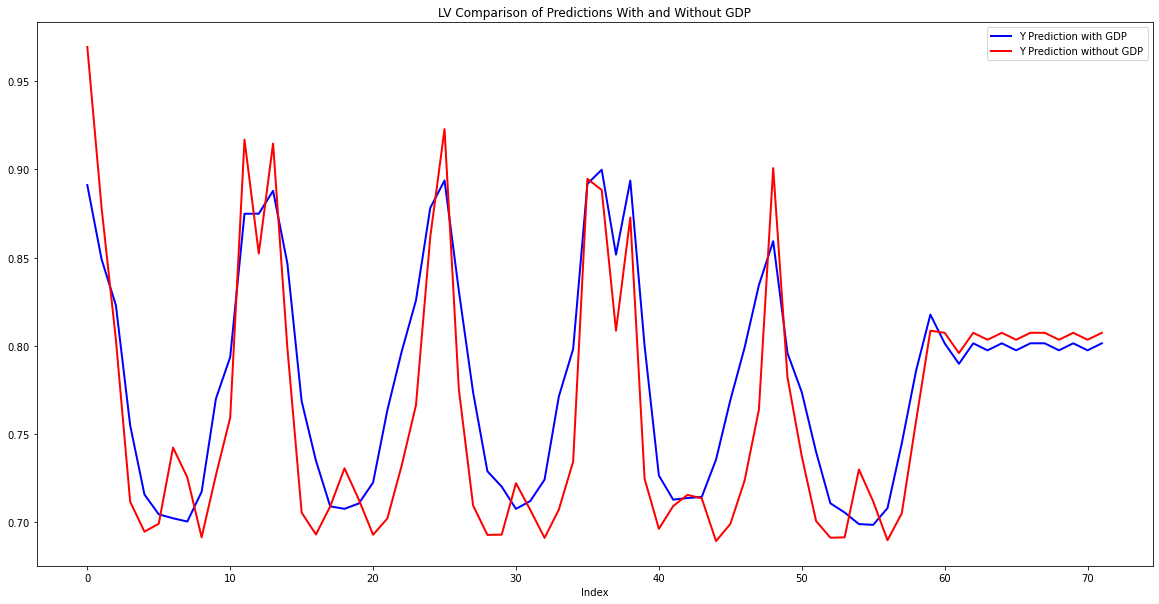

                  MK   MK_GDP        MK_POP   MK_TMP
DateTime                                            
2006-01-31  944157.0  5103.84  1.534969e+09  -2008.8
2006-02-28  821566.0  4609.92  1.386424e+09    -67.2
2006-03-31  800107.0  5103.84  1.534969e+09   3571.2
2006-04-30  629614.0  4939.20  1.485454e+09   7344.0
2006-05-31  597071.0  5103.84  1.534969e+09  10936.8
...              ...      ...           ...      ...
2015-08-31  566772.0  7492.08  1.547020e+09   1488.0
2015-09-30  543951.0  7250.40  1.497116e+09   1440.0
2015-10-31  625344.0  7492.08  1.547020e+09   1488.0
2015-11-30  667382.0  7250.40  1.497116e+09   1440.0
2015-12-31  783352.0  7492.08  1.547020e+09   1488.0

[120 rows x 4 columns]


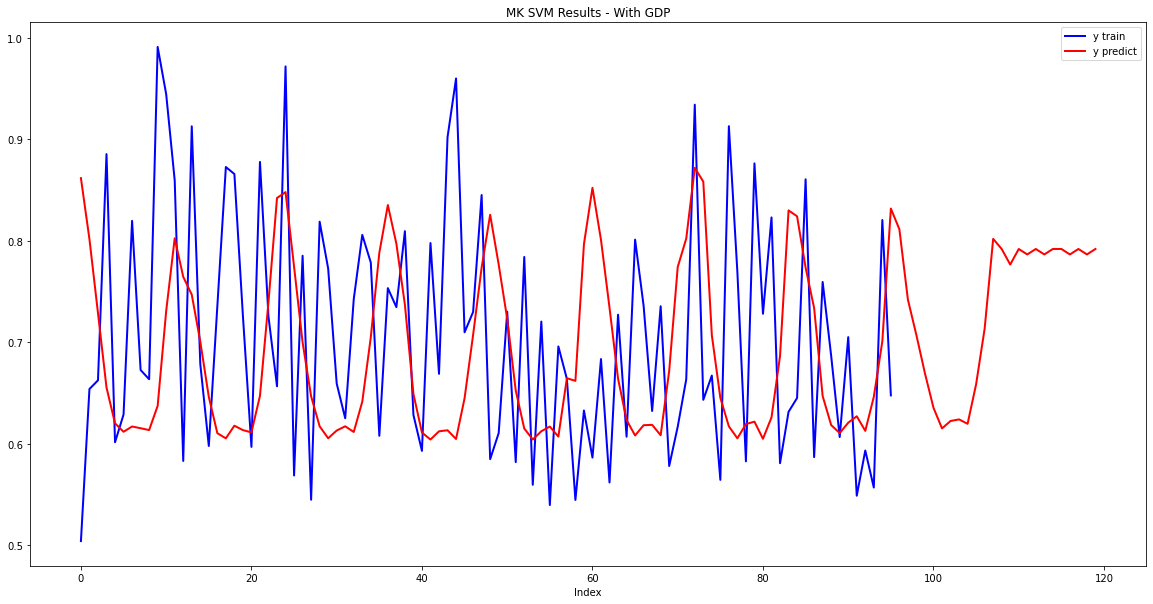

MSE with GDP: 0.005650484796527671


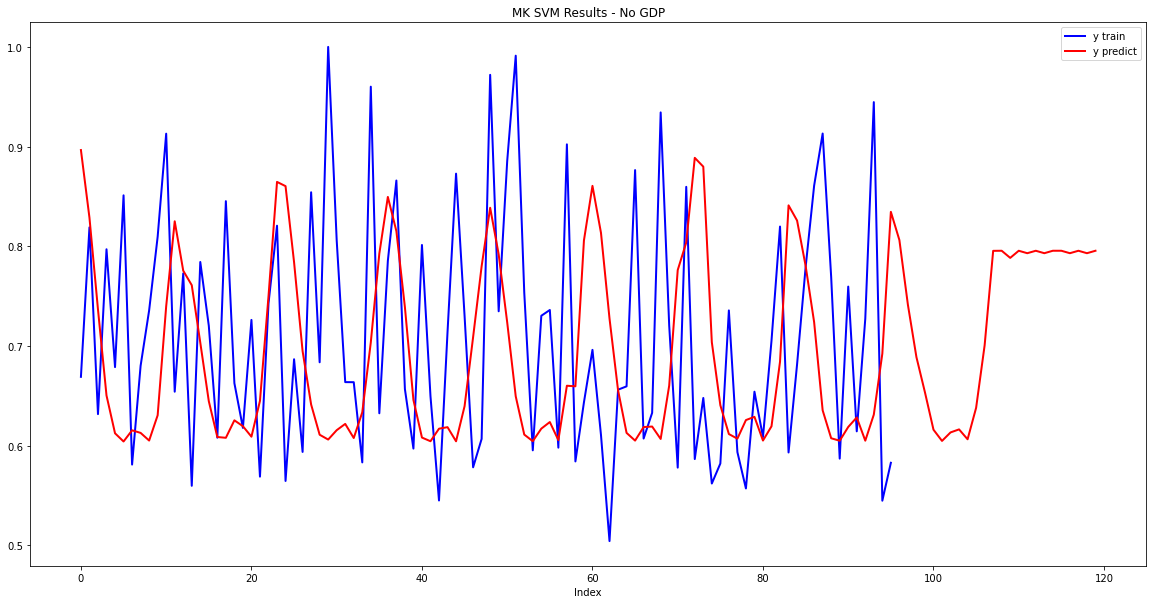

MSE without GDP: 0.0055055181038119365


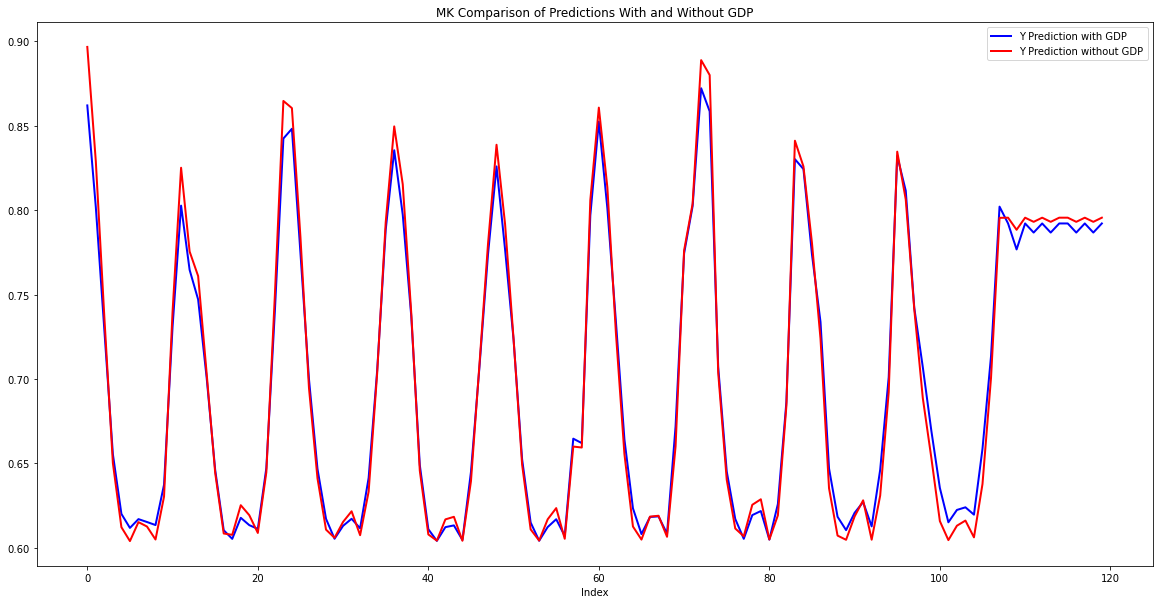

                    NL     NL_GDP        NL_POP   NL_TMP
DateTime                                                
2006-01-31   9724053.0  546066.24  1.223143e+10   1116.0
2006-02-28   8581809.0  493221.12  1.104775e+10   1814.4
2006-03-31   9609189.0  546066.24  1.223143e+10   2752.8
2006-04-30   8824237.0  528451.20  1.183687e+10   5976.0
2006-05-31   8924736.0  546066.24  1.223143e+10  10267.2
...                ...        ...           ...      ...
2015-08-31   9050377.0  569584.08  1.260224e+10   3868.8
2015-09-30   9148868.0  551210.40  1.219572e+10   3744.0
2015-10-31   9674368.0  569584.08  1.260224e+10   3868.8
2015-11-30   9763274.0  551210.40  1.219572e+10   3744.0
2015-12-31  10118348.0  569584.08  1.260224e+10   3868.8

[120 rows x 4 columns]


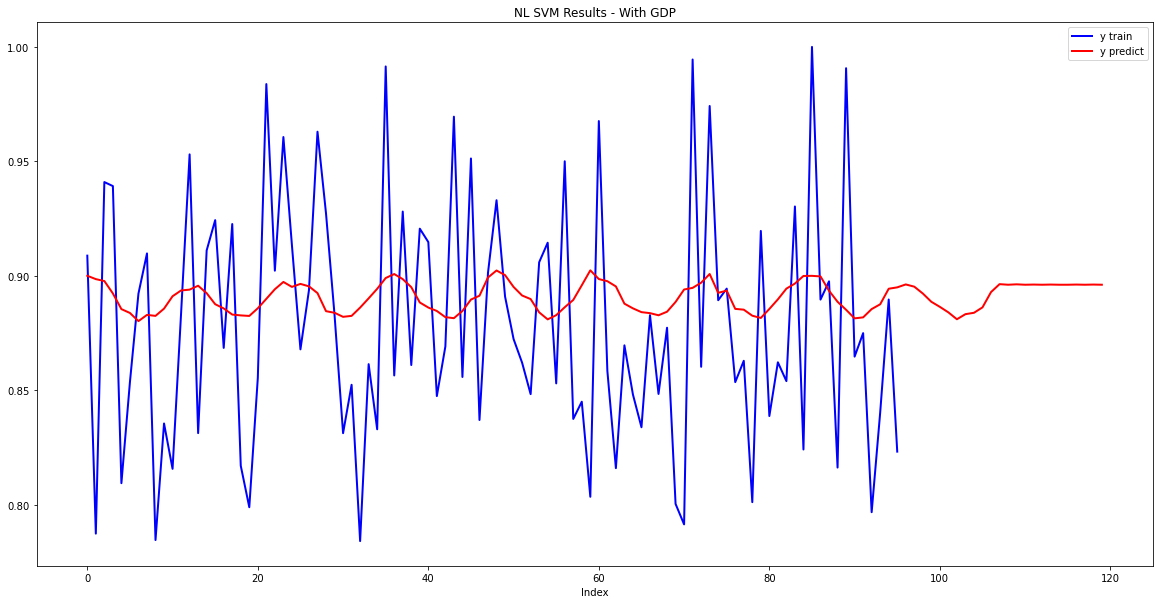

MSE with GDP: 0.0025422113087909914


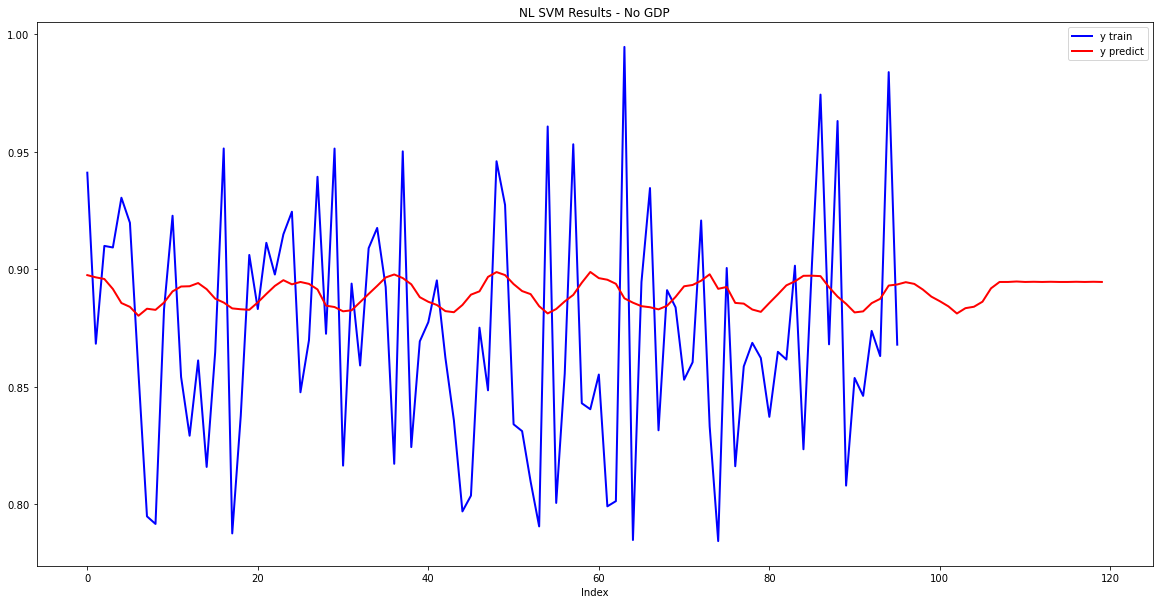

MSE without GDP: 0.0025735557189626914


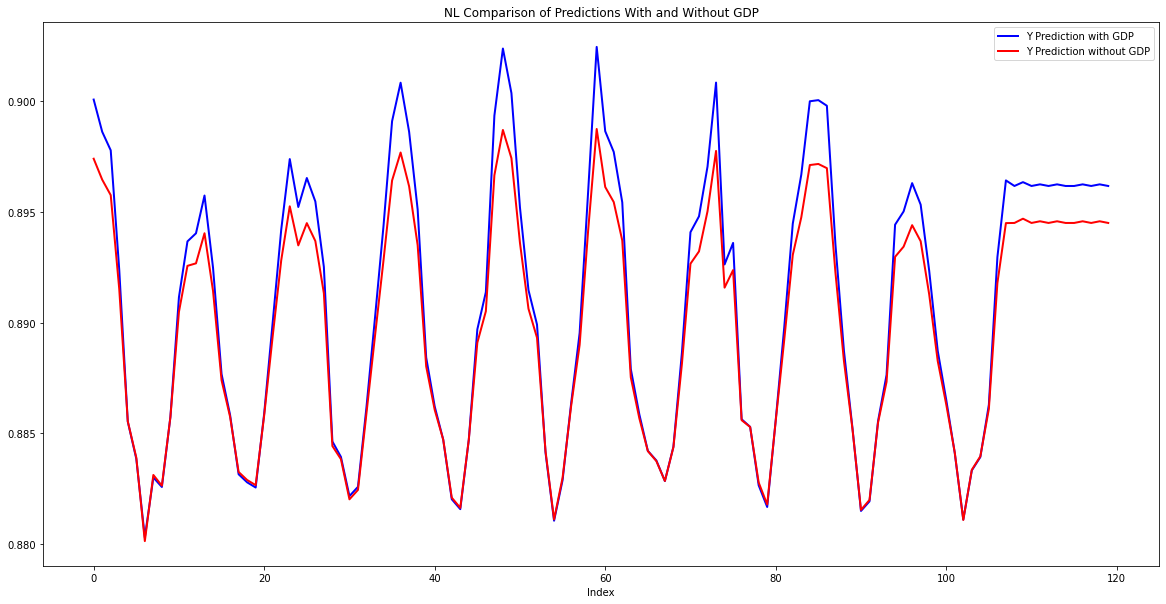

                    NO     NO_GDP        NO_POP  NO_TMP
DateTime                                               
2010-01-31  14931800.0  318997.44  3.635093e+09 -7291.2
2010-02-28  13110014.0  288126.72  3.283310e+09 -6854.4
2010-03-31  12482672.0  318997.44  3.635093e+09 -3645.6
2010-04-30  10190626.0  308707.20  3.517832e+09   792.0
2010-05-31   9300757.0  318997.44  3.635093e+09  4017.6
...                ...        ...           ...     ...
2015-08-31   8596325.0  287035.20  3.868678e+09 -3050.4
2015-09-30   9067136.0  277776.00  3.743882e+09 -2952.0
2015-10-31  10652263.0  287035.20  3.868678e+09 -3050.4
2015-11-30  11767971.0  277776.00  3.743882e+09 -2952.0
2015-12-31  12920515.0  287035.20  3.868678e+09 -3050.4

[72 rows x 4 columns]


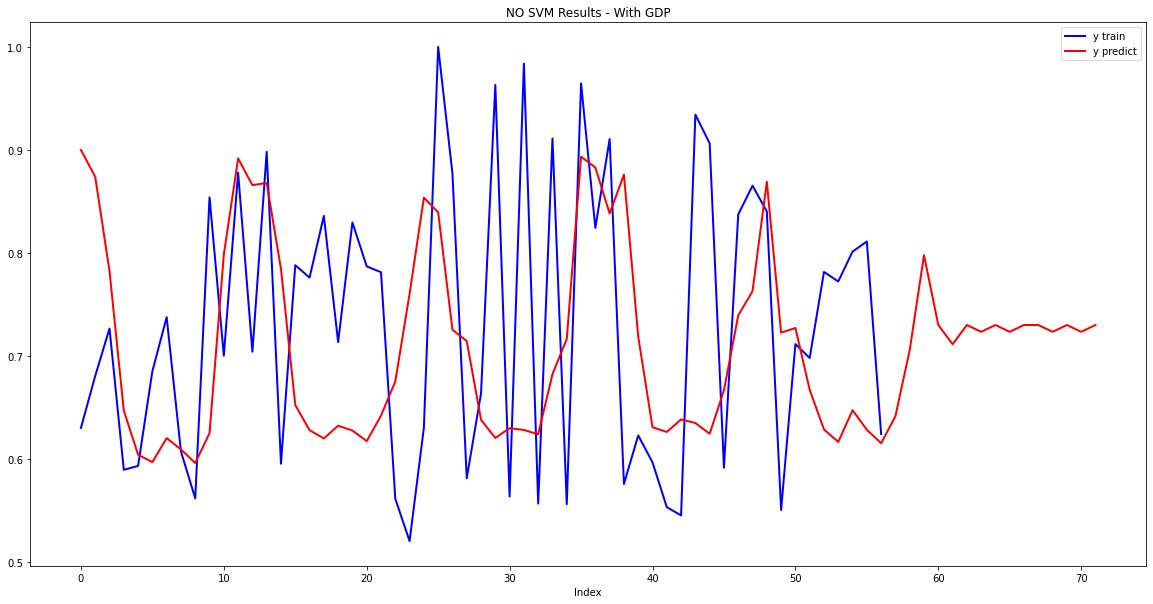

MSE with GDP: 0.005344515124628179


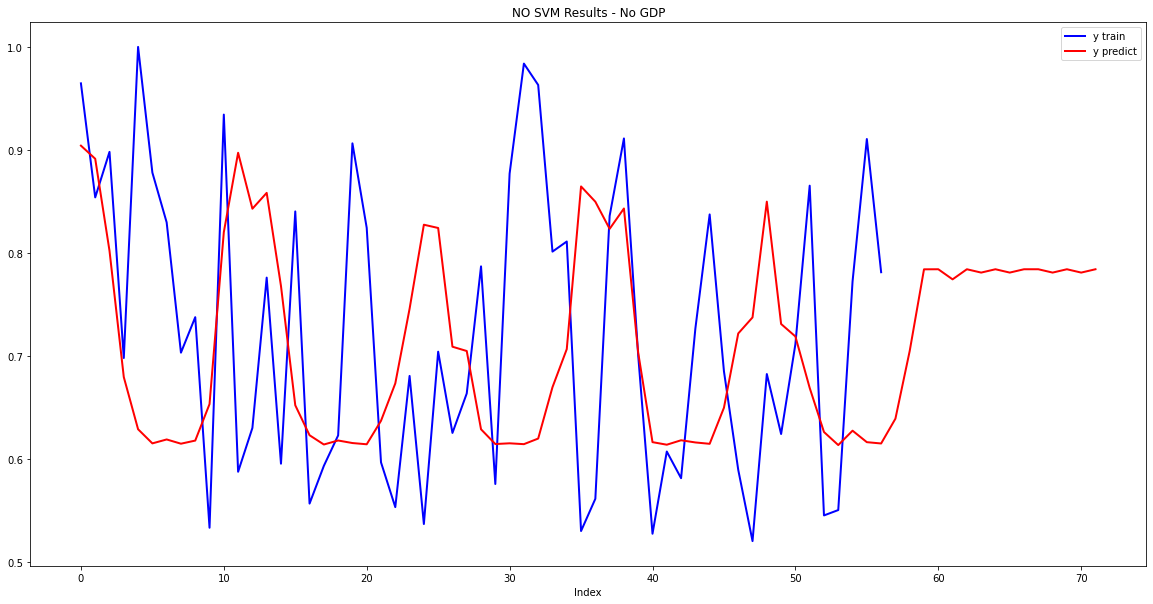

MSE without GDP: 0.006136455686948157


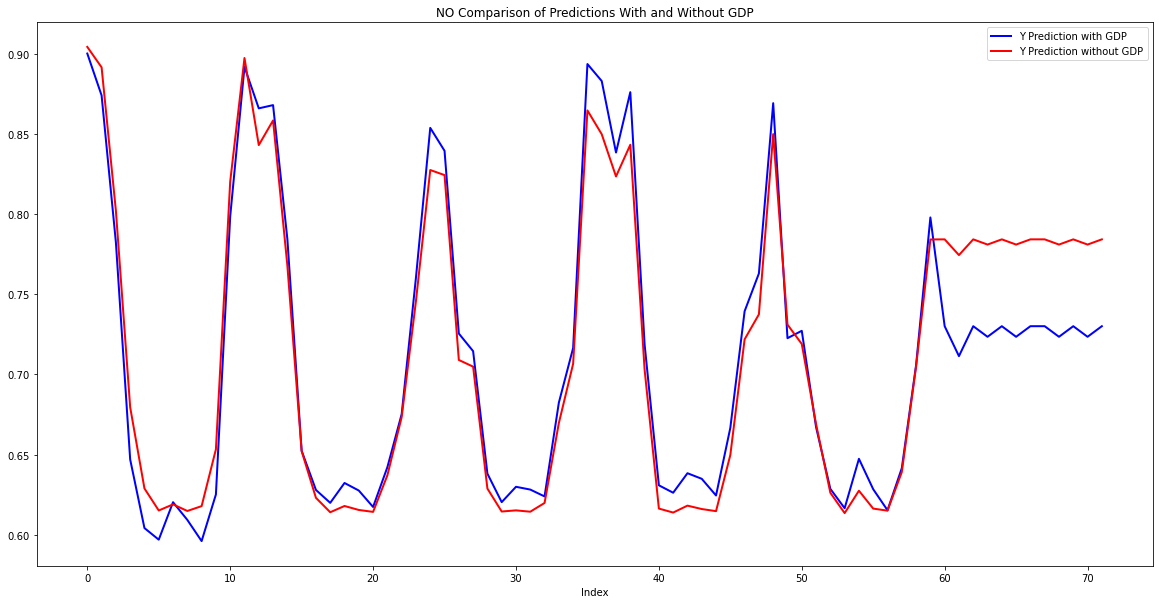

                    PL     PL_GDP        PL_POP  PL_TMP
DateTime                                               
2006-01-31  13450387.0  256397.28  2.853571e+10 -5208.0
2006-02-28  11693666.0  231584.64  2.577419e+10 -1814.4
2006-03-31  12547324.0  256397.28  2.853571e+10    74.4
2006-04-30  10768274.0  248126.40  2.761520e+10  6048.0
2006-05-31  10413225.0  256397.28  2.853571e+10  9820.8
...                ...        ...           ...     ...
2015-08-31  12126770.0  355490.64  2.829735e+10   892.8
2015-09-30  12056951.0  344023.20  2.738454e+10   864.0
2015-10-31  13089395.0  355490.64  2.829735e+10   892.8
2015-11-30  12869603.0  344023.20  2.738454e+10   864.0
2015-12-31  13120504.0  355490.64  2.829735e+10   892.8

[120 rows x 4 columns]


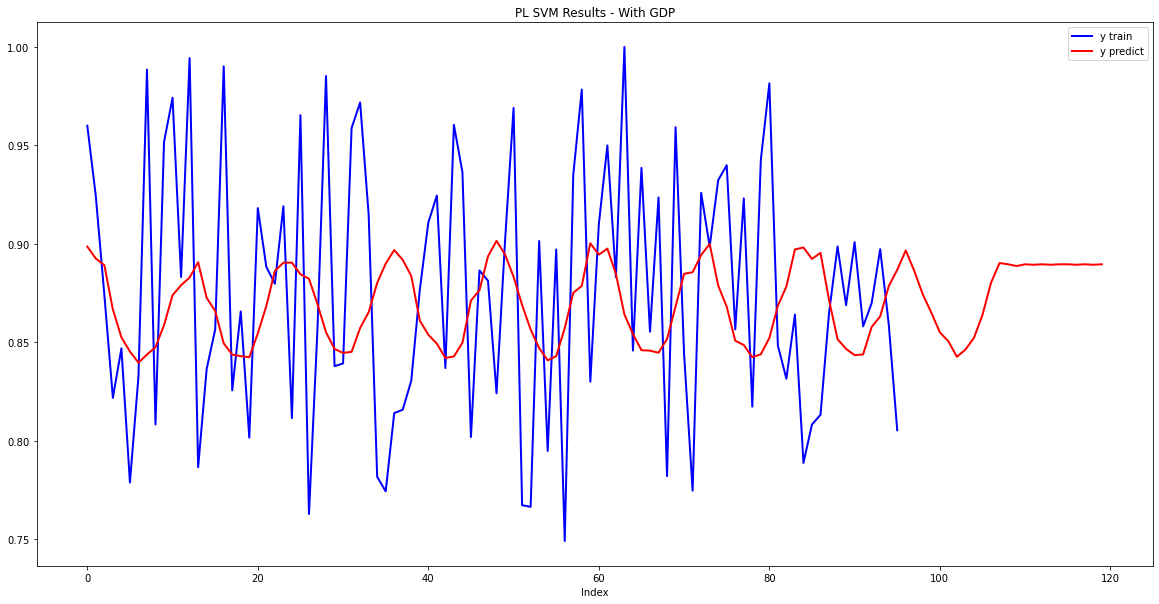

MSE with GDP: 0.002538515078427404


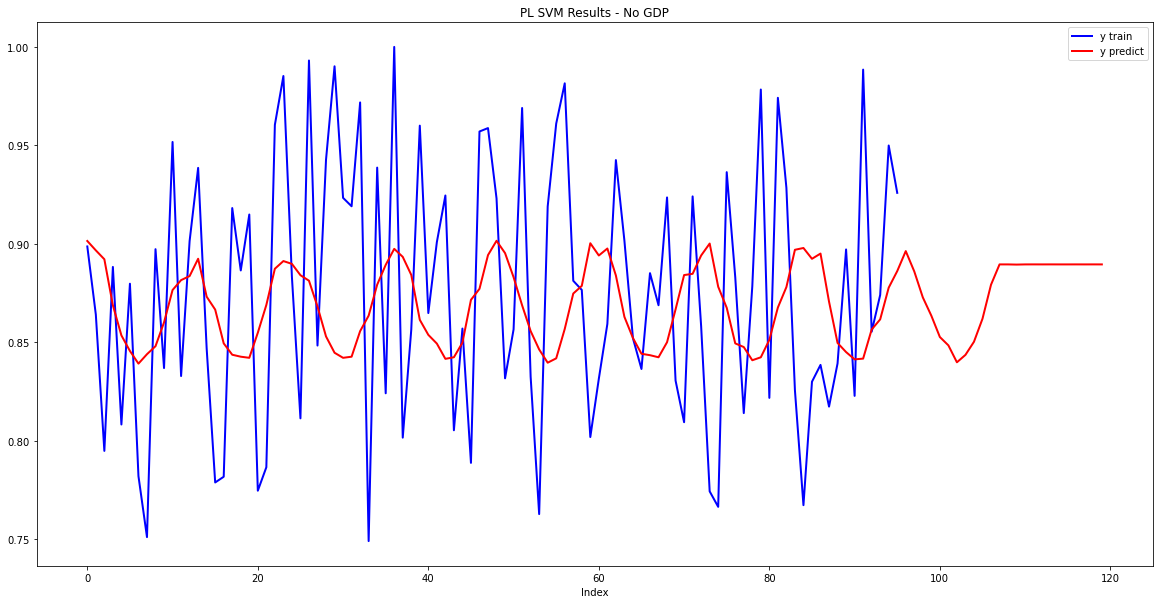

MSE without GDP: 0.0025447200795440284


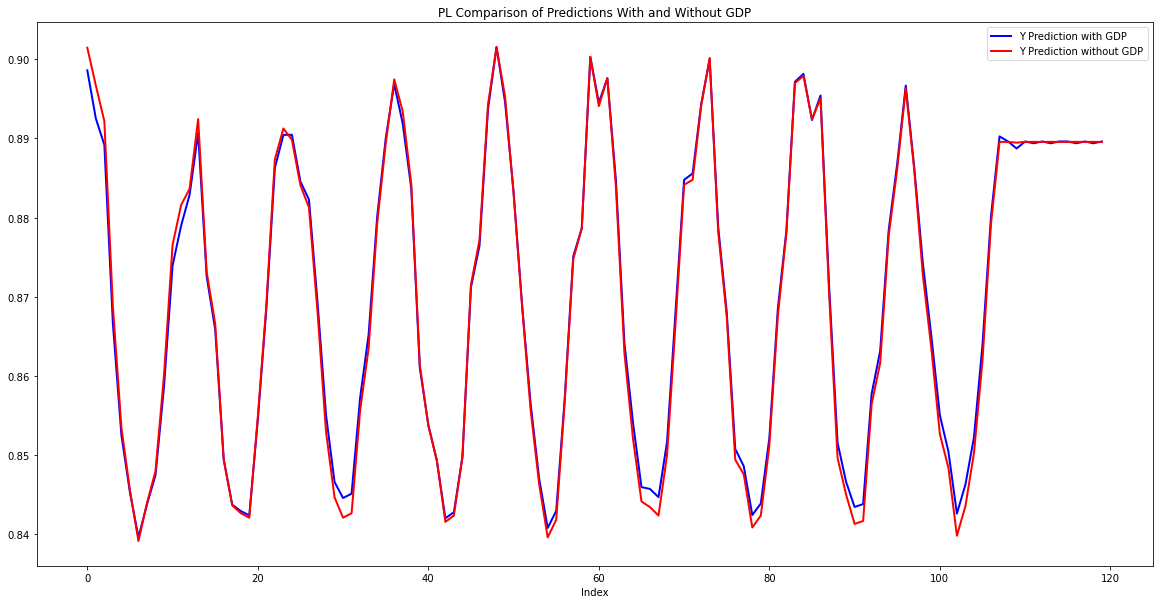

                   PT     PT_GDP        PT_POP   PT_TMP
DateTime                                               
2006-01-31  4713287.0  155317.44  7.843866e+09   6026.4
2006-02-28  4151698.0  140286.72  7.084782e+09   5980.8
2006-03-31  4323426.0  155317.44  7.843866e+09   9225.6
2006-04-30  3630503.0  150307.20  7.590838e+09  10728.0
2006-05-31  3897741.0  155317.44  7.843866e+09  13615.2
...               ...        ...           ...      ...
2015-08-31  3904286.0  148346.16  7.714053e+09   7142.4
2015-09-30  3881605.0  143560.80  7.465213e+09   6912.0
2015-10-31  3976556.0  148346.16  7.714053e+09   7142.4
2015-11-30  3974737.0  143560.80  7.465213e+09   6912.0
2015-12-31  4186923.0  148346.16  7.714053e+09   7142.4

[120 rows x 4 columns]


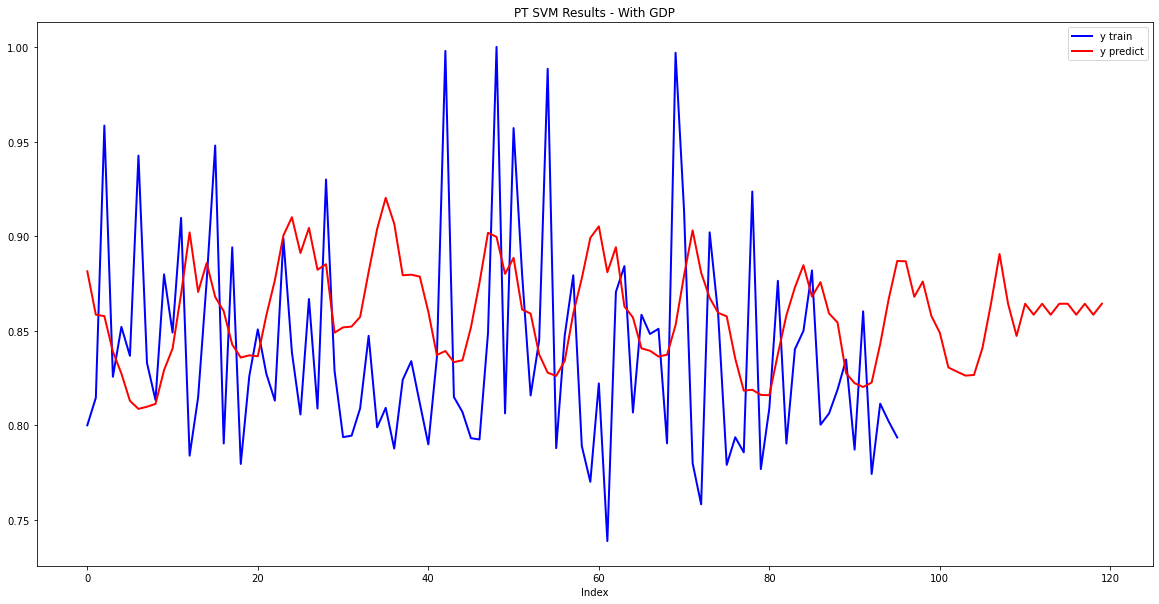

MSE with GDP: 0.0021603636946432906


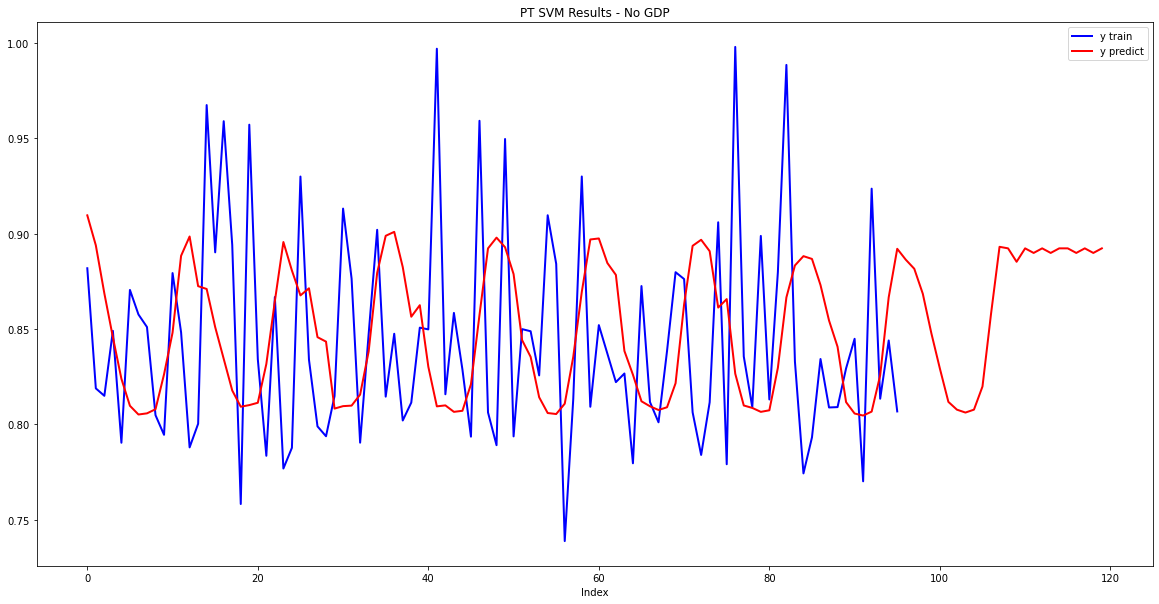

MSE without GDP: 0.0021533361299124207


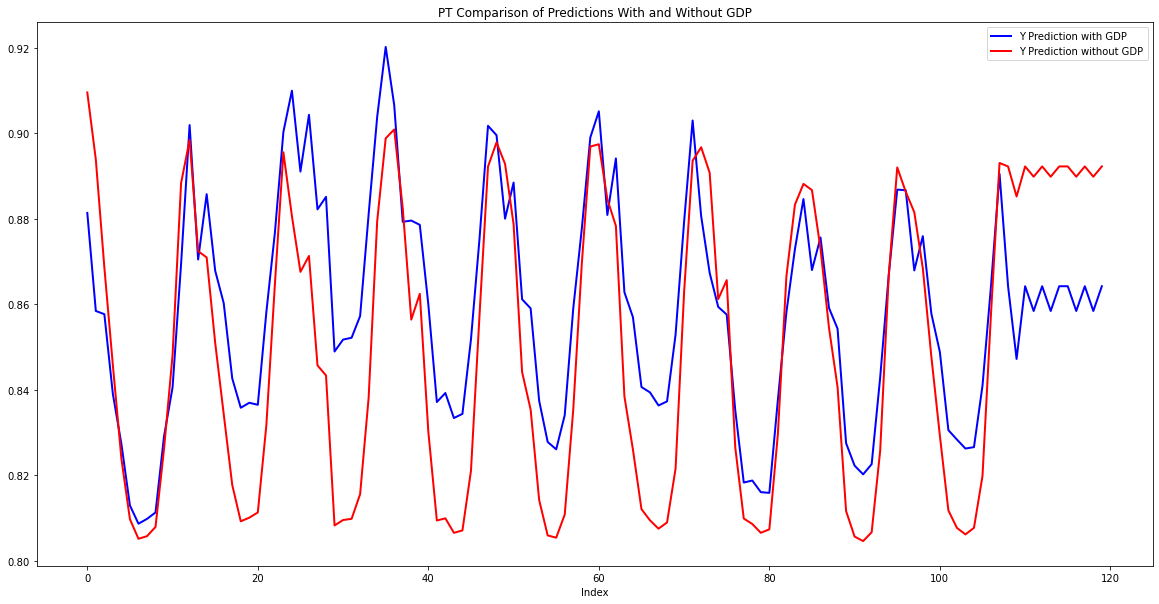

                   RO     RO_GDP        RO_POP   RO_TMP
DateTime                                               
2006-01-31  4839450.0   90782.88  1.579832e+10  -3794.4
2006-02-28  4399889.0   81997.44  1.426945e+10  -1478.4
2006-03-31  4697829.0   90782.88  1.579832e+10   2157.6
2006-04-30  4075707.0   87854.40  1.528870e+10   7488.0
2006-05-31  4127765.0   90782.88  1.579832e+10  10639.2
...               ...        ...           ...      ...
2015-08-31  4179537.0  132231.12  1.482433e+10    744.0
2015-09-30  4107974.0  127965.60  1.434613e+10    720.0
2015-10-31  4387697.0  132231.12  1.482433e+10    744.0
2015-11-30  4294921.0  127965.60  1.434613e+10    720.0
2015-12-31  4665728.0  132231.12  1.482433e+10    744.0

[120 rows x 4 columns]


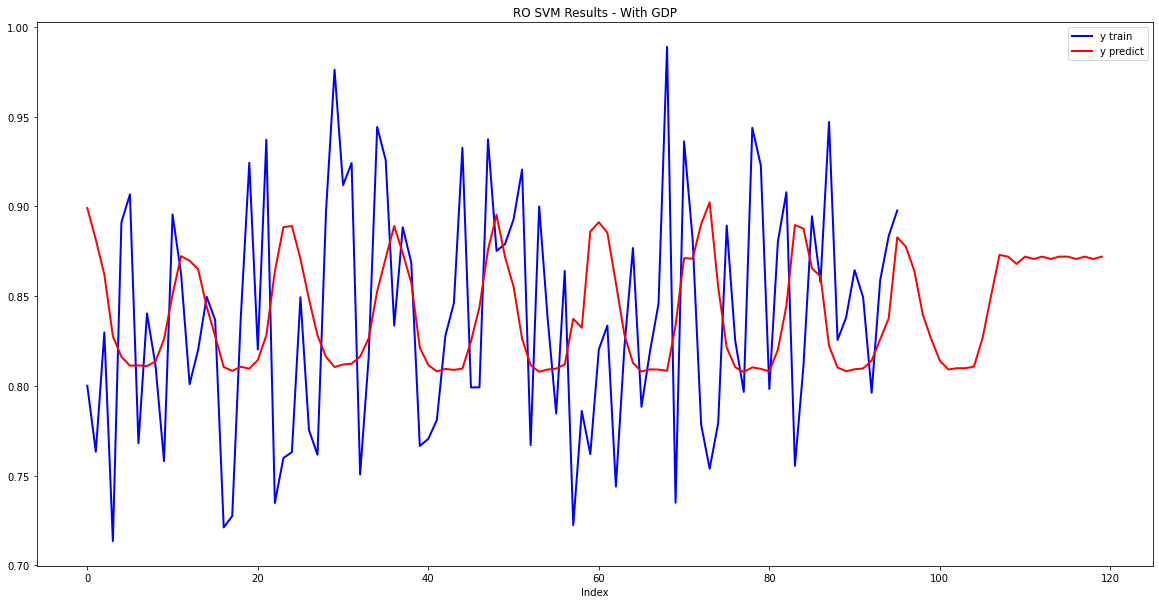

MSE with GDP: 0.0022474797468793974


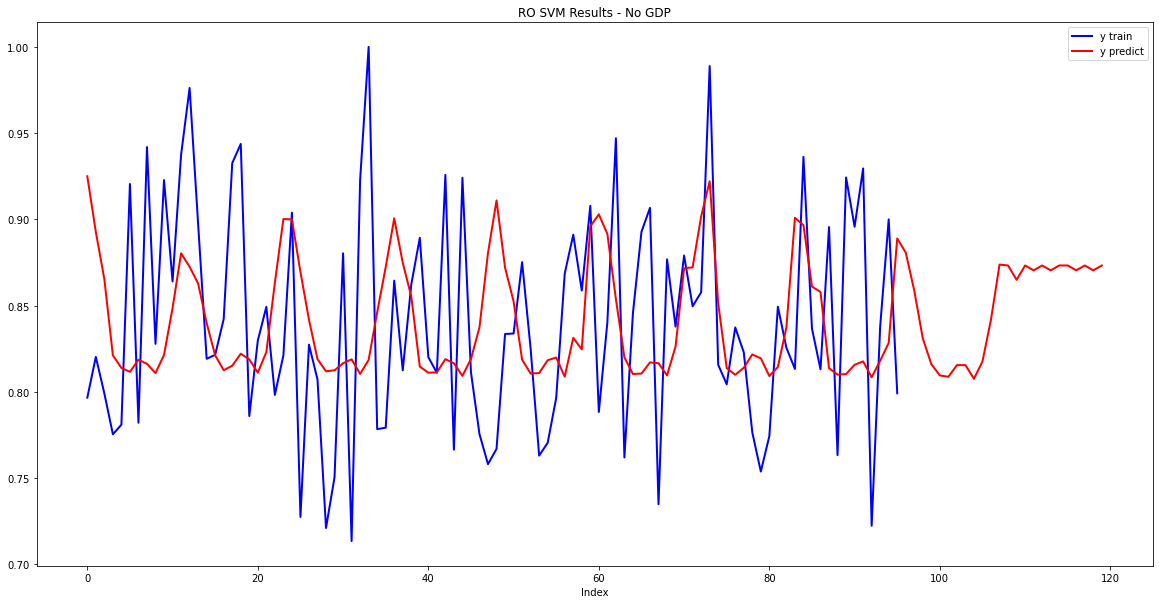

MSE without GDP: 0.002142199394047034


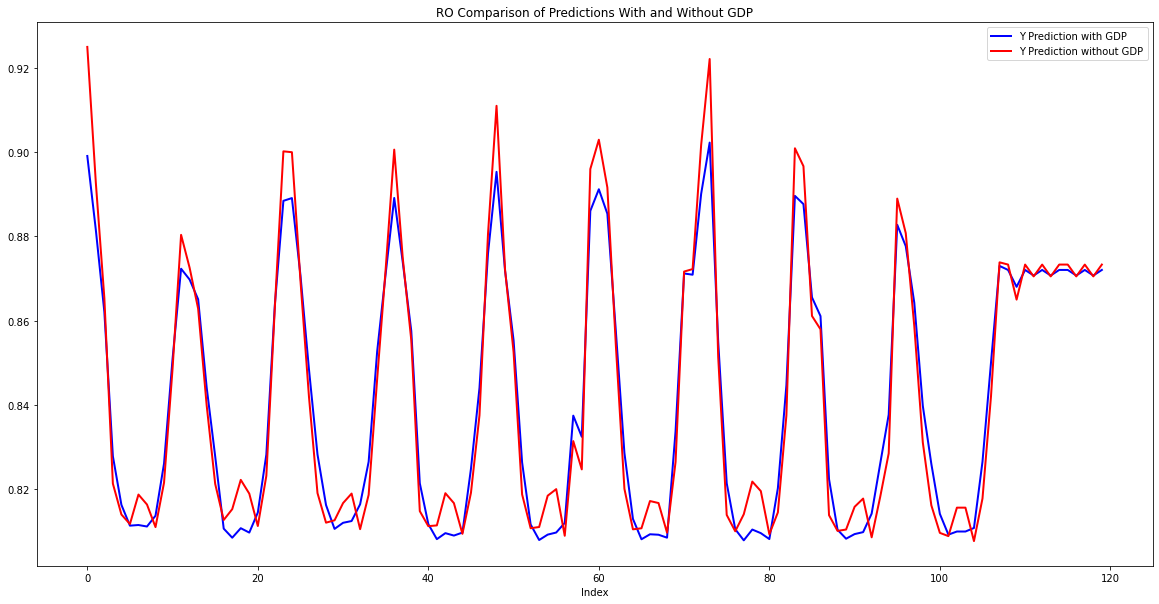

                    SE     SE_GDP        SE_POP  SE_TMP
DateTime                                               
2010-01-31  16167306.0  368882.64  6.986285e+09 -9076.8
2010-02-28  14169867.0  333184.32  6.310193e+09 -7929.6
2010-03-31  13899585.0  368882.64  6.986285e+09 -3571.2
2010-04-30  11117280.0  356983.20  6.760921e+09  1512.0
2010-05-31  10615457.0  368882.64  6.986285e+09  5208.0
...                ...        ...           ...     ...
2015-08-31   9555952.0  375794.40  7.265123e+09 -3720.0
2015-09-30   9888048.0  363672.00  7.030764e+09 -3600.0
2015-10-31  11577779.0  375794.40  7.265123e+09 -3720.0
2015-11-30  12241736.0  363672.00  7.030764e+09 -3600.0
2015-12-31  13132197.0  375794.40  7.265123e+09 -3720.0

[72 rows x 4 columns]


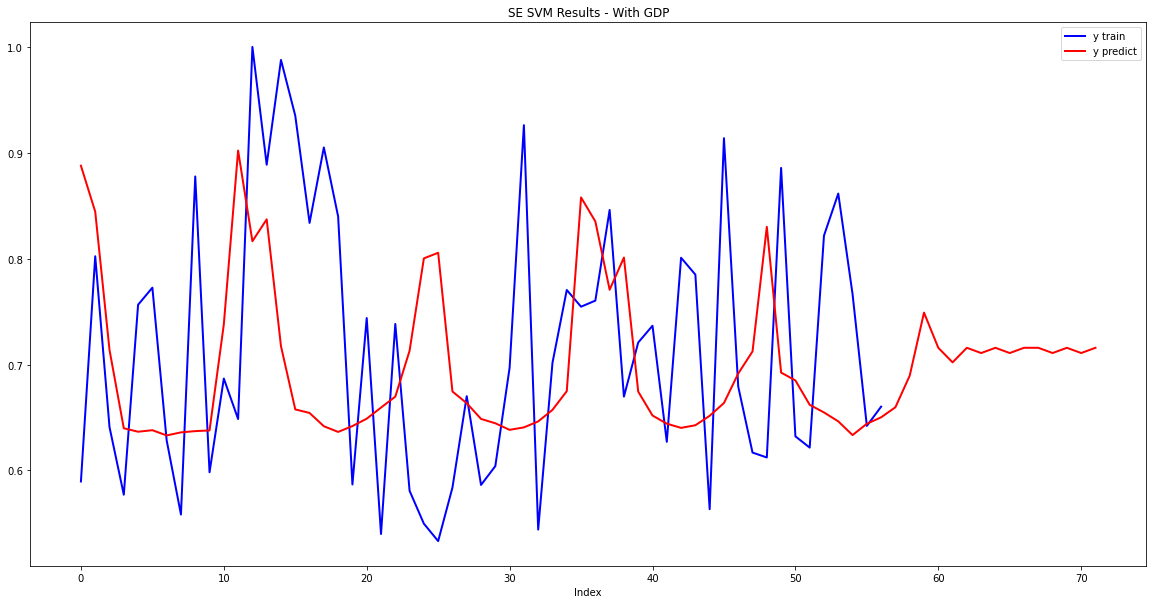

MSE with GDP: 0.005737749468770701


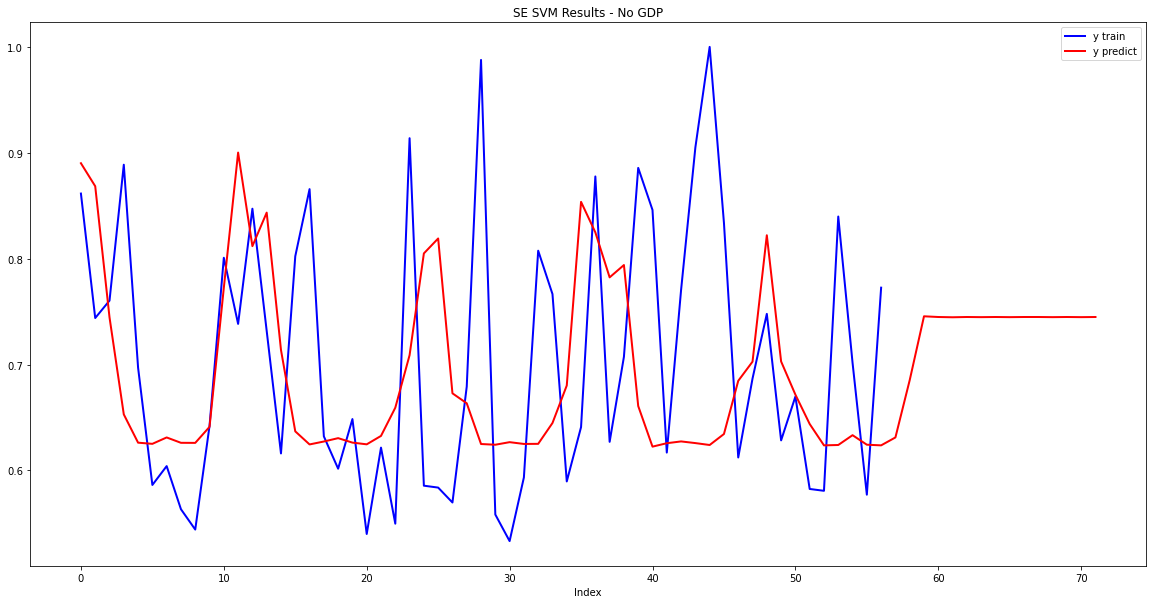

MSE without GDP: 0.005812836605084112


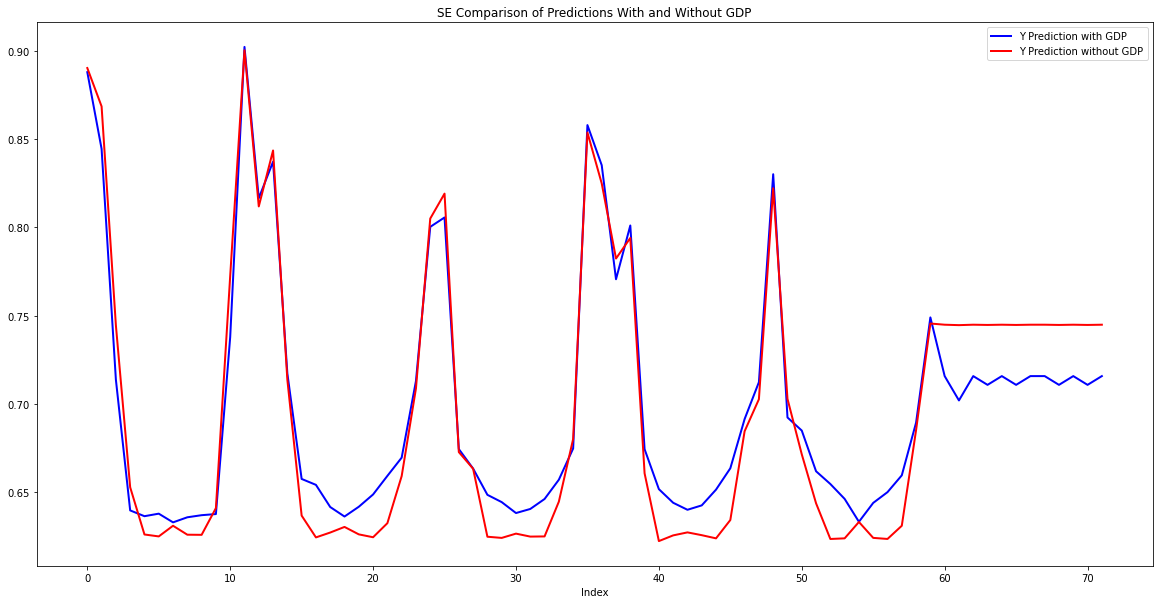

                   SI    SI_GDP        SI_POP   SI_TMP
DateTime                                              
2007-01-31  1181424.0  35764.08  1.497016e+09   3050.4
2007-02-28  1064086.0  32303.04  1.352143e+09   3427.2
2007-03-31  1164480.0  35764.08  1.497016e+09   5208.0
2007-04-30  1041407.0  34610.40  1.448725e+09   9144.0
2007-05-31  1111413.0  35764.08  1.497016e+09  11829.6
...               ...       ...           ...      ...
2015-08-31  1072682.0  32073.84  1.540972e+09   1785.6
2015-09-30  1099433.0  31039.20  1.491263e+09   1728.0
2015-10-31  1171860.0  32073.84  1.540972e+09   1785.6
2015-11-30  1165199.0  31039.20  1.491263e+09   1728.0
2015-12-31  1198934.0  32073.84  1.540972e+09   1785.6

[108 rows x 4 columns]


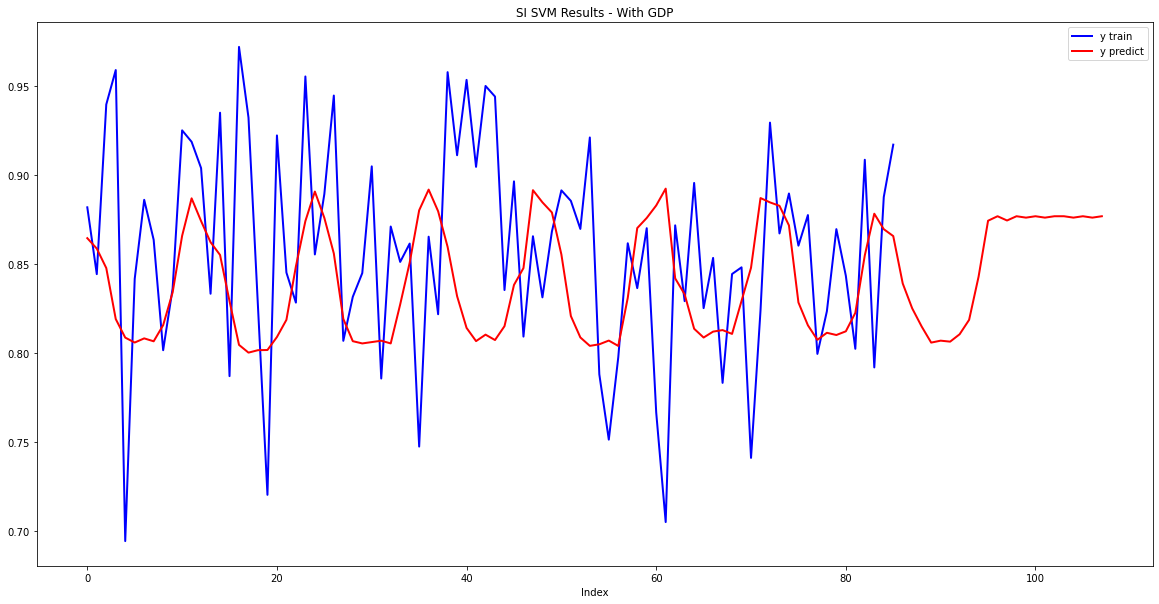

MSE with GDP: 0.003112188573276369


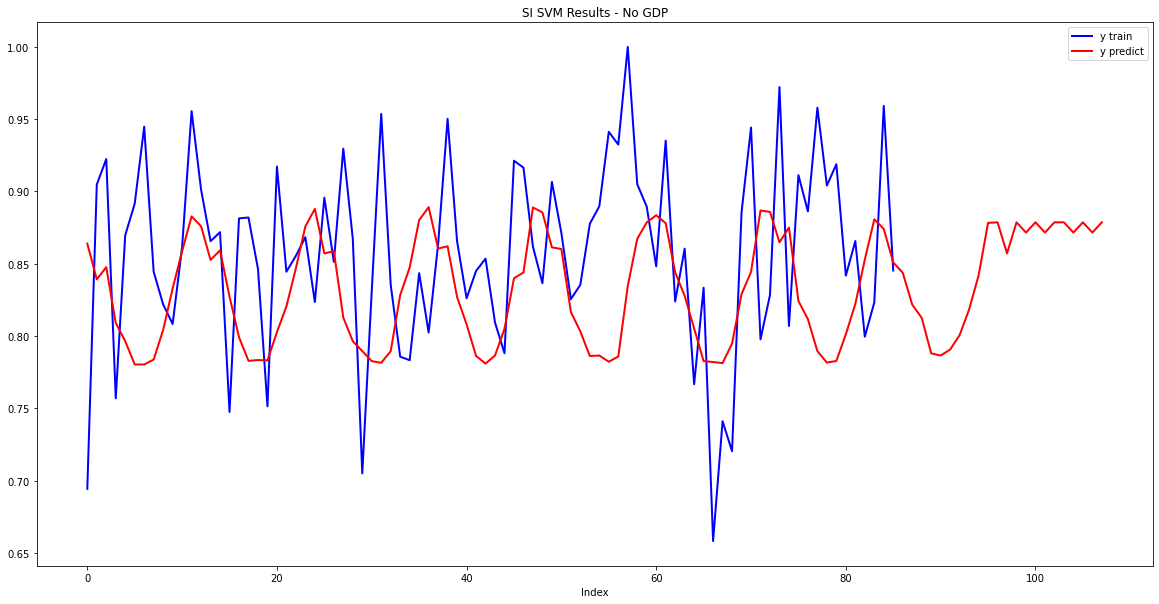

MSE without GDP: 0.003397814054351738


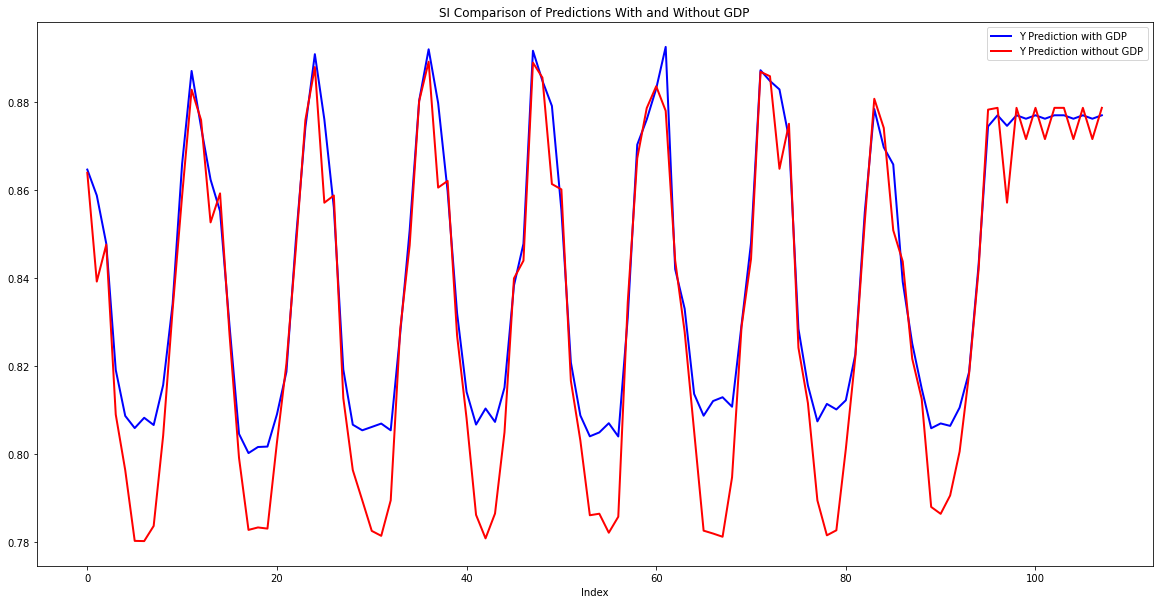

                   SK   SK_GDP        SK_POP  SK_TMP
DateTime                                            
2009-01-31  2589904.0  66513.6  4.018458e+09 -3496.8
2009-02-28  2373183.0  60076.8  3.629575e+09 -1209.6
2009-03-31  2431245.0  66513.6  4.018458e+09  1488.0
2009-04-30  1999628.0  64368.0  3.888830e+09  7776.0
2009-05-31  2022802.0  66513.6  4.018458e+09  9523.2
...               ...      ...           ...     ...
2015-08-31  2232826.0  65844.0  4.044095e+09   148.8
2015-09-30  2211376.0  63720.0  3.913640e+09   144.0
2015-10-31  2438491.0  65844.0  4.044095e+09   148.8
2015-11-30  2447934.0  63720.0  3.913640e+09   144.0
2015-12-31  2493678.0  65844.0  4.044095e+09   148.8

[84 rows x 4 columns]


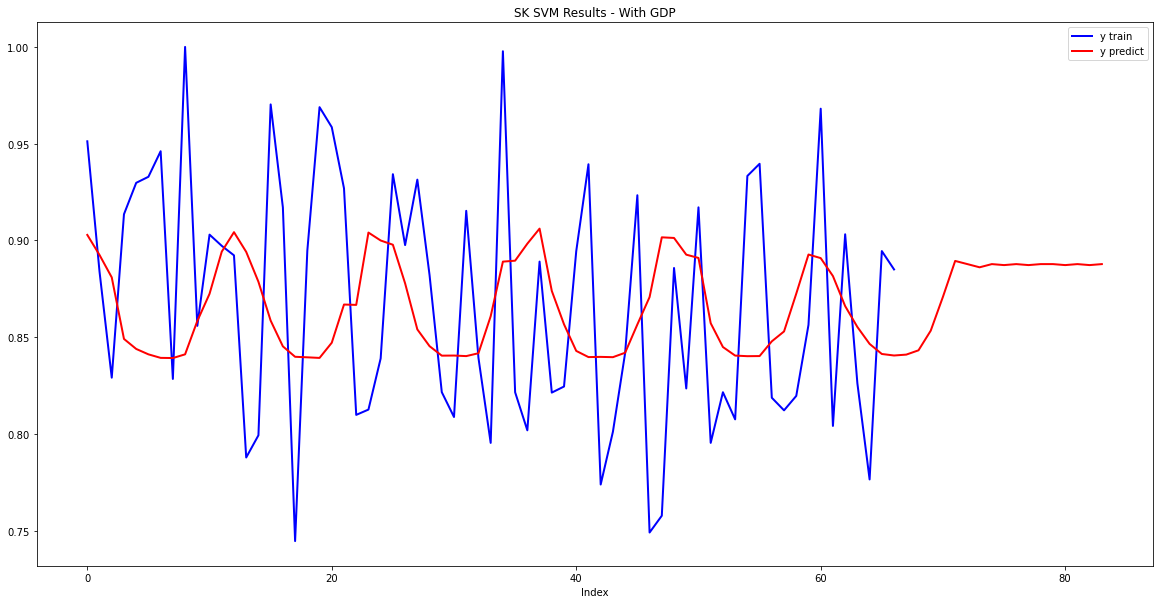

MSE with GDP: 0.002089560036275704


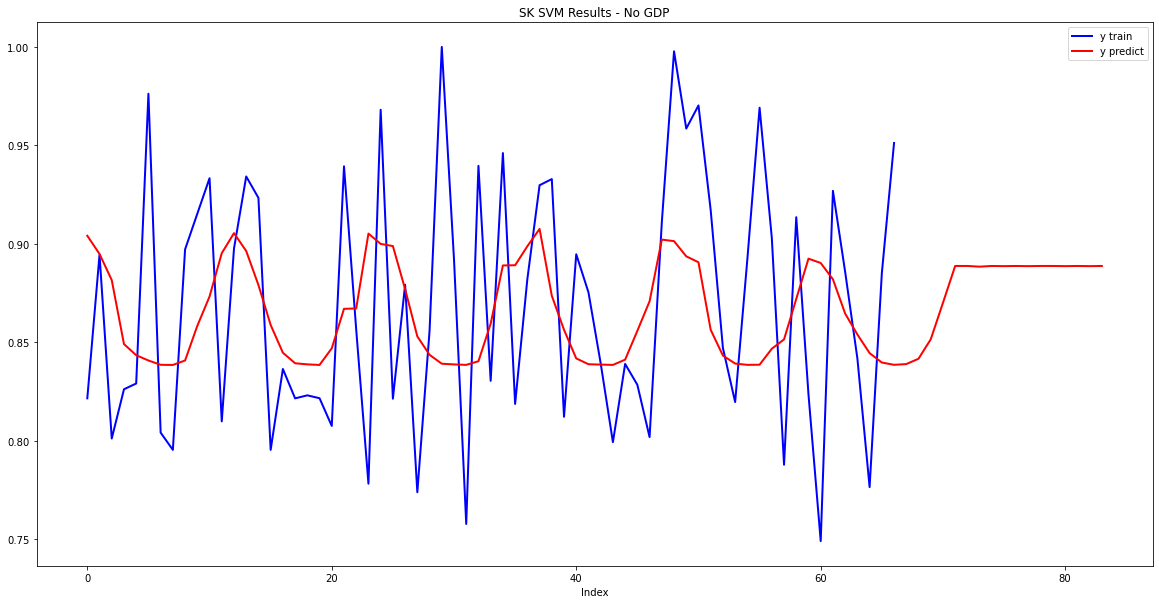

MSE without GDP: 0.002063053120946224


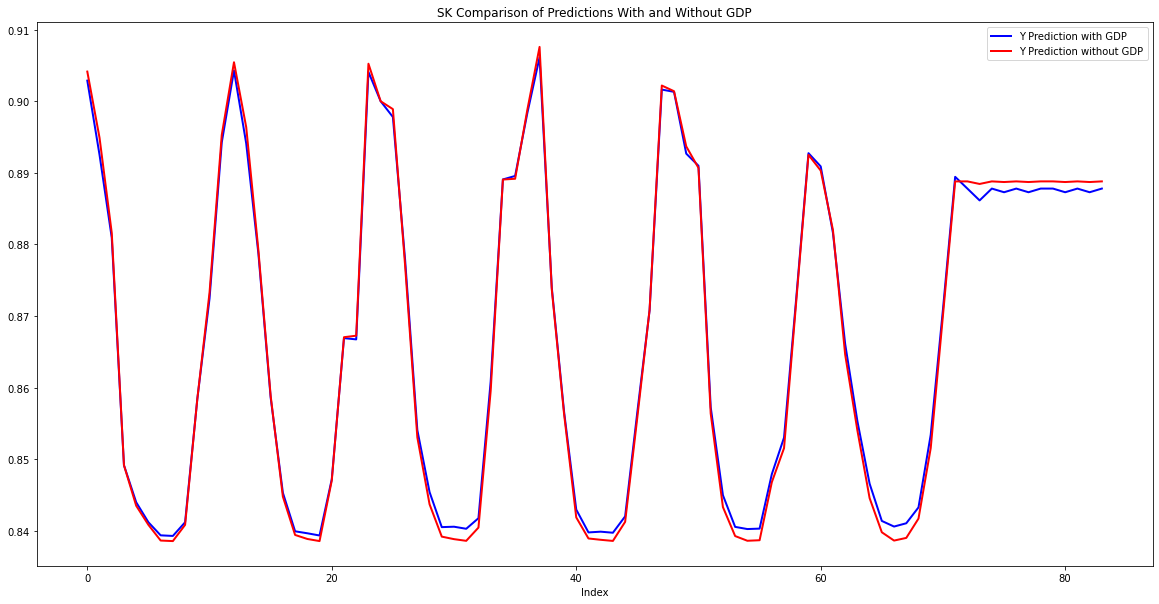

[['AT', 0.004349173739393363, 0.004769945633096491], ['BA', 0.0029098838543171247, 0.002471577055193317], ['BE', 0.002810734799949738, 0.0028681388529249842], ['BG', 0.0026734162324283483, 0.0031415728067075922], ['CH', 0.004359877706877209, 0.0032755109644405614], ['CY', 0.06564874500233658, 0.14804564680915078], ['CZ', 0.0028977200128499016, 0.003087492048184453], ['DE', 0.0018557933839970055, 0.001956304152475531], ['DK', 0.004211136200748499, 0.004213708089385206], ['EE', 0.004818225400838313, 0.004539349992588275], ['ES', 0.0021338865948022775, 0.0023017142623067304], ['FI', 0.0045339101638760555, 0.0051507334987594775], ['FR', 0.0037309994347758846, 0.004399053065883107], ['GB', 0.01349250921658895, 0.013567113656349243], ['GR', 0.0027070617310159953, 0.003636203440882994], ['HR', 0.0028325937647342577, 0.002223497450004147], ['HU', 0.002774871055214434, 0.002787324453090891], ['IE', 0.0032057162411814667, 0.0031954573078014684], ['IS', 0.15174373464983415, 0.1517755910355123], [

In [6]:
mses = [] 
for each in country_datasets:
    
    name = each[0]
    dataset = each[1]
    
    nonan = dataset.dropna()
    #nonan = nonan.groupby(pd.Grouper(level='DateTime', axis=0, freq='24H')).sum()


    nonan = nonan.groupby(pd.Grouper(level='DateTime', axis=0, freq='M')).sum()

    print(nonan)

    # normalize
    nonan = nonan / nonan.max(axis=0) # works

    x_train, x_test, y_train, y_test = train_test_split(nonan.iloc[:, 1:].values, nonan[name].values,test_size=0.2)

    svr = SVR(kernel="rbf", gamma=1, C=1.0, epsilon=0.1).fit(x_train, y_train) # SVR(kernel="poly", degree=25, C=1.0, epsilon=0.1).fit(x_train, y_train)

    #svr = SVR(kernel="rbf", gamma=1).fit(x_train, y_train)

    #############################
    y_train_predict = svr.predict(nonan.iloc[:, 1:].values)
    
    y1_pred = y_train_predict

    plt.plot( y_train, lw=2, color="blue", label="y train")
    plt.plot( y_train_predict, lw=2, color="red", label="y predict")
    plt.legend()
    plt.title(name + " SVM Results - With GDP")
    plt.xlabel("Index")
    plt.rcParams["figure.figsize"] = (20,10)
    plt.show()
    
    gdp_mse = mean_squared_error(nonan[name].values, y_train_predict)
    print("MSE with GDP:", gdp_mse)

    
    
    
    data_no_gdp = nonan.drop([name + '_GDP'], axis=1, inplace=False)
    x_train, x_test, y_train, y_test = train_test_split(data_no_gdp.iloc[:, 1:].values, data_no_gdp[name].values,test_size=0.2)

    svr = SVR(kernel="rbf", gamma=1, C=1.0, epsilon=0.1).fit(x_train, y_train) # SVR(kernel="poly", degree=25, C=1.0, epsilon=0.1).fit(x_train, y_train)

    y_train_predict = svr.predict(data_no_gdp.iloc[:, 1:].values)

    plt.plot( y_train, lw=2, color="blue", label="y train")
    plt.plot( y_train_predict, lw=2, color="red", label="y predict")
    plt.legend()
    plt.title(name + " SVM Results - No GDP")
    plt.xlabel("Index")
    plt.rcParams["figure.figsize"] = (20,10)
    plt.show()
    
    no_gdp_mse = mean_squared_error(data_no_gdp[name].values, y_train_predict)
    print("MSE without GDP:", mean_squared_error(data_no_gdp[name].values, y_train_predict))
    
    mses.append([name, gdp_mse, no_gdp_mse])
    
    
    plt.plot( y1_pred, lw=2, color="blue", label="Y Prediction with GDP")
    plt.plot( y_train_predict, lw=2, color="red", label="Y Prediction without GDP")
    plt.legend()
    plt.title(name + " Comparison of Predictions With and Without GDP")
    plt.xlabel("Index")
    plt.rcParams["figure.figsize"] = (20,10)
    plt.show()

print(mses)

### Synthesize / Interpret Results

In [7]:
from scipy.stats import ttest_ind

df = pd.DataFrame({'Country': [],
                   'w_GDP': [],
                   'wo_GDP': []})

for each in mses:
    name = each[0]
    w_GDP = each[1]
    wo_GDP = each[2]
    df.loc[len(df.index)] = [name, w_GDP, wo_GDP]
    
    
ttest_ind(df['w_GDP'], df['wo_GDP'])

Ttest_indResult(statistic=-0.32872437047918274, pvalue=0.7434717989351738)

### Get parameters

In [ ]:
for each in country_datasets:
    
    name = each[0]
    dataset = each[1]
    
    nonan = dataset.dropna()
    #nonan = nonan.groupby(pd.Grouper(level='DateTime', axis=0, freq='24H')).sum()


    nonan = nonan.groupby(pd.Grouper(level='DateTime', axis=0, freq='M')).sum()


    # normalize
    nonan = nonan / nonan.max(axis=0) # works

    x_train, x_test, y_train, y_test = train_test_split(nonan.iloc[:, 1:].values, nonan[name].values,test_size=0.2)

    
    print(name)
    print("Getting best parameters...")


    svr = SVR()

    # Get best parameters
    best_params = []
    grid = [{'kernel': ['linear']}, {'kernel': ['rbf'], 'gamma': [0.1, 0.9, 1, 1.1, 10, 15], 'C': [0, 0.1, 0.2, 0.3, 0.4, 0.6, 0.8, 1]}, {'kernel': ['poly'], 'degree': [2, 5, 10, 15,20, 25], 'gamma': [1, 10, 15], 'C': [0, 0.1, 0.2, 0.3, 0.4, 0.6, 0.8, 1]}]
    grid_search = GridSearchCV(estimator = svr, param_grid = grid, cv = 3, n_jobs = -1, scoring='explained_variance')

    grid_search.fit(x_train,y_train)



    best_params.append(grid_search.best_params_)
    #print("best parameters are: ", grid_search.best_params_)

    grid_search = GridSearchCV(estimator = svr, param_grid = grid, cv = 3, n_jobs = -1, scoring='neg_mean_squared_error')
    grid_search.fit(x_train,y_train)
    #print("best parameters are: ", grid_search.best_params_)
    best_params.append(grid_search.best_params_)

    grid_search = GridSearchCV(estimator = svr, param_grid = grid, cv = 3, n_jobs = -1, scoring='r2')
    grid_search.fit(x_train,y_train)
    #print("best parameters are: ", grid_search.best_params_)
    best_params.append(grid_search.best_params_)


    counts =  {'poly': 0, 'rbf' : 0 , 'linear' : 0}

    for params in best_params:
        counts[params['kernel']] += 1

    for types in counts:
        if counts[types] >=2:
            kernel_type = types
        else:
            kernel_type = None    


    if kernel_type != None:
        for params in best_params:
            if params['kernel'] == kernel_type:
                best_parameters = params
    else:
        # if there is no consensus, take a first best best parameters
        best_parameters = best_params[0]
    print("Got best parameters")
    print(best_parameters)

AT
Getting best parameters...
